In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pydot
import pickle
import pathlib
import os
from scipy import stats
import random
from sklearn.metrics import r2_score
plt.rcParams['figure.figsize'] = [10, 5]
#import unicode

from scipy.optimize import curve_fit
import re
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import statistics
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.neighbors import NearestNeighbors
from scipy.spatial import distance
import networkx as nx
from operator import itemgetter
from scipy.spatial import distance_matrix
import re

In [287]:
'''
with open('WT_point_cloud_representation.txt', 'r') as f:
    #for count, line in enumerate(f, start=1):
    for count, line in enumerate(f):
        if line[0].isdigit():
            print(count, line[:-1])
            #print(line[:-1])
            #print('[' in line, ']' in line)
        #print(line[0],)
        if count == 5972:
            print(count, line)
f.close()'''

"\nwith open('WT_point_cloud_representation.txt', 'r') as f:\n    #for count, line in enumerate(f, start=1):\n    for count, line in enumerate(f):\n        if line[0].isdigit():\n            print(count, line[:-1])\n            #print(line[:-1])\n            #print('[' in line, ']' in line)\n        #print(line[0],)\n        if count == 5972:\n            print(count, line)\nf.close()"

In [31]:
re.findall(r"'([^']*)'", my_str_2)

In [90]:
WT_dict = dict()

with open('WT_point_cloud_representation.txt', 'r') as f:
    for count, line in enumerate(f):
        try:
            if line[0].isdigit():
                #print(line[:-1])
                tag = tuple(line.split(' ')[0:2])
                #print(tag)
                #print(re.findall(r"'([^']*)'", line))
                WT_dict[tag] = re.findall(r"'([^']*)'", line)
            if line[1] == '\'': 
                WT_dict[tag] = WT_dict[tag] + re.findall(r"'([^']*)'", line)
        except:
            print(count)
            #print(re.findall(r"'([^']*)'", line))
            #try:
                #print(re.findall(r"'([^']*)'", line))
            #except:pass
        #else: print(False)
        #    print(line[:-1])
            #print(line[:-1])
            #print('[' in line, ']' in line)
        #print(line[0],)
        if count > 20000:
            break
f.close()

5972


In [92]:
WT_dict_tally = dict()
for n in list(WT_dict):
    #print(WT_dict[n])
    #print(n)
    sublineage_dict_ref = dict()
    for nn in set(WT_dict[n]):
        #print(nn, WT_dict[n].count(nn))
        sublineage_dict_ref[nn] = WT_dict[n].count(nn)
    WT_dict_tally[n] = sublineage_dict_ref

In [111]:
RNAi_dict = dict()

with open('RNAi_point_cloud_representation.txt', 'r') as f:
    for count, line in enumerate(f):
        try:
            if line[0].isdigit():
                tag = tuple(line.split(' ')[0:3])
                #print(tag)
                RNAi_dict[tag] = re.findall(r"'([^']*)'", line)
                #print()
                #print(line[:-1])
            if line[1] == '\'':
                RNAi_dict[tag] = RNAi_dict[tag] + re.findall(r"'([^']*)'", line) 
                #print(re.findall(r"'([^']*)'", line))
                #print(line[:-1])
            #if '\'' in line:
            #    pass
                #print(count, line[:-1].split(' '))
                #print(count, line[:-1])
            #if line[0].isdigit():
                #print(line[:-1])
                #tag = tuple(line.split(' ')[0:2])
                #print(tag)
                #print(re.findall(r"'([^']*)'", line))
                #WT_dict[tag] = re.findall(r"'([^']*)'", line)
            #if line[1] == '\'': 
                #WT_dict[tag] = WT_dict[tag] + re.findall(r"'([^']*)'", line)
        except:
            print(count)
            #print(re.findall(r"'([^']*)'", line))
            #try:
                #print(re.findall(r"'([^']*)'", line))
            #except:pass
        #else: print(False)
        #    print(line[:-1])
            #print(line[:-1])
            #print('[' in line, ']' in line)
        #print(line[0],)
        if count > 200000:
            break
f.close()

2885
4028
6835
9167
13068
15298
17386


In [113]:
RNAi_dict_tally = dict()
for n in list(RNAi_dict):
    #print(WT_dict[n])
    #print(n)
    sublineage_dict_ref = dict()
    for nn in set(RNAi_dict[n]):
        #print(nn, WT_dict[n].count(nn))
        sublineage_dict_ref[nn] = RNAi_dict[n].count(nn)
    RNAi_dict_tally[n] = sublineage_dict_ref

In [115]:
transformation_assignments = {'APX-1': [('ABp', 'ABa')],
 'ATX-2': [('ABp', 'ABa'),
  ('ABar', 'ABal'),
  ('ABala', 'ABara'),
  ('ABara', 'ABala'),
  ('EMS', 'C')],
 'C49H3.8': [('ABala', 'ABara'), ('P2', 'EMS')],
 'CAMT-1': [('ABar', 'ABal'), ('ABara', 'ABala'), ('ABpra', 'ABpla')],
 'CDC-25.1': [('AB', 'ABp'), ('P1', 'P2')],
 'CDC-37': [('ABala', 'ABara'), ('ABalp', 'ABarp'), ('EMS', 'C'), ('P3', 'C')],
 'CEH-24': [('ABa', 'ABp'),
  ('ABar', 'ABal'),
  ('ABala', 'ABara'),
  ('ABarp', 'ABalp'),
  ('ABpla', 'ABpra')],
 'CHAF-2': [('ABala', 'ABara')],
 'CHK-1': [('ABala', 'ABara')],
 'CLS-2': [('AB', 'ABp')],
 'CPL-1': [('ABar', 'ABal'), ('ABala', 'ABara')],
 'CSN-4': [('ABa', 'ABp')],
 'CUL-1': [('ABar', 'ABal'),
  ('ABala', 'ABara'),
  ('MS', 'EMS'),
  ('C', 'EMS'),
  ('P4', 'P3')],
 'CUL-2': [('ABa', 'ABp')],
 'CUL-3': [('ABar', 'ABal'),
  ('ABala', 'ABarp'),
  ('ABpla', 'ABpra'),
  ('ABplp', 'ABpra'),
  ('ABpra', 'ABpla'),
  ('ABprp', 'ABpra')],
 'DIV-1': [('AB', 'ABp'), ('P1', 'P2')],
 'DLC-1': [('ABala', 'ABara')],
 'DLI-1': [('ABala', 'ABara')],
 'DRH-3': [('ABpla', 'ABplp')],
 'F23F1.5': [('ABa', 'ABp')],
 'F35F11.1': [('ABpla', 'ABpra')],
 'F44B9.8': [('EMS', 'C')],
 'GEI-17': [('C', 'MS')],
 'GLD-2': [('ABar', 'ABal'),
  ('ABala', 'ABara'),
  ('ABpra', 'ABpla'),
  ('E', 'MS'),
  ('P4', 'D')],
 'GLP-1': [('ABp', 'ABa'),
  ('ABalp', 'ABarp'),
  ('ABara', 'ABala'),
  ('ABpla', 'ABpra')],
 'GPB-1': [('ABarp', 'ABalp'), ('ABarp', 'ABara')],
 'GSK-3': [('ABar', 'ABal'),
  ('ABala', 'ABara'),
  ('ABpla', 'ABpra'),
  ('E', 'MS'),
  ('C', 'EMS')],
 'HDA-1': [('ABala', 'ABara')],
 'HMP-2': [('ABar', 'ABal')],
 'LAG-1': [('ABp', 'ABa'),
  ('ABalp', 'ABarp'),
  ('ABara', 'ABala'),
  ('ABpla', 'ABpra')],
 'LET-502': [('ABar', 'ABal'), ('ABala', 'ABara'), ('ABpra', 'ABpla')],
 'LIN-23': [('ABar', 'ABal'),
  ('ABpra', 'ABpla'),
  ('MS', 'EMS'),
  ('C', 'EMS'),
  ('P4', 'P3')],
 'MBK-2': [('AB', 'EMS'), ('EMS', 'C')],
 'MEI-1': [('ABar', 'ABal'), ('ABpra', 'ABpla')],
 'MEX-3': [('D', 'P4')],
 'MEX-5': [('AB', 'EMS')],
 'MOM-2': [('ABar', 'ABal'), ('ABpra', 'ABpla'), ('E', 'MS')],
 'MOM-5': [('ABar', 'ABal'), ('ABpra', 'ABpla')],
 'NMY-2': [('ABpla', 'ABpra')],
 'NPP-4': [('ABa', 'ABp'), ('ABpla', 'ABpra')],
 'NUD-1': [('ABala', 'ABara')],
 'OMA-1/2': [('ABar', 'ABal'),
  ('ABalp', 'ABarp'),
  ('ABpra', 'ABpla'),
  ('EMS', 'C')],
 'PAD-1': [('ABpla', 'ABpra')],
 'PAR-2': [('ABp', 'ABa'), ('ABar', 'ABal'), ('P2', 'EMS'), ('E', 'MS')],
 'PAR-3': [('ABar', 'ABal'), ('ABala', 'ABalp;ABara')],
 'PAR-6': [('ABp', 'ABa'),
  ('ABalp', 'ABarp'),
  ('ABara', 'ABala'),
  ('P2', 'EMS'),
  ('E', 'MS')],
 'PIE-1': [('ABp', 'ABa'), ('P2', 'EMS')],
 'PKC-3': [('ABp', 'ABa'), ('ABalp', 'ABarp'), ('P2', 'EMS'), ('E', 'MS')],
 'POP-1': [('ABpla', 'ABpra'), ('MS', 'E')],
 'POS-1': [('ABp', 'ABa'), ('ABar', 'ABal')],
 'PPFR-4': [('ABar', 'ABal'), ('ABpra', 'ABpla')],
 'PUF-3': [('ABar', 'ABal')],
 'RAB-5': [('ABpla', 'ABpra')],
 'RAB-7': [('ABpra', 'ABpla')],
 'RAD-51': [('ABalp', 'ABara')],
 'RAN-4': [('ABa', 'ABp'), ('ABalp', 'ABarp'), ('ABpra', 'ABpla')],
 'RBA-1': [('ABala', 'ABara')],
 'RFC-3': [('AB', 'ABp')],
 'RGA-3': [('ABp', 'ABa'),
  ('ABar', 'ABal'),
  ('ABala', 'ABara'),
  ('ABpla', 'ABpra'),
  ('ABpra', 'ABpla')],
 'RUVB-1': [('ABpla', 'ABpra')],
 'SEL-8': [('ABp', 'ABa'), ('ABalp', 'ABarp'), ('ABara', 'ABala')],
 'SKN-1': [('ABalp', 'ABarp'),
  ('ABara', 'ABala'),
  ('ABpra', 'ABpla'),
  ('EMS', 'C')],
 'SRC-1': [('P4', 'D')],
 'SUF-1': [('ABpla', 'ABpra')],
 'T11G6.8': [('ABalp', 'ABara')],
 'TAG-256': [('ABar', 'ABal'), ('ABpra', 'ABpla')],
 'TAT-5': [('ABar', 'ABal'), ('ABala', 'ABara'), ('ABpra', 'ABpla')],
 'TSR-1': [('EMS', 'C')],
 'UBA-1': [('ABar', 'ABal')],
 'UBC-12': [('ABala', 'ABara'), ('ABarp', 'ABalp')],
 'VPS-4': [('ABala', 'ABara')],
 'WWP-1': [('ABa', 'ABp'), ('ABpla', 'ABpra')],
 'Y53F4B.22': [('ABpla', 'ABpra')],
 'ZYG-11': [('MS', 'EMS')],
 'ZYG-12': [('ABpla', 'ABpra')]}

In [116]:
RNAi_size_assignments = {'inlierWT': [0,2,3,4,5,6,7,11,12,13,14,15,16,18,21,22,23,24,25,27,28,29],
 'outlierWT': [1, 8, 9, 10, 17, 19, 20, 26],
 'ABI-1': [30, 31, 32, 33, 34, 35],
 'AMA-1': [36, 37, 38, 39, 40, 41],
 'AOS-1': [42, 43, 44, 45, 46, 47],
 'APR-1': [48, 49, 50, 51, 52, 53],
 'APX-1': [54, 55, 56, 57, 58, 59, 60, 61],
 'ARX-2': [62, 63, 64, 65, 66, 67],
 'ATX-2': [68, 69, 70, 71],
 'BUB-1': [72, 73, 74, 75, 76, 77],
 'C01A2.5': [78, 79, 80, 81, 82, 83],
 'C01F1.1': [84, 85, 86, 87, 88],
 'C02B10.5': [89, 90, 91, 92, 93, 94, 95],
 'C06A5.1': [96, 97, 98, 99, 100, 101, 102],
 'C07A9.2': [103, 104, 105, 106, 107, 108],
 'C08B11.3': [109, 110, 111, 112, 113, 114, 115],
 'C49H3.8': [116, 117, 118, 119, 120],
 'C50F2.3': [121, 122, 123, 124, 125, 126],
 'C55A6.9': [127, 128, 129, 130, 131, 132, 133],
 'CACN-1': [134, 135, 136, 137, 138, 139, 140, 141],
 'CAMT-1': [142, 143, 144, 145, 146],
 'CBP-1': [147, 148, 149, 150, 151, 152, 153],
 'CDC-25.1': [154, 155, 156, 157, 158, 159, 160],
 'CDC-37': [161, 162, 163, 164, 165, 166, 167, 168],
 'CDK-7': [169, 170, 171, 172, 173, 174, 175],
 'CDK-9': [176, 177, 178, 179, 180, 181],
 'CDT-1': [182, 183, 184, 185, 186, 187, 188],
 'CEH-24': [189, 190, 191, 192, 193, 194],
 'CHAF-2': [195, 196, 197, 198, 199, 200, 201],
 'CHC-1': [202, 203, 204, 205, 206, 207],
 'CHK-1': [208, 209, 210, 211, 212, 213, 214],
 'CIR-1': [215, 216, 217, 218, 219, 220],
 'CLPF-1': [221, 222, 223, 224, 225, 226],
 'CLS-2': [227, 228, 229, 230, 231, 232],
 'CMD-1': [233, 234, 235, 236, 237],
 'CPL-1': [238, 239, 240, 241, 242, 243, 244],
 'CPSF-1': [245, 246, 247, 248, 249, 250],
 'CPSF-2': [251, 252, 253, 254, 255, 256],
 'CPSF-4': [257, 258, 259, 260, 261, 262],
 'CSN-4': [263, 264, 265, 266, 267],
 'CUL-1': [268, 269, 270, 271, 272, 273, 274, 275, 276, 277],
 'CUL-2': [278, 279, 280, 281, 282, 283, 284, 285, 286],
 'CUL-3': [287, 288, 289, 290],
 'D1043.1': [291, 292, 293, 294, 295, 296],
 'D1054.14': [297, 298, 299, 300, 301, 302],
 'D1081.8': [303, 304, 305, 306, 307, 308, 309, 310],
 'D2096.8': [311, 312, 313, 314, 315],
 'DDX-23': [316, 317, 318, 319, 320, 321],
 'DIC-1': [322, 323, 324, 325, 326, 327, 328, 329, 330],
 'DIE-1': [331, 332, 333, 334, 335, 336, 337, 338],
 'DIV-1': [339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350],
 'DLC-1': [351, 352, 353, 354, 355],
 'DLI-1': [356, 357, 358, 359, 360, 361, 362],
 'DRH-3': [363, 364, 365, 366, 367, 368, 369, 370, 371, 372],
 'EGO-1': [373, 374, 375, 376, 377, 378, 379, 380, 381],
 'ELB-1': [382, 383, 384, 385, 386, 387, 388],
 'ELT-1': [389, 390, 391, 392, 393, 394],
 'EMB-5': [395, 396, 397, 398, 399, 400],
 'ETR-1': [401, 402, 403, 404, 405, 406, 407],
 'F19F10.9': [408, 409, 410, 411, 412, 413],
 'F20D12.2': [414, 415, 416, 417, 418, 419],
 'F23F1.5': [420, 421, 422, 423, 424, 425, 426],
 'F25B3.6': [427, 428, 429, 430, 431, 432],
 'F31C3.5': [433, 434, 435, 436, 437, 438, 439],
 'F35F11.1': [440, 441, 442, 443, 444, 445],
 'F37C12.1': [446, 447, 448, 449, 450],
 'F43E2.7': [451, 452, 453, 454, 455, 456, 457],
 'F43G9.12': [458, 459, 460, 461, 462, 463],
 'F44B9.8': [464, 465, 466, 467, 468, 469, 470],
 'F53B7.3': [471, 472, 473, 474, 475, 476, 477],
 'F55A3.7': [478, 479, 480, 481, 482, 483],
 'GAD-1': [484, 485, 486, 487, 488, 489, 490, 491, 492],
 'GEI-11': [493, 494, 495, 496, 497, 498],
 'GEI-17': [499, 500, 501, 502, 503, 504],
 'GLD-2': [505, 506, 507, 508, 509, 510, 511, 512, 513],
 'GLP-1': [514, 515, 516, 517, 518, 519, 520, 521],
 'GOP-2': [522, 523, 524, 525, 526, 527],
 'GPB-1': [528, 529, 530, 531, 532],
 'GSK-3': [533, 534, 535, 536, 537, 538, 539, 540, 541, 542],
 'HDA-1': [543, 544, 545, 546, 547, 548],
 'HEL-1': [549, 550, 551, 552, 553, 554],
 'HIM-10': [555, 556, 557, 558, 559, 560],
 'HIS-9': [561, 562, 563, 564, 565, 566],
 'HMP-2': [567, 568, 569, 570, 571, 572],
 'IMB-2': [573, 574, 575, 576, 577, 578],
 'K07C5.6': [579, 580, 581, 582, 583, 584],
 'KLP-10': [585, 586, 587, 588, 589, 590],
 'KLP-15': [591, 592, 593, 594, 595, 596, 597, 598],
 'KLP-16': [599, 600, 601, 602, 603, 604],
 'LAG-1': [605, 606, 607, 608, 609, 610, 611, 612],
 'LET-413': [613, 614, 615, 616, 617, 618],
 'LET-502': [619, 620, 621, 622, 623, 624],
 'LET-526': [625, 626, 627, 628, 629, 630],
 'LET-711': [631, 632, 633, 634, 635, 636, 637],
 'LIG-1': [638, 639, 640, 641, 642, 643, 644],
 'LIN-23': [645, 646, 647, 648, 649, 650, 651, 652],
 'LIN-26': [653, 654, 655, 656, 657],
 'LIN-53': [658, 659, 660, 661, 662, 663, 664],
 'LIT-1': [665, 666, 667, 668, 669, 670],
 'LRR-1': [671, 672, 673, 674, 675, 676, 677, 678, 679, 680],
 'M03C11.7': [681, 682, 683, 684, 685, 686],
 'MBK-2': [687, 688, 689, 690, 691, 692],
 'MDT-19': [693, 694, 695, 696, 697, 698, 699],
 'MDT-6': [700, 701, 702, 703, 704, 705],
 'MEI-1': [706, 707, 708, 709, 710, 711],
 'MEX-3': [712, 713, 714, 715, 716, 717, 718, 719],
 'MEX-5': [720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730],
 'MOG-4': [731, 732, 733, 734, 735],
 'MOG-5': [736, 737, 738, 739, 740, 741],
 'MOM-2': [742, 743, 744, 745, 746, 747, 748, 749],
 'MOM-5': [750, 751, 752, 753, 754, 755, 756, 757, 758],
 'NMY-2': [759, 760, 761, 762, 763, 764],
 'NPP-1': [765, 766, 767, 768, 769, 770, 771],
 'NPP-2': [772, 773, 774, 775, 776, 777],
 'NPP-4': [778, 779, 780, 781, 782, 783, 784],
 'NPP-6': [785, 786, 787, 788, 789],
 'NPP-8': [790, 791, 792, 793, 794, 795],
 'NUD-1': [796, 797, 798, 799, 800, 801],
 'OMA-1': [802, 803, 804, 805, 806, 807, 808],
 'PABP-2': [809, 810, 811, 812, 813, 814, 815],
 'PAD-1': [816, 817, 818, 819, 820, 821, 822],
 'PAL-1': [823, 824, 825, 826, 827, 828],
 'PAR-1': [829, 830, 831, 832, 833, 834],
 'PAR-2': [835, 836, 837, 838, 839, 840],
 'PAR-3': [841, 842, 843, 844, 845, 846],
 'PAR-5': [847],
 'PAR-6': [848, 849, 850, 851, 852],
 'PCN-1': [853, 854, 855, 856, 857, 858],
 'PIE-1': [859, 860, 861, 862, 863, 864],
 'PKC-3': [865],
 'POP-1': [866, 867, 868, 869, 870, 871],
 'POS-1': [872, 873, 874, 875, 876, 877],
 'PPFR-4': [878, 879, 880, 881, 882, 883],
 'PRP-17': [884, 885, 886, 887, 888, 889],
 'PUF-3': [890, 891, 892, 893, 894, 895, 896, 897],
 'R05H5.3': [898, 899, 900, 901, 902, 903],
 'R08D7.1': [904, 905, 906, 907, 908, 909],
 'R11A8.2': [910, 911, 912, 913, 914],
 'R144.2': [915, 916, 917, 918, 919, 920, 921, 922],
 'RAB-5': [923, 924, 925, 926, 927, 928],
 'RAB-7': [929, 930, 931, 932, 933, 934],
 'RAD-51': [935, 936, 937, 938, 939, 940, 941],
 'RAN-4': [942, 943, 944, 945],
 'RBA-1': [946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956],
 'RBX-1': [957, 958, 959, 960, 961, 962],
 'REPO-1': [963, 964, 965, 966, 967, 968, 969],
 'REV-1': [970, 971, 972, 973, 974, 975],
 'RFC-3': [976, 977, 978, 979, 980, 981, 982],
 'RGA-3': [983, 984, 985, 986, 987, 988],
 'RGR-1': [989, 990, 991, 992, 993, 994],
 'RNF-113': [995, 996, 997, 998, 999, 1000],
 'RNP-4': [1001, 1002, 1003, 1004, 1005, 1006],
 'RNP-7': [1007, 1008, 1009, 1010, 1011],
 'RPB-11': [1012, 1013, 1014, 1015, 1016, 1017],
 'RPB-5': [1018, 1019, 1020, 1021, 1022, 1023],
 'RPB-7': [1024, 1025, 1026, 1027, 1028, 1029],
 'RPB-8': [1030, 1031, 1032, 1033, 1034, 1035],
 'RUVB-1': [1036, 1037, 1038, 1039, 1040, 1041],
 'SAP-49': [1042, 1043, 1044, 1045, 1046, 1047],
 'SCC-3': [1048, 1049, 1050, 1051, 1052, 1053],
 'SEL-8': [1054, 1055, 1056, 1057, 1058, 1059, 1060],
 'SEX-1': [1061, 1062, 1063, 1064, 1065, 1066],
 'SKN-1': [1067, 1068, 1069, 1070, 1071, 1072, 1073],
 'SKP-1': [1074, 1075, 1076, 1077, 1078, 1079],
 'SKR-2': [1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089],
 'SMO-1': [1090, 1091, 1092, 1093, 1094, 1095],
 'SPG-7': [1096, 1097, 1098, 1099, 1100, 1101],
 'SPN-4': [1102, 1103, 1104, 1105, 1106, 1107],
 'SPT-5': [1108, 1109, 1110, 1111, 1112, 1113],
 'SRC-1': [1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121],
 'SUF-1': [1122, 1123, 1124, 1125, 1126, 1127],
 'SUR-6': [1128, 1129, 1130, 1131, 1132, 1133],
 'SYN-13': [1134, 1135, 1136, 1137, 1138, 1139],
 'SYS-1': [1140, 1141, 1142, 1143, 1144, 1145, 1146],
 'T04A8.7': [1147, 1148, 1149, 1150, 1151],
 'T09A5.9': [1152, 1153, 1154, 1155, 1156],
 'T10F2.4': [1157, 1158, 1159, 1160, 1161, 1162],
 'T11G6.8': [1163, 1164, 1165, 1166, 1167, 1168, 1169],
 'T13H5.5': [1170, 1171, 1172, 1173, 1174],
 'T22F3.3': [1175, 1176, 1177, 1178, 1179, 1180],
 'T24C4.5': [1181, 1182, 1183, 1184, 1185, 1186],
 'TAF-12': [1187, 1188, 1189, 1190, 1191, 1192],
 'TAF-5': [1193, 1194, 1195, 1196, 1197, 1198],
 'TAG-135': [1199, 1200, 1201, 1202, 1203, 1204],
 'TAG-203': [1205, 1206, 1207, 1208, 1209, 1210],
 'TAG-214': [1211, 1212, 1213, 1214, 1215, 1216],
 'TAG-256': [1217, 1218, 1219, 1220, 1221, 1222, 1223],
 'TAG-335': [1224, 1225, 1226, 1227, 1228, 1229],
 'TAT-5': [1230, 1231, 1232, 1233, 1234, 1235, 1236],
 'TBX-33': [1237, 1238, 1239, 1240, 1241, 1242, 1243],
 'TSR-1': [1244, 1245, 1246, 1247, 1248, 1249],
 'UBA-1': [1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258],
 'UBC-12': [1259, 1260, 1261, 1262, 1263, 1264, 1265],
 'UBC-9': [1266, 1267, 1268, 1269, 1270, 1271, 1272],
 'VAB-10': [1273, 1274, 1275, 1276, 1277, 1278],
 'VPS-32.1': [1279, 1280, 1281, 1282, 1283, 1284, 1285],
 'VPS-4': [1286, 1287, 1288, 1289, 1290, 1291],
 'WWP-1': [1292, 1293, 1294, 1295, 1296, 1297, 1298],
 'XPO-1': [1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306],
 'Y110A7A.8': [1307, 1308, 1309, 1310, 1311, 1312],
 'Y48G10A.4': [1313, 1314, 1315, 1316, 1317, 1318],
 'Y52B11A.9': [1319, 1320, 1321, 1322, 1323, 1324],
 'Y53F4B.22': [1325, 1326, 1327, 1328, 1329, 1330],
 'Y71H2AM.17': [1331, 1332, 1333, 1334, 1335, 1336],
 'ZYG-11': [1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344],
 'ZYG-12': [1345, 1346, 1347, 1348, 1349, 1350, 1351]}

In [117]:
root_cells_comp = ['ABa', 'ABp', 'ABal', 'ABar', 'ABpl', 'ABpr', 'ABala', 'ABalp', 'ABara', 'ABarp', 'ABpla', 'ABplp', 'ABpra', 'ABprp', 'EMS', 'P2', 'MS', 'E', 'C', 'P3', 'D']

In [119]:
RNAi_name_array = np.array(['inlierWT', 'outlierWT', 'inlierWT', 'inlierWT', 'inlierWT', 'inlierWT', 'inlierWT', 'inlierWT', 'outlierWT', 'outlierWT', 'outlierWT', 'inlierWT', 'inlierWT', 'inlierWT', 'inlierWT', 'inlierWT', 'inlierWT', 'outlierWT', 'inlierWT', 'outlierWT', 'outlierWT', 'inlierWT', 'inlierWT', 'inlierWT', 'inlierWT', 'inlierWT', 'outlierWT', 'inlierWT', 'inlierWT', 'inlierWT', 'ABI-1', 'ABI-1', 'ABI-1', 'ABI-1', 'ABI-1', 'ABI-1', 'AMA-1', 'AMA-1', 'AMA-1', 'AMA-1', 'AMA-1', 'AMA-1', 'AOS-1', 'AOS-1', 'AOS-1', 'AOS-1', 'AOS-1', 'AOS-1', 'APR-1', 'APR-1', 'APR-1', 'APR-1', 'APR-1', 'APR-1', 'APX-1', 'APX-1', 'APX-1', 'APX-1', 'APX-1', 'APX-1', 'APX-1', 'APX-1', 'ARX-2', 'ARX-2', 'ARX-2', 'ARX-2', 'ARX-2', 'ARX-2', 'ATX-2', 'ATX-2', 'ATX-2', 'ATX-2', 'BUB-1', 'BUB-1', 'BUB-1', 'BUB-1', 'BUB-1', 'BUB-1', 'C01A2.5', 'C01A2.5', 'C01A2.5', 'C01A2.5', 'C01A2.5', 'C01A2.5', 'C01F1.1', 'C01F1.1', 'C01F1.1', 'C01F1.1', 'C01F1.1', 'C02B10.5', 'C02B10.5', 'C02B10.5', 'C02B10.5', 'C02B10.5', 'C02B10.5', 'C02B10.5', 'C06A5.1', 'C06A5.1', 'C06A5.1', 'C06A5.1', 'C06A5.1', 'C06A5.1', 'C06A5.1', 'C07A9.2', 'C07A9.2', 'C07A9.2', 'C07A9.2', 'C07A9.2', 'C07A9.2', 'C08B11.3', 'C08B11.3', 'C08B11.3', 'C08B11.3', 'C08B11.3', 'C08B11.3', 'C08B11.3', 'C49H3.8', 'C49H3.8', 'C49H3.8', 'C49H3.8', 'C49H3.8', 'C50F2.3', 'C50F2.3', 'C50F2.3', 'C50F2.3', 'C50F2.3', 'C50F2.3', 'C55A6.9', 'C55A6.9', 'C55A6.9', 'C55A6.9', 'C55A6.9', 'C55A6.9', 'C55A6.9', 'CACN-1', 'CACN-1', 'CACN-1', 'CACN-1', 'CACN-1', 'CACN-1', 'CACN-1', 'CACN-1', 'CAMT-1', 'CAMT-1', 'CAMT-1', 'CAMT-1', 'CAMT-1', 'CBP-1', 'CBP-1', 'CBP-1', 'CBP-1', 'CBP-1', 'CBP-1', 'CBP-1', 'CDC-25.1', 'CDC-25.1', 'CDC-25.1', 'CDC-25.1', 'CDC-25.1', 'CDC-25.1', 'CDC-25.1', 'CDC-37', 'CDC-37', 'CDC-37', 'CDC-37', 'CDC-37', 'CDC-37', 'CDC-37', 'CDC-37', 'CDK-7', 'CDK-7', 'CDK-7', 'CDK-7', 'CDK-7', 'CDK-7', 'CDK-7', 'CDK-9', 'CDK-9', 'CDK-9', 'CDK-9', 'CDK-9', 'CDK-9', 'CDT-1', 'CDT-1', 'CDT-1', 'CDT-1', 'CDT-1', 'CDT-1', 'CDT-1', 'CEH-24', 'CEH-24', 'CEH-24', 'CEH-24', 'CEH-24', 'CEH-24', 'CHAF-2', 'CHAF-2', 'CHAF-2', 'CHAF-2', 'CHAF-2', 'CHAF-2', 'CHAF-2', 'CHC-1', 'CHC-1', 'CHC-1', 'CHC-1', 'CHC-1', 'CHC-1', 'CHK-1', 'CHK-1', 'CHK-1', 'CHK-1', 'CHK-1', 'CHK-1', 'CHK-1', 'CIR-1', 'CIR-1', 'CIR-1', 'CIR-1', 'CIR-1', 'CIR-1', 'CLPF-1', 'CLPF-1', 'CLPF-1', 'CLPF-1', 'CLPF-1', 'CLPF-1', 'CLS-2', 'CLS-2', 'CLS-2', 'CLS-2', 'CLS-2', 'CLS-2', 'CMD-1', 'CMD-1', 'CMD-1', 'CMD-1', 'CMD-1', 'CPL-1', 'CPL-1', 'CPL-1', 'CPL-1', 'CPL-1', 'CPL-1', 'CPL-1', 'CPSF-1', 'CPSF-1', 'CPSF-1', 'CPSF-1', 'CPSF-1', 'CPSF-1', 'CPSF-2', 'CPSF-2', 'CPSF-2', 'CPSF-2', 'CPSF-2', 'CPSF-2', 'CPSF-4', 'CPSF-4', 'CPSF-4', 'CPSF-4', 'CPSF-4', 'CPSF-4', 'CSN-4', 'CSN-4', 'CSN-4', 'CSN-4', 'CSN-4', 'CUL-1', 'CUL-1', 'CUL-1', 'CUL-1', 'CUL-1', 'CUL-1', 'CUL-1', 'CUL-1', 'CUL-1', 'CUL-1', 'CUL-2', 'CUL-2', 'CUL-2', 'CUL-2', 'CUL-2', 'CUL-2', 'CUL-2', 'CUL-2', 'CUL-2', 'CUL-3', 'CUL-3', 'CUL-3', 'CUL-3', 'D1043.1', 'D1043.1', 'D1043.1', 'D1043.1', 'D1043.1', 'D1043.1', 'D1054.14', 'D1054.14', 'D1054.14', 'D1054.14', 'D1054.14', 'D1054.14', 'D1081.8', 'D1081.8', 'D1081.8', 'D1081.8', 'D1081.8', 'D1081.8', 'D1081.8', 'D1081.8', 'D2096.8', 'D2096.8', 'D2096.8', 'D2096.8', 'D2096.8', 'DDX-23', 'DDX-23', 'DDX-23', 'DDX-23', 'DDX-23', 'DDX-23', 'DIC-1', 'DIC-1', 'DIC-1', 'DIC-1', 'DIC-1', 'DIC-1', 'DIC-1', 'DIC-1', 'DIC-1', 'DIE-1', 'DIE-1', 'DIE-1', 'DIE-1', 'DIE-1', 'DIE-1', 'DIE-1', 'DIE-1', 'DIV-1', 'DIV-1', 'DIV-1', 'DIV-1', 'DIV-1', 'DIV-1', 'DIV-1', 'DIV-1', 'DIV-1', 'DIV-1', 'DIV-1', 'DIV-1', 'DLC-1', 'DLC-1', 'DLC-1', 'DLC-1', 'DLC-1', 'DLI-1', 'DLI-1', 'DLI-1', 'DLI-1', 'DLI-1', 'DLI-1', 'DLI-1', 'DRH-3', 'DRH-3', 'DRH-3', 'DRH-3', 'DRH-3', 'DRH-3', 'DRH-3', 'DRH-3', 'DRH-3', 'DRH-3', 'EGO-1', 'EGO-1', 'EGO-1', 'EGO-1', 'EGO-1', 'EGO-1', 'EGO-1', 'EGO-1', 'EGO-1', 'ELB-1', 'ELB-1', 'ELB-1', 'ELB-1', 'ELB-1', 'ELB-1', 'ELB-1', 'ELT-1', 'ELT-1', 'ELT-1', 'ELT-1', 'ELT-1', 'ELT-1', 'EMB-5', 'EMB-5', 'EMB-5', 'EMB-5', 'EMB-5', 'EMB-5', 'ETR-1', 'ETR-1', 'ETR-1', 'ETR-1', 'ETR-1', 'ETR-1', 'ETR-1', 'F19F10.9', 'F19F10.9', 'F19F10.9', 'F19F10.9', 'F19F10.9', 'F19F10.9', 'F20D12.2', 'F20D12.2', 'F20D12.2', 'F20D12.2', 'F20D12.2', 'F20D12.2', 'F23F1.5', 'F23F1.5', 'F23F1.5', 'F23F1.5', 'F23F1.5', 'F23F1.5', 'F23F1.5', 'F25B3.6', 'F25B3.6', 'F25B3.6', 'F25B3.6', 'F25B3.6', 'F25B3.6', 'F31C3.5', 'F31C3.5', 'F31C3.5', 'F31C3.5', 'F31C3.5', 'F31C3.5', 'F31C3.5', 'F35F11.1', 'F35F11.1', 'F35F11.1', 'F35F11.1', 'F35F11.1', 'F35F11.1', 'F37C12.1', 'F37C12.1', 'F37C12.1', 'F37C12.1', 'F37C12.1', 'F43E2.7', 'F43E2.7', 'F43E2.7', 'F43E2.7', 'F43E2.7', 'F43E2.7', 'F43E2.7', 'F43G9.12', 'F43G9.12', 'F43G9.12', 'F43G9.12', 'F43G9.12', 'F43G9.12', 'F44B9.8', 'F44B9.8', 'F44B9.8', 'F44B9.8', 'F44B9.8', 'F44B9.8', 'F44B9.8', 'F53B7.3', 'F53B7.3', 'F53B7.3', 'F53B7.3', 'F53B7.3', 'F53B7.3', 'F53B7.3', 'F55A3.7', 'F55A3.7', 'F55A3.7', 'F55A3.7', 'F55A3.7', 'F55A3.7', 'GAD-1', 'GAD-1', 'GAD-1', 'GAD-1', 'GAD-1', 'GAD-1', 'GAD-1', 'GAD-1', 'GAD-1', 'GEI-11', 'GEI-11', 'GEI-11', 'GEI-11', 'GEI-11', 'GEI-11', 'GEI-17', 'GEI-17', 'GEI-17', 'GEI-17', 'GEI-17', 'GEI-17', 'GLD-2', 'GLD-2', 'GLD-2', 'GLD-2', 'GLD-2', 'GLD-2', 'GLD-2', 'GLD-2', 'GLD-2', 'GLP-1', 'GLP-1', 'GLP-1', 'GLP-1', 'GLP-1', 'GLP-1', 'GLP-1', 'GLP-1', 'GOP-2', 'GOP-2', 'GOP-2', 'GOP-2', 'GOP-2', 'GOP-2', 'GPB-1', 'GPB-1', 'GPB-1', 'GPB-1', 'GPB-1', 'GSK-3', 'GSK-3', 'GSK-3', 'GSK-3', 'GSK-3', 'GSK-3', 'GSK-3', 'GSK-3', 'GSK-3', 'GSK-3', 'HDA-1', 'HDA-1', 'HDA-1', 'HDA-1', 'HDA-1', 'HDA-1', 'HEL-1', 'HEL-1', 'HEL-1', 'HEL-1', 'HEL-1', 'HEL-1', 'HIM-10', 'HIM-10', 'HIM-10', 'HIM-10', 'HIM-10', 'HIM-10', 'HIS-9', 'HIS-9', 'HIS-9', 'HIS-9', 'HIS-9', 'HIS-9', 'HMP-2', 'HMP-2', 'HMP-2', 'HMP-2', 'HMP-2', 'HMP-2', 'IMB-2', 'IMB-2', 'IMB-2', 'IMB-2', 'IMB-2', 'IMB-2', 'K07C5.6', 'K07C5.6', 'K07C5.6', 'K07C5.6', 'K07C5.6', 'K07C5.6', 'KLP-10', 'KLP-10', 'KLP-10', 'KLP-10', 'KLP-10', 'KLP-10', 'KLP-15', 'KLP-15', 'KLP-15', 'KLP-15', 'KLP-15', 'KLP-15', 'KLP-15', 'KLP-15', 'KLP-16', 'KLP-16', 'KLP-16', 'KLP-16', 'KLP-16', 'KLP-16', 'LAG-1', 'LAG-1', 'LAG-1', 'LAG-1', 'LAG-1', 'LAG-1', 'LAG-1', 'LAG-1', 'LET-413', 'LET-413', 'LET-413', 'LET-413', 'LET-413', 'LET-413', 'LET-502', 'LET-502', 'LET-502', 'LET-502', 'LET-502', 'LET-502', 'LET-526', 'LET-526', 'LET-526', 'LET-526', 'LET-526', 'LET-526', 'LET-711', 'LET-711', 'LET-711', 'LET-711', 'LET-711', 'LET-711', 'LET-711', 'LIG-1', 'LIG-1', 'LIG-1', 'LIG-1', 'LIG-1', 'LIG-1', 'LIG-1', 'LIN-23', 'LIN-23', 'LIN-23', 'LIN-23', 'LIN-23', 'LIN-23', 'LIN-23', 'LIN-23', 'LIN-26', 'LIN-26', 'LIN-26', 'LIN-26', 'LIN-26', 'LIN-53', 'LIN-53', 'LIN-53', 'LIN-53', 'LIN-53', 'LIN-53', 'LIN-53', 'LIT-1', 'LIT-1', 'LIT-1', 'LIT-1', 'LIT-1', 'LIT-1', 'LRR-1', 'LRR-1', 'LRR-1', 'LRR-1', 'LRR-1', 'LRR-1', 'LRR-1', 'LRR-1', 'LRR-1', 'LRR-1', 'M03C11.7', 'M03C11.7', 'M03C11.7', 'M03C11.7', 'M03C11.7', 'M03C11.7', 'MBK-2', 'MBK-2', 'MBK-2', 'MBK-2', 'MBK-2', 'MBK-2', 'MDT-19', 'MDT-19', 'MDT-19', 'MDT-19', 'MDT-19', 'MDT-19', 'MDT-19', 'MDT-6', 'MDT-6', 'MDT-6', 'MDT-6', 'MDT-6', 'MDT-6', 'MEI-1', 'MEI-1', 'MEI-1', 'MEI-1', 'MEI-1', 'MEI-1', 'MEX-3', 'MEX-3', 'MEX-3', 'MEX-3', 'MEX-3', 'MEX-3', 'MEX-3', 'MEX-3', 'MEX-5', 'MEX-5', 'MEX-5', 'MEX-5', 'MEX-5', 'MEX-5', 'MEX-5', 'MEX-5', 'MEX-5', 'MEX-5', 'MEX-5', 'MOG-4', 'MOG-4', 'MOG-4', 'MOG-4', 'MOG-4', 'MOG-5', 'MOG-5', 'MOG-5', 'MOG-5', 'MOG-5', 'MOG-5', 'MOM-2', 'MOM-2', 'MOM-2', 'MOM-2', 'MOM-2', 'MOM-2', 'MOM-2', 'MOM-2', 'MOM-5', 'MOM-5', 'MOM-5', 'MOM-5', 'MOM-5', 'MOM-5', 'MOM-5', 'MOM-5', 'MOM-5', 'NMY-2', 'NMY-2', 'NMY-2', 'NMY-2', 'NMY-2', 'NMY-2', 'NPP-1', 'NPP-1', 'NPP-1', 'NPP-1', 'NPP-1', 'NPP-1', 'NPP-1', 'NPP-2', 'NPP-2', 'NPP-2', 'NPP-2', 'NPP-2', 'NPP-2', 'NPP-4', 'NPP-4', 'NPP-4', 'NPP-4', 'NPP-4', 'NPP-4', 'NPP-4', 'NPP-6', 'NPP-6', 'NPP-6', 'NPP-6', 'NPP-6', 'NPP-8', 'NPP-8', 'NPP-8', 'NPP-8', 'NPP-8', 'NPP-8', 'NUD-1', 'NUD-1', 'NUD-1', 'NUD-1', 'NUD-1', 'NUD-1', 'OMA-1', 'OMA-1', 'OMA-1', 'OMA-1', 'OMA-1', 'OMA-1', 'OMA-1', 'PABP-2', 'PABP-2', 'PABP-2', 'PABP-2', 'PABP-2', 'PABP-2', 'PABP-2', 'PAD-1', 'PAD-1', 'PAD-1', 'PAD-1', 'PAD-1', 'PAD-1', 'PAD-1', 'PAL-1', 'PAL-1', 'PAL-1', 'PAL-1', 'PAL-1', 'PAL-1', 'PAR-1', 'PAR-1', 'PAR-1', 'PAR-1', 'PAR-1', 'PAR-1', 'PAR-2', 'PAR-2', 'PAR-2', 'PAR-2', 'PAR-2', 'PAR-2', 'PAR-3', 'PAR-3', 'PAR-3', 'PAR-3', 'PAR-3', 'PAR-3', 'PAR-5', 'PAR-6', 'PAR-6', 'PAR-6', 'PAR-6', 'PAR-6', 'PCN-1', 'PCN-1', 'PCN-1', 'PCN-1', 'PCN-1', 'PCN-1', 'PIE-1', 'PIE-1', 'PIE-1', 'PIE-1', 'PIE-1', 'PIE-1', 'PKC-3', 'POP-1', 'POP-1', 'POP-1', 'POP-1', 'POP-1', 'POP-1', 'POS-1', 'POS-1', 'POS-1', 'POS-1', 'POS-1', 'POS-1', 'PPFR-4', 'PPFR-4', 'PPFR-4', 'PPFR-4', 'PPFR-4', 'PPFR-4', 'PRP-17', 'PRP-17', 'PRP-17', 'PRP-17', 'PRP-17', 'PRP-17', 'PUF-3', 'PUF-3', 'PUF-3', 'PUF-3', 'PUF-3', 'PUF-3', 'PUF-3', 'PUF-3', 'R05H5.3', 'R05H5.3', 'R05H5.3', 'R05H5.3', 'R05H5.3', 'R05H5.3', 'R08D7.1', 'R08D7.1', 'R08D7.1', 'R08D7.1', 'R08D7.1', 'R08D7.1', 'R11A8.2', 'R11A8.2', 'R11A8.2', 'R11A8.2', 'R11A8.2', 'R144.2', 'R144.2', 'R144.2', 'R144.2', 'R144.2', 'R144.2', 'R144.2', 'R144.2', 'RAB-5', 'RAB-5', 'RAB-5', 'RAB-5', 'RAB-5', 'RAB-5', 'RAB-7', 'RAB-7', 'RAB-7', 'RAB-7', 'RAB-7', 'RAB-7', 'RAD-51', 'RAD-51', 'RAD-51', 'RAD-51', 'RAD-51', 'RAD-51', 'RAD-51', 'RAN-4', 'RAN-4', 'RAN-4', 'RAN-4', 'RBA-1', 'RBA-1', 'RBA-1', 'RBA-1', 'RBA-1', 'RBA-1', 'RBA-1', 'RBA-1', 'RBA-1', 'RBA-1', 'RBA-1', 'RBX-1', 'RBX-1', 'RBX-1', 'RBX-1', 'RBX-1', 'RBX-1', 'REPO-1', 'REPO-1', 'REPO-1', 'REPO-1', 'REPO-1', 'REPO-1', 'REPO-1', 'REV-1', 'REV-1', 'REV-1', 'REV-1', 'REV-1', 'REV-1', 'RFC-3', 'RFC-3', 'RFC-3', 'RFC-3', 'RFC-3', 'RFC-3', 'RFC-3', 'RGA-3', 'RGA-3', 'RGA-3', 'RGA-3', 'RGA-3', 'RGA-3', 'RGR-1', 'RGR-1', 'RGR-1', 'RGR-1', 'RGR-1', 'RGR-1', 'RNF-113', 'RNF-113', 'RNF-113', 'RNF-113', 'RNF-113', 'RNF-113', 'RNP-4', 'RNP-4', 'RNP-4', 'RNP-4', 'RNP-4', 'RNP-4', 'RNP-7', 'RNP-7', 'RNP-7', 'RNP-7', 'RNP-7', 'RPB-11', 'RPB-11', 'RPB-11', 'RPB-11', 'RPB-11', 'RPB-11', 'RPB-5', 'RPB-5', 'RPB-5', 'RPB-5', 'RPB-5', 'RPB-5', 'RPB-7', 'RPB-7', 'RPB-7', 'RPB-7', 'RPB-7', 'RPB-7', 'RPB-8', 'RPB-8', 'RPB-8', 'RPB-8', 'RPB-8', 'RPB-8', 'RUVB-1', 'RUVB-1', 'RUVB-1', 'RUVB-1', 'RUVB-1', 'RUVB-1', 'SAP-49', 'SAP-49', 'SAP-49', 'SAP-49', 'SAP-49', 'SAP-49', 'SCC-3', 'SCC-3', 'SCC-3', 'SCC-3', 'SCC-3', 'SCC-3', 'SEL-8', 'SEL-8', 'SEL-8', 'SEL-8', 'SEL-8', 'SEL-8', 'SEL-8', 'SEX-1', 'SEX-1', 'SEX-1', 'SEX-1', 'SEX-1', 'SEX-1', 'SKN-1', 'SKN-1', 'SKN-1', 'SKN-1', 'SKN-1', 'SKN-1', 'SKN-1', 'SKP-1', 'SKP-1', 'SKP-1', 'SKP-1', 'SKP-1', 'SKP-1', 'SKR-2', 'SKR-2', 'SKR-2', 'SKR-2', 'SKR-2', 'SKR-2', 'SKR-2', 'SKR-2', 'SKR-2', 'SKR-2', 'SMO-1', 'SMO-1', 'SMO-1', 'SMO-1', 'SMO-1', 'SMO-1', 'SPG-7', 'SPG-7', 'SPG-7', 'SPG-7', 'SPG-7', 'SPG-7', 'SPN-4', 'SPN-4', 'SPN-4', 'SPN-4', 'SPN-4', 'SPN-4', 'SPT-5', 'SPT-5', 'SPT-5', 'SPT-5', 'SPT-5', 'SPT-5', 'SRC-1', 'SRC-1', 'SRC-1', 'SRC-1', 'SRC-1', 'SRC-1', 'SRC-1', 'SRC-1', 'SUF-1', 'SUF-1', 'SUF-1', 'SUF-1', 'SUF-1', 'SUF-1', 'SUR-6', 'SUR-6', 'SUR-6', 'SUR-6', 'SUR-6', 'SUR-6', 'SYN-13', 'SYN-13', 'SYN-13', 'SYN-13', 'SYN-13', 'SYN-13', 'SYS-1', 'SYS-1', 'SYS-1', 'SYS-1', 'SYS-1', 'SYS-1', 'SYS-1', 'T04A8.7', 'T04A8.7', 'T04A8.7', 'T04A8.7', 'T04A8.7', 'T09A5.9', 'T09A5.9', 'T09A5.9', 'T09A5.9', 'T09A5.9', 'T10F2.4', 'T10F2.4', 'T10F2.4', 'T10F2.4', 'T10F2.4', 'T10F2.4', 'T11G6.8', 'T11G6.8', 'T11G6.8', 'T11G6.8', 'T11G6.8', 'T11G6.8', 'T11G6.8', 'T13H5.5', 'T13H5.5', 'T13H5.5', 'T13H5.5', 'T13H5.5', 'T22F3.3', 'T22F3.3', 'T22F3.3', 'T22F3.3', 'T22F3.3', 'T22F3.3', 'T24C4.5', 'T24C4.5', 'T24C4.5', 'T24C4.5', 'T24C4.5', 'T24C4.5', 'TAF-12', 'TAF-12', 'TAF-12', 'TAF-12', 'TAF-12', 'TAF-12', 'TAF-5', 'TAF-5', 'TAF-5', 'TAF-5', 'TAF-5', 'TAF-5', 'TAG-135', 'TAG-135', 'TAG-135', 'TAG-135', 'TAG-135', 'TAG-135', 'TAG-203', 'TAG-203', 'TAG-203', 'TAG-203', 'TAG-203', 'TAG-203', 'TAG-214', 'TAG-214', 'TAG-214', 'TAG-214', 'TAG-214', 'TAG-214', 'TAG-256', 'TAG-256', 'TAG-256', 'TAG-256', 'TAG-256', 'TAG-256', 'TAG-256', 'TAG-335', 'TAG-335', 'TAG-335', 'TAG-335', 'TAG-335', 'TAG-335', 'TAT-5', 'TAT-5', 'TAT-5', 'TAT-5', 'TAT-5', 'TAT-5', 'TAT-5', 'TBX-33', 'TBX-33', 'TBX-33', 'TBX-33', 'TBX-33', 'TBX-33', 'TBX-33', 'TSR-1', 'TSR-1', 'TSR-1', 'TSR-1', 'TSR-1', 'TSR-1', 'UBA-1', 'UBA-1', 'UBA-1', 'UBA-1', 'UBA-1', 'UBA-1', 'UBA-1', 'UBA-1', 'UBA-1', 'UBC-12', 'UBC-12', 'UBC-12', 'UBC-12', 'UBC-12', 'UBC-12', 'UBC-12', 'UBC-9', 'UBC-9', 'UBC-9', 'UBC-9', 'UBC-9', 'UBC-9', 'UBC-9', 'VAB-10', 'VAB-10', 'VAB-10', 'VAB-10', 'VAB-10', 'VAB-10', 'VPS-32.1', 'VPS-32.1', 'VPS-32.1', 'VPS-32.1', 'VPS-32.1', 'VPS-32.1', 'VPS-32.1', 'VPS-4', 'VPS-4', 'VPS-4', 'VPS-4', 'VPS-4', 'VPS-4', 'WWP-1', 'WWP-1', 'WWP-1', 'WWP-1', 'WWP-1', 'WWP-1', 'WWP-1', 'XPO-1', 'XPO-1', 'XPO-1', 'XPO-1', 'XPO-1', 'XPO-1', 'XPO-1', 'XPO-1', 'Y110A7A.8', 'Y110A7A.8', 'Y110A7A.8', 'Y110A7A.8', 'Y110A7A.8', 'Y110A7A.8', 'Y48G10A.4', 'Y48G10A.4', 'Y48G10A.4', 'Y48G10A.4', 'Y48G10A.4', 'Y48G10A.4', 'Y52B11A.9', 'Y52B11A.9', 'Y52B11A.9', 'Y52B11A.9', 'Y52B11A.9', 'Y52B11A.9', 'Y53F4B.22', 'Y53F4B.22', 'Y53F4B.22', 'Y53F4B.22', 'Y53F4B.22', 'Y53F4B.22', 'Y71H2AM.17', 'Y71H2AM.17', 'Y71H2AM.17', 'Y71H2AM.17', 'Y71H2AM.17', 'Y71H2AM.17', 'ZYG-11', 'ZYG-11', 'ZYG-11', 'ZYG-11', 'ZYG-11', 'ZYG-11', 'ZYG-11', 'ZYG-11', 'ZYG-12', 'ZYG-12', 'ZYG-12', 'ZYG-12', 'ZYG-12', 'ZYG-12', 'ZYG-12'])

In [286]:
 #RNAi_size_assignments[list(transformation_assignments)[0]][0], list(transformation_assignments)[0], transformation_assignments[list(transformation_assignments)[0]][0][0]

In [285]:
'''
for n in transformation_assignments:
    try:
        for nn in RNAi_size_assignments[n]:
            try:
                print( nn ,n ,transformation_assignments[n][0][0])
            except:
                pass
    except:
        pass'''

'\nfor n in transformation_assignments:\n    try:\n        for nn in RNAi_size_assignments[n]:\n            try:\n                print( nn ,n ,transformation_assignments[n][0][0])\n            except:\n                pass\n    except:\n        pass'

In [284]:
'''for n in transformation_assignments:
    print(transformation_assignments[n])
    for nn in RNAi_size_assignments[n]:
        try:
            print( nn ,n ,transformation_assignments[n][0][0])
        except:
            pass'''

'for n in transformation_assignments:\n    print(transformation_assignments[n])\n    for nn in RNAi_size_assignments[n]:\n        try:\n            print( nn ,n ,transformation_assignments[n][0][0])\n        except:\n            pass'

[802, 803, 804, 805, 806, 807, 808]

In [147]:
RNAi_size_assignments['OMA-1/2'] = RNAi_size_assignments['OMA-1']

In [283]:
'''for n in transformation_assignments:
    for nn in RNAi_size_assignments[n]:
        print( (nn ,n ,transformation_assignments[n][0][0]) )
        try:
            print( RNAi_dict_tally[(str(nn) ,n ,transformation_assignments[n][0][0])] )
        except:
            print('pass')'''

"for n in transformation_assignments:\n    for nn in RNAi_size_assignments[n]:\n        print( (nn ,n ,transformation_assignments[n][0][0]) )\n        try:\n            print( RNAi_dict_tally[(str(nn) ,n ,transformation_assignments[n][0][0])] )\n        except:\n            print('pass')"

In [282]:
'''for n in transformation_assignments:
    print()
    for m in transformation_assignments[n]:
    for nn in RNAi_size_assignments[n]:
        try:
            print( nn ,n ,transformation_assignments[n][0][0])
        except:
            pass'''

'for n in transformation_assignments:\n    print()\n    for m in transformation_assignments[n]:\n    for nn in RNAi_size_assignments[n]:\n        try:\n            print( nn ,n ,transformation_assignments[n][0][0])\n        except:\n            pass'

In [281]:
'''for n in transformation_assignments:
    for m in transformation_assignments[n]:
        for nn in RNAi_size_assignments[n]:
            print(str(nn),n,m)
            try:
                print(m[0], RNAi_dict_tally[(str(nn),n,m[0])])
            except:
                pass
                #print('pass')'''

"for n in transformation_assignments:\n    for m in transformation_assignments[n]:\n        for nn in RNAi_size_assignments[n]:\n            print(str(nn),n,m)\n            try:\n                print(m[0], RNAi_dict_tally[(str(nn),n,m[0])])\n            except:\n                pass\n                #print('pass')"

In [280]:
'''
for n in transformation_assignments:
    for m in transformation_assignments[n]:
        prog_list = []
        for nn in RNAi_size_assignments[n]:
            try:
                #print(m[0],m[1], RNAi_dict_tally[(str(nn),n,m[0])])
                if m[1] in RNAi_dict_tally[(str(nn),n,m[0])]:
                    #print(m[0],m[1], RNAi_dict_tally[(str(nn),n,m[0])])
                    #print(nn, m[0],m[1], RNAi_dict_tally[(str(nn),n,m[0])][m[1]])
                    prog_list.append(RNAi_dict_tally[(str(nn),n,m[0])][m[1]])
                else:
                    prog_list.append(0)
            except:
                prog_list.append(0)
                pass
        if sum(prog_list) > 0:
            #print(n,m)
            #print(prog_list + [0] * (len(RNAi_size_assignments[n]) - len(prog_list)))
            plt.figure()
            plt.bar( range(0,len(RNAi_size_assignments[n])) , prog_list)
            plt.ylim(top = 22)
            plt.title(n + ' RNAi embryos: ' + m[0] + ' to ' + m[1])
            #plt.ylabel('number of Destination neighbors of RNAi origin lineage')
            plt.ylabel('number of WT ' + m[1] + ' lineage near ' + n + ' ' + m[0])
            plt.xlabel('embryo number')
            #print(, )'''

"\nfor n in transformation_assignments:\n    for m in transformation_assignments[n]:\n        prog_list = []\n        for nn in RNAi_size_assignments[n]:\n            try:\n                #print(m[0],m[1], RNAi_dict_tally[(str(nn),n,m[0])])\n                if m[1] in RNAi_dict_tally[(str(nn),n,m[0])]:\n                    #print(m[0],m[1], RNAi_dict_tally[(str(nn),n,m[0])])\n                    #print(nn, m[0],m[1], RNAi_dict_tally[(str(nn),n,m[0])][m[1]])\n                    prog_list.append(RNAi_dict_tally[(str(nn),n,m[0])][m[1]])\n                else:\n                    prog_list.append(0)\n            except:\n                prog_list.append(0)\n                pass\n        if sum(prog_list) > 0:\n            #print(n,m)\n            #print(prog_list + [0] * (len(RNAi_size_assignments[n]) - len(prog_list)))\n            plt.figure()\n            plt.bar( range(0,len(RNAi_size_assignments[n])) , prog_list)\n            plt.ylim(top = 22)\n            plt.title(n + ' RNAi emb

In [279]:
'''
transformation_theory_count = 0; transformation_time_count = 0
for n in transformation_assignments:
    for m in transformation_assignments[n]:
        prog_list = []
        for nn in RNAi_size_assignments[n]:
            transformation_theory_count = transformation_theory_count + 1
            try:
                #print(m[0],m[1], RNAi_dict_tally[(str(nn),n,m[0])])
                if m[1] in RNAi_dict_tally[(str(nn),n,m[0])]:
                    #print(m[0],m[1], RNAi_dict_tally[(str(nn),n,m[0])])
                    print(nn, m[0],m[1], )
                    #prog_list.append(RNAi_dict_tally[(str(nn),n,m[0])][m[1]])
                    print(RNAi_dict_tally[(str(nn),n,m[0])])
                    if RNAi_dict_tally[(str(nn),n,m[0])][m[1]] == max(list(RNAi_dict_tally[(str(nn),n,m[0])].values())):
                        transformation_time_count = transformation_time_count + 1
                else:
                    prog_list.append(0)
            except:
                #prog_list.append(0)
                pass
        if sum(prog_list) > 0:
            #print(n,m)
            #print(prog_list + [0] * (len(RNAi_size_assignments[n]) - len(prog_list)))
            #plt.figure()
            #plt.bar( range(0,len(RNAi_size_assignments[n])) , prog_list)
            #plt.ylim(top = 22)
            #plt.title(n + ' RNAi embryos: ' + m[0] + ' to ' + m[1])
            #plt.ylabel('number of Destination neighbors of RNAi origin lineage')
            #plt.ylabel('number of WT ' + m[1] + ' lineage near ' + n + ' ' + m[0])
            #plt.xlabel('embryo number')
            #print(, )
            pass'''

"\ntransformation_theory_count = 0; transformation_time_count = 0\nfor n in transformation_assignments:\n    for m in transformation_assignments[n]:\n        prog_list = []\n        for nn in RNAi_size_assignments[n]:\n            transformation_theory_count = transformation_theory_count + 1\n            try:\n                #print(m[0],m[1], RNAi_dict_tally[(str(nn),n,m[0])])\n                if m[1] in RNAi_dict_tally[(str(nn),n,m[0])]:\n                    #print(m[0],m[1], RNAi_dict_tally[(str(nn),n,m[0])])\n                    print(nn, m[0],m[1], )\n                    #prog_list.append(RNAi_dict_tally[(str(nn),n,m[0])][m[1]])\n                    print(RNAi_dict_tally[(str(nn),n,m[0])])\n                    if RNAi_dict_tally[(str(nn),n,m[0])][m[1]] == max(list(RNAi_dict_tally[(str(nn),n,m[0])].values())):\n                        transformation_time_count = transformation_time_count + 1\n                else:\n                    prog_list.append(0)\n            except:\n     

In [214]:
transformation_theory_count, transformation_time_count

(1089, 55)

In [273]:
'''
transformation_theory_count = 0; transformation_time_count = 0
for n in transformation_assignments:
    #print(n)
    for m in transformation_assignments[n]:
        prog_list = []
        for nn in RNAi_size_assignments[n]:
            transformation_theory_count = transformation_theory_count + 1
            try:
                #print(m[0],m[1], RNAi_dict_tally[(str(nn),n,m[0])])
                if m[1] in RNAi_dict_tally[(str(nn),n,m[0])]:
                    #print(m[0],m[1], RNAi_dict_tally[(str(nn),n,m[0])])
                    #print(nn, m[0],m[1], )
                    #prog_list.append(RNAi_dict_tally[(str(nn),n,m[0])][m[1]])
                    #print(RNAi_dict_tally[(str(nn),n,m[0])])
                    if RNAi_dict_tally[(str(nn),n,m[0])][m[1]] == max(list(RNAi_dict_tally[(str(nn),n,m[0])].values())):
                        transformation_time_count = transformation_time_count + 1
                else:
                    prog_list.append(0)
            except:
                #prog_list.append(0)
                pass
    #print(n,transformation_theory_count,transformation_time_count)
    if transformation_time_count == 0:
        pass
    else:
        print(n, transformation_time_count, transformation_theory_count)
    transformation_theory_count = 0; transformation_time_count = 0'''

'\ntransformation_theory_count = 0; transformation_time_count = 0\nfor n in transformation_assignments:\n    #print(n)\n    for m in transformation_assignments[n]:\n        prog_list = []\n        for nn in RNAi_size_assignments[n]:\n            transformation_theory_count = transformation_theory_count + 1\n            try:\n                #print(m[0],m[1], RNAi_dict_tally[(str(nn),n,m[0])])\n                if m[1] in RNAi_dict_tally[(str(nn),n,m[0])]:\n                    #print(m[0],m[1], RNAi_dict_tally[(str(nn),n,m[0])])\n                    #print(nn, m[0],m[1], )\n                    #prog_list.append(RNAi_dict_tally[(str(nn),n,m[0])][m[1]])\n                    #print(RNAi_dict_tally[(str(nn),n,m[0])])\n                    if RNAi_dict_tally[(str(nn),n,m[0])][m[1]] == max(list(RNAi_dict_tally[(str(nn),n,m[0])].values())):\n                        transformation_time_count = transformation_time_count + 1\n                else:\n                    prog_list.append(0)\n         

/tmp/ipykernel_2210441/2383868961.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


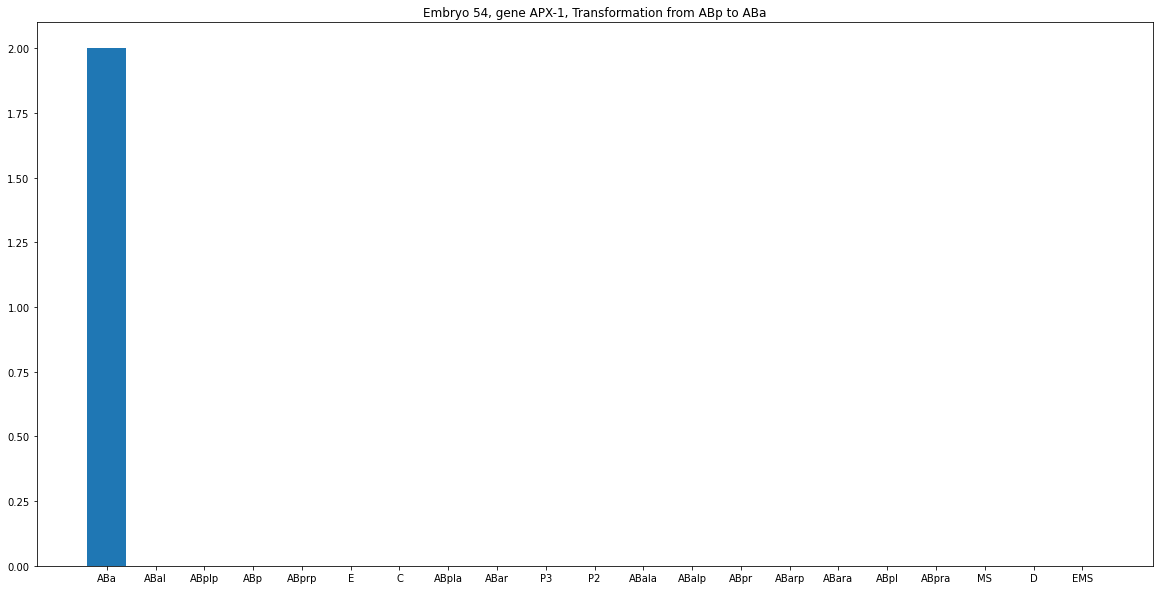

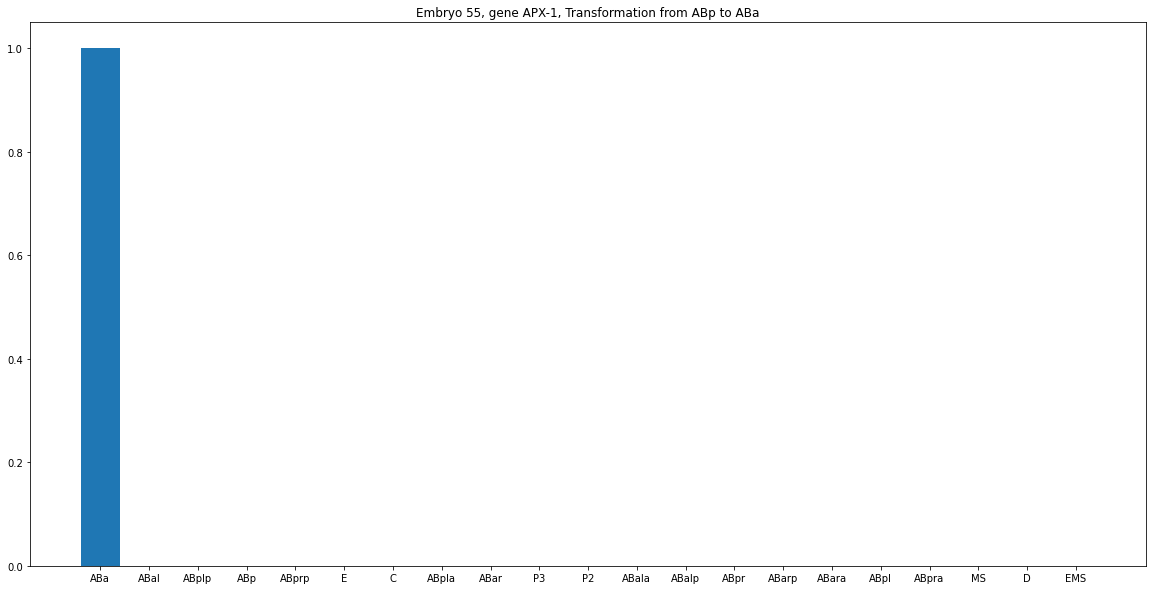

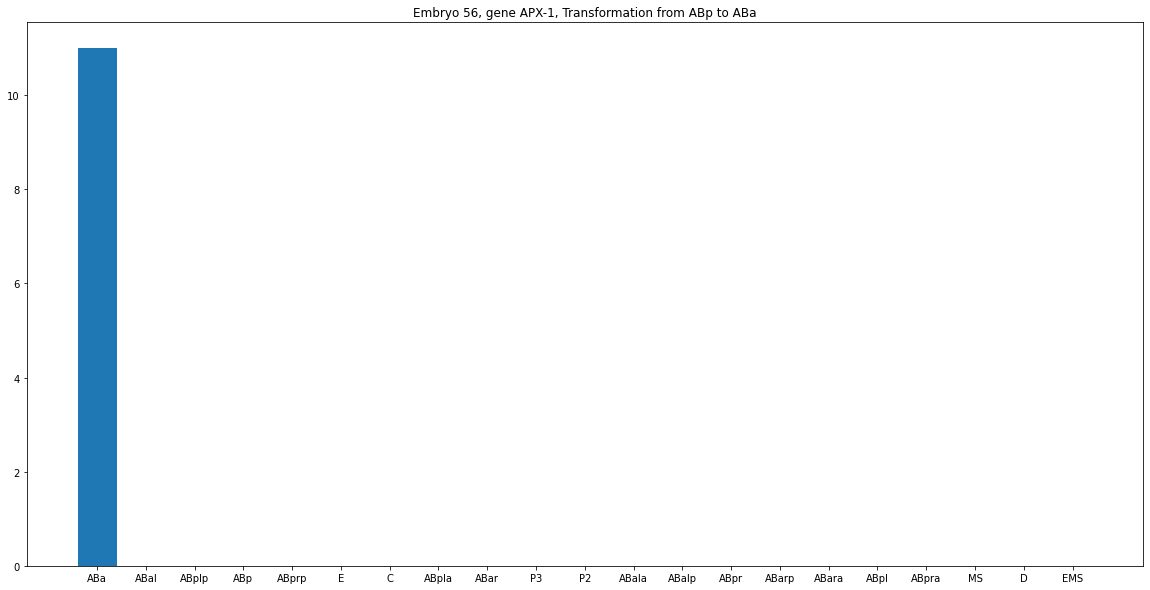

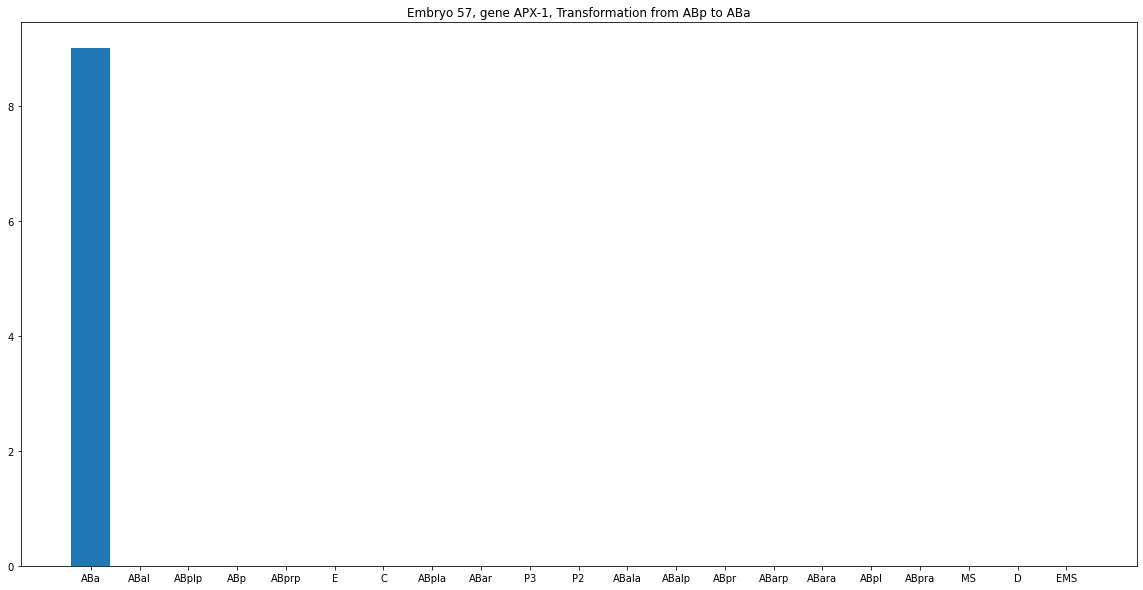

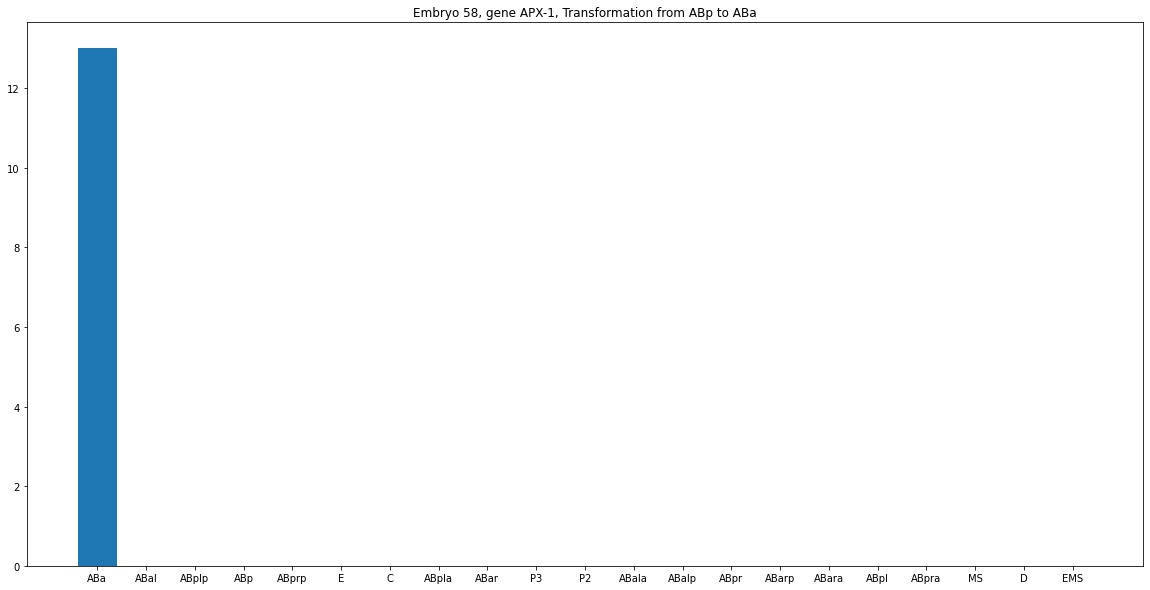

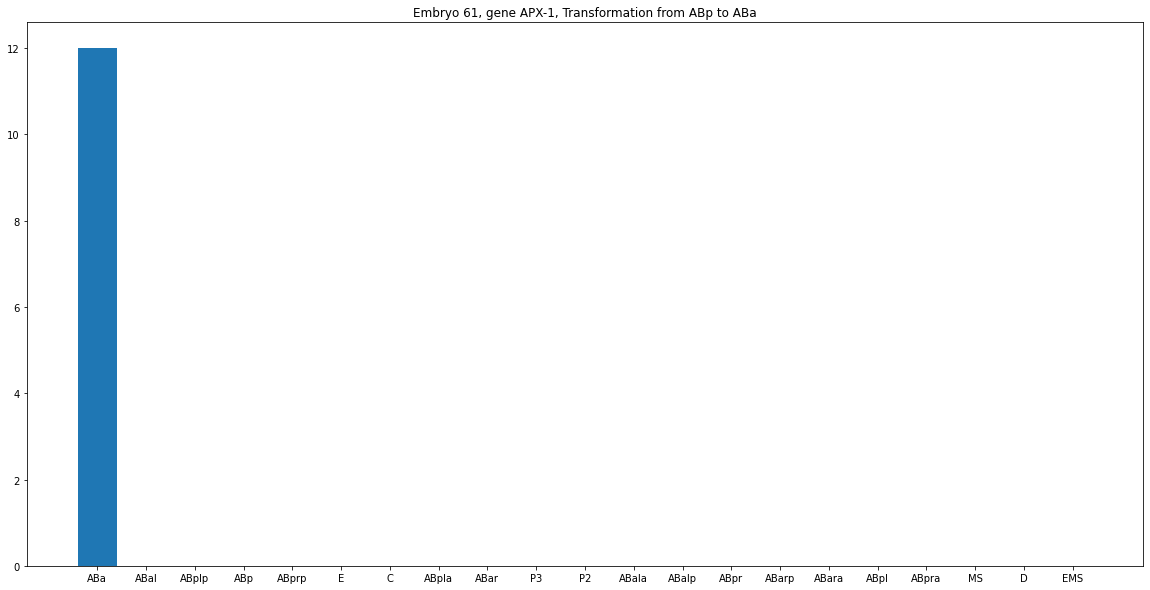

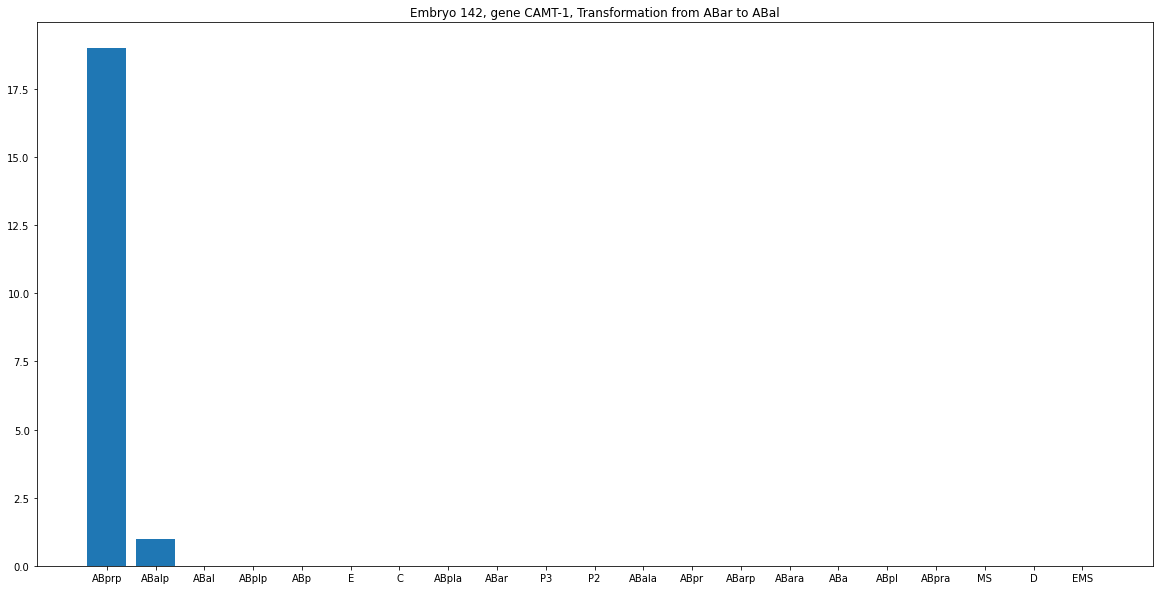

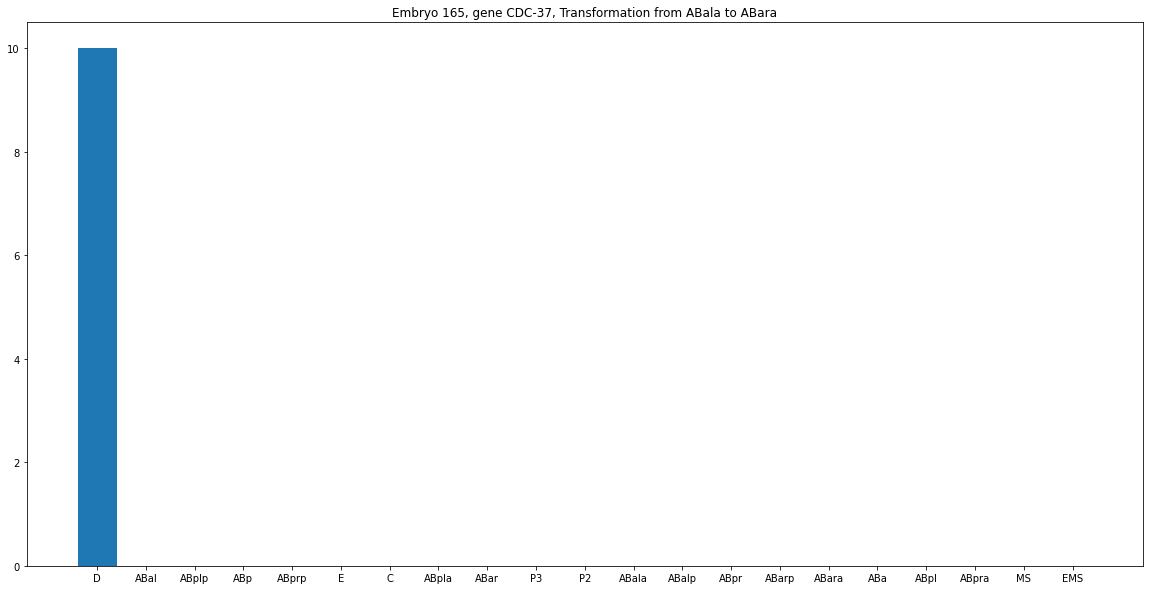

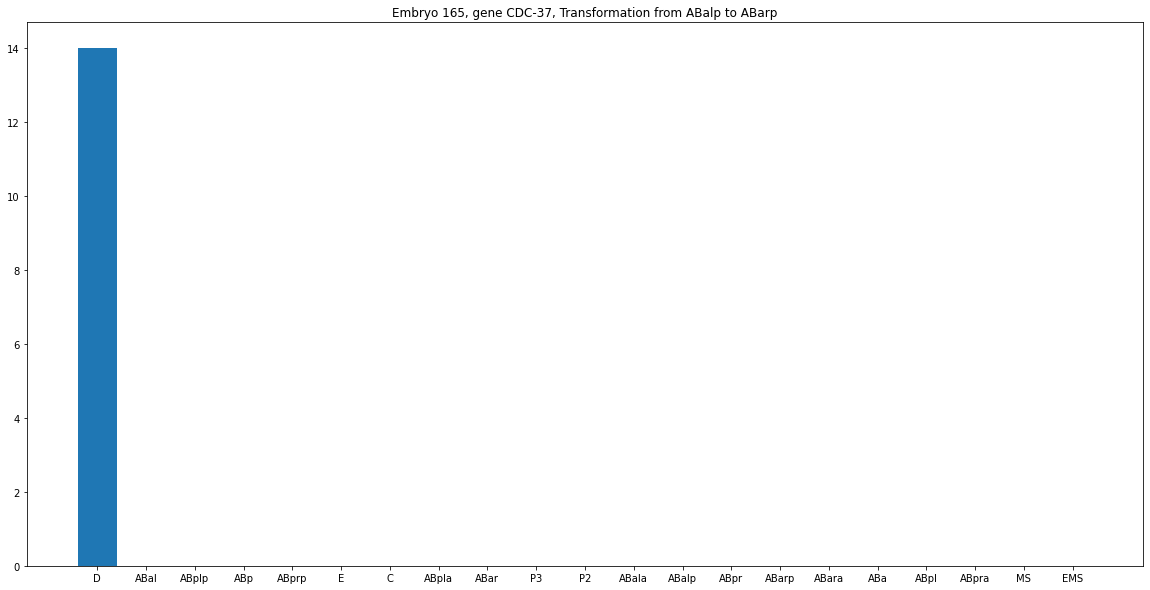

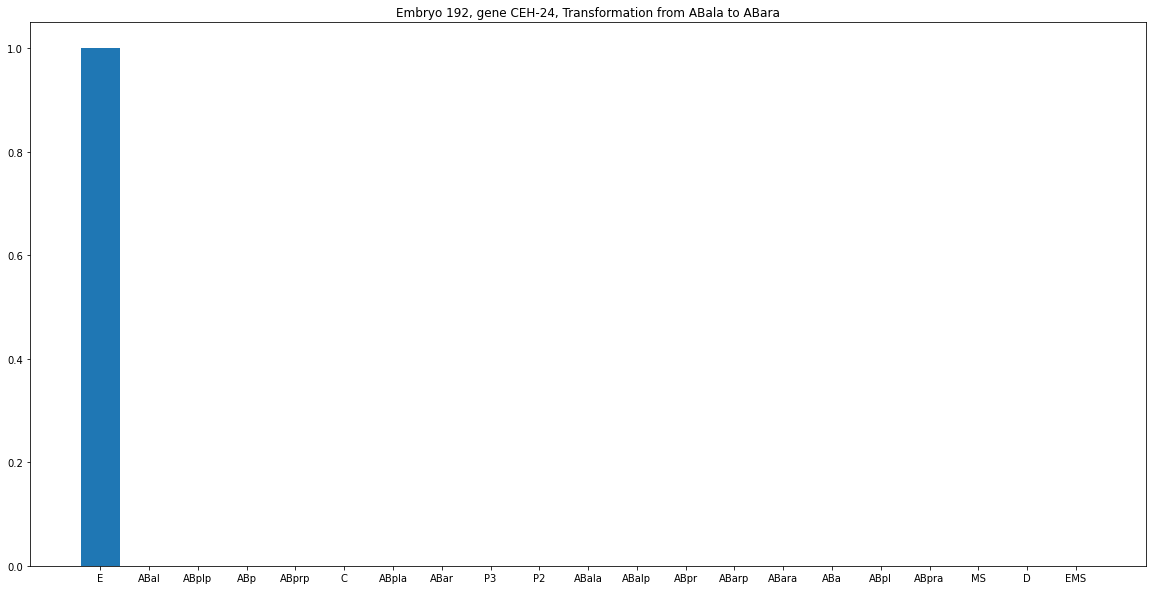

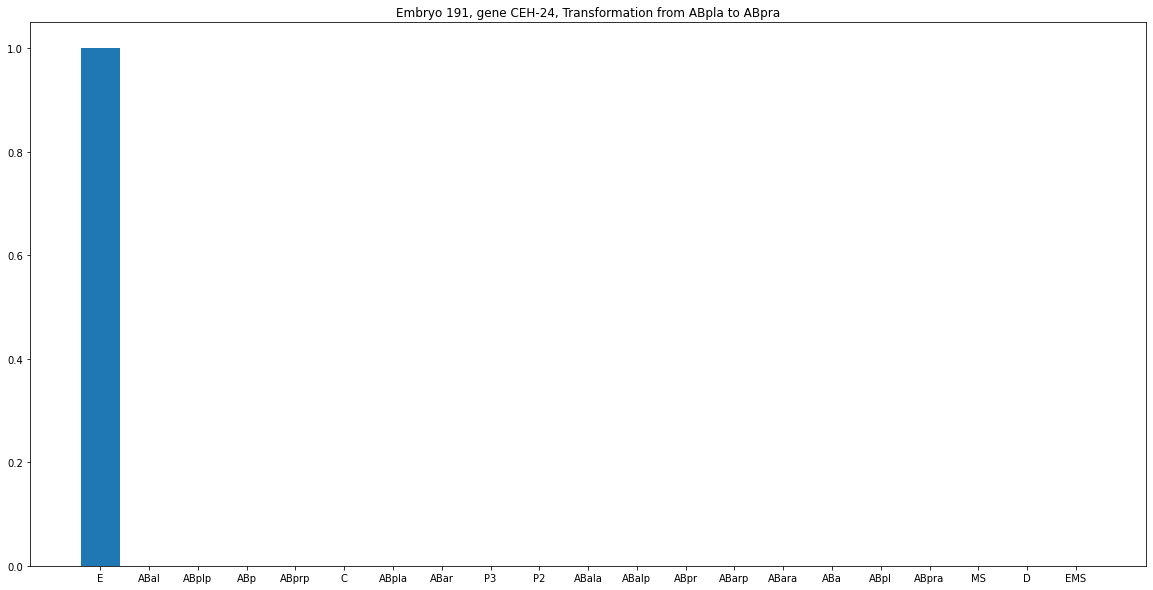

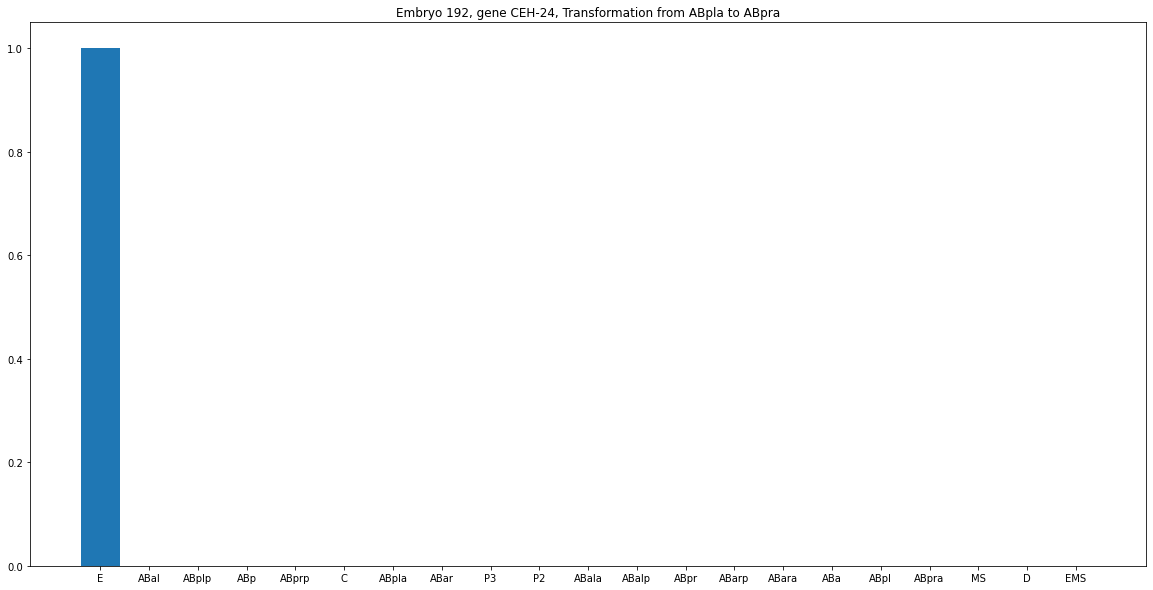

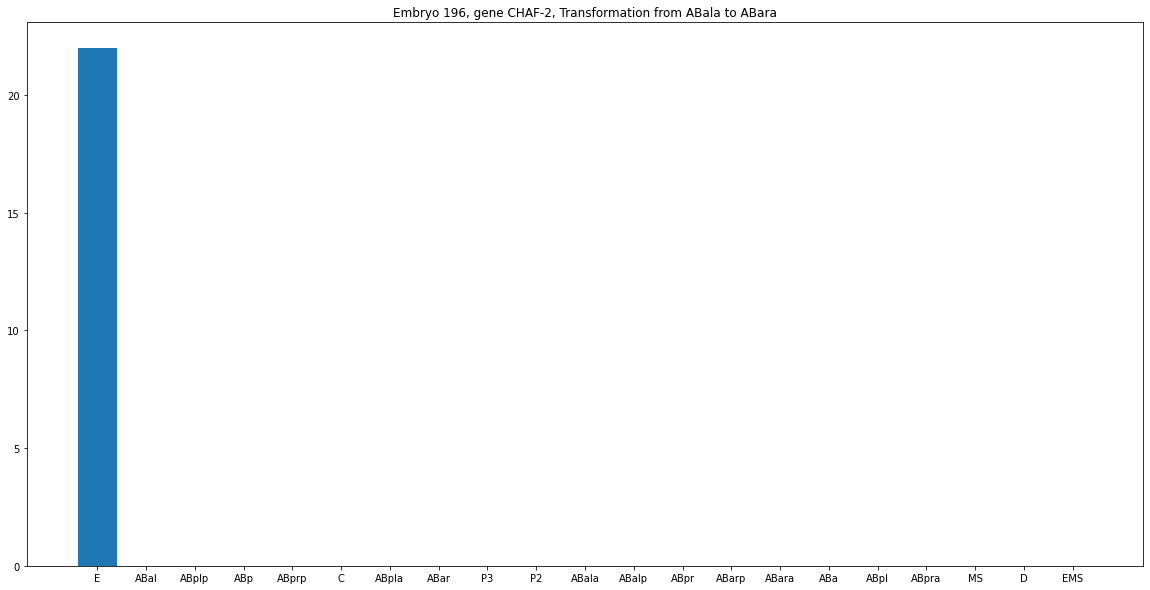

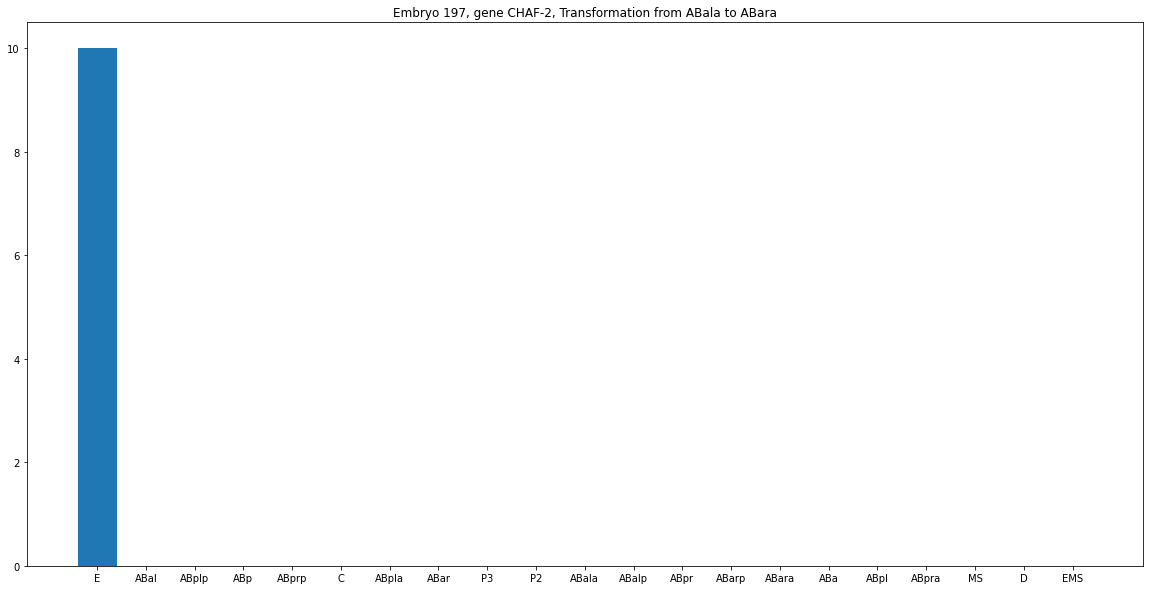

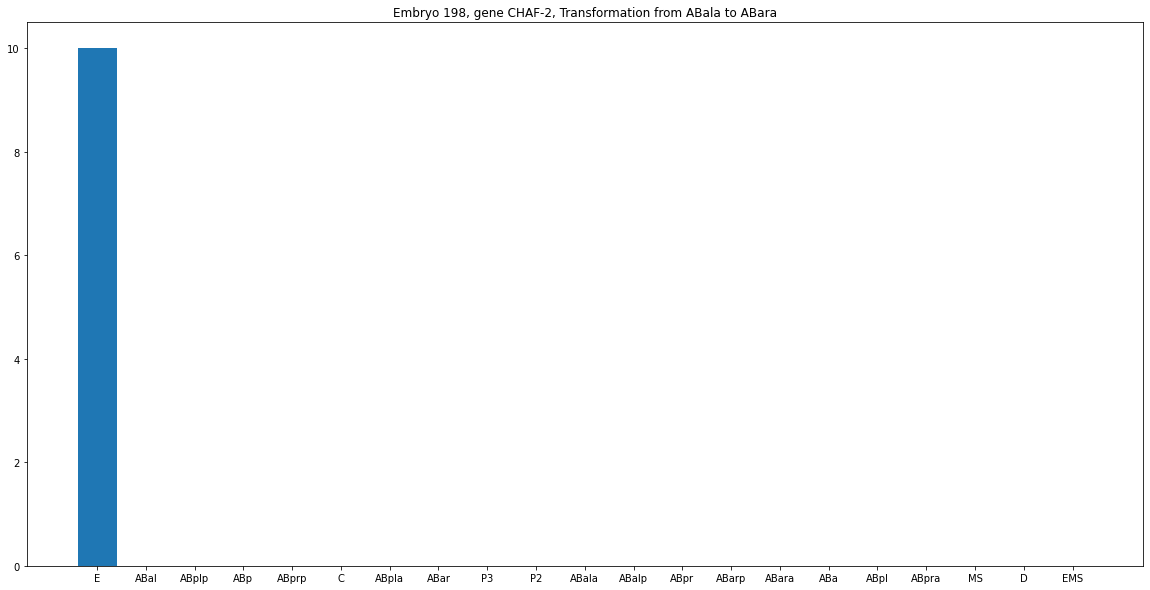

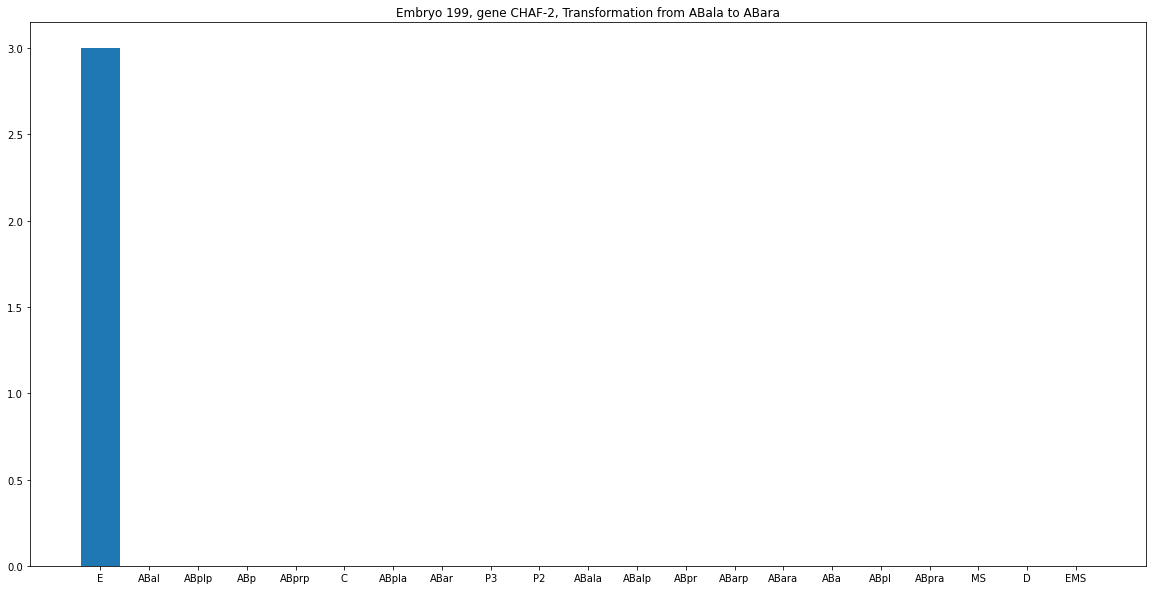

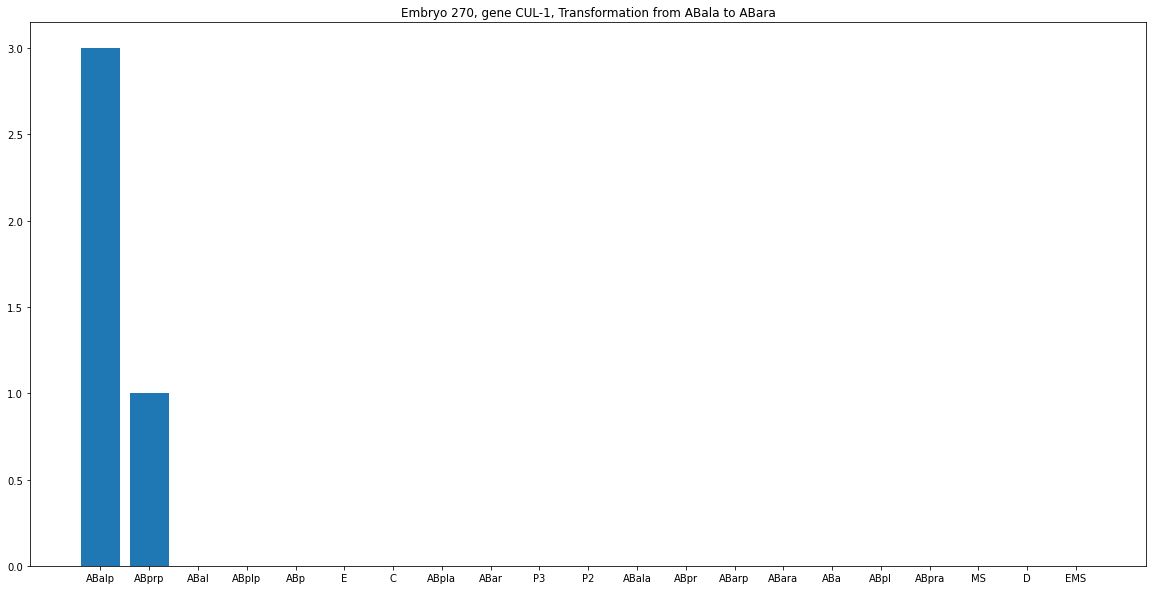

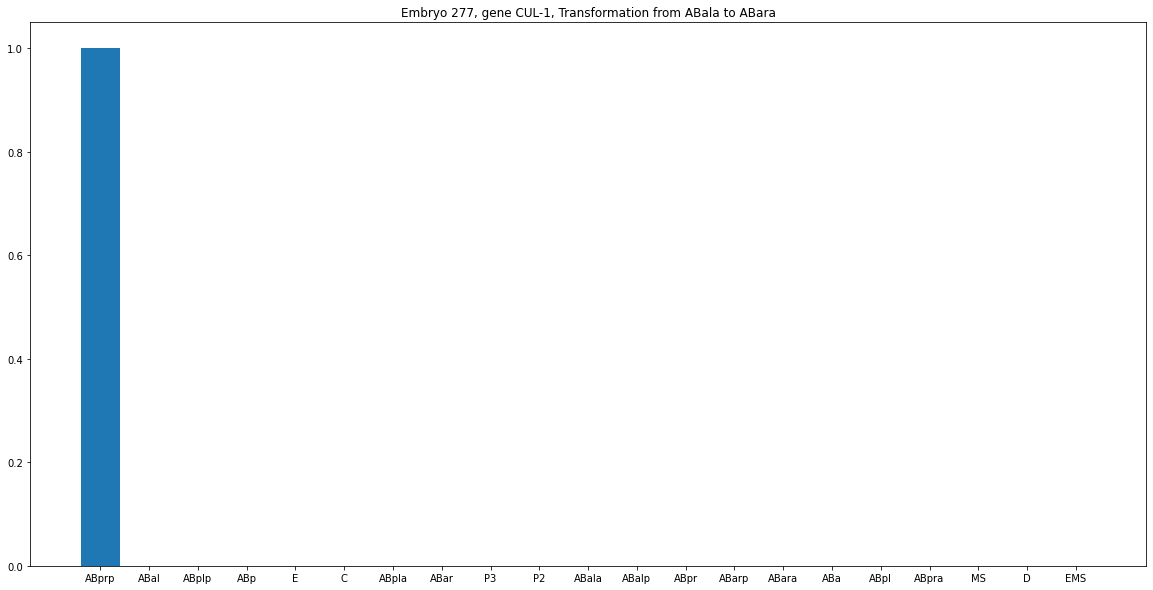

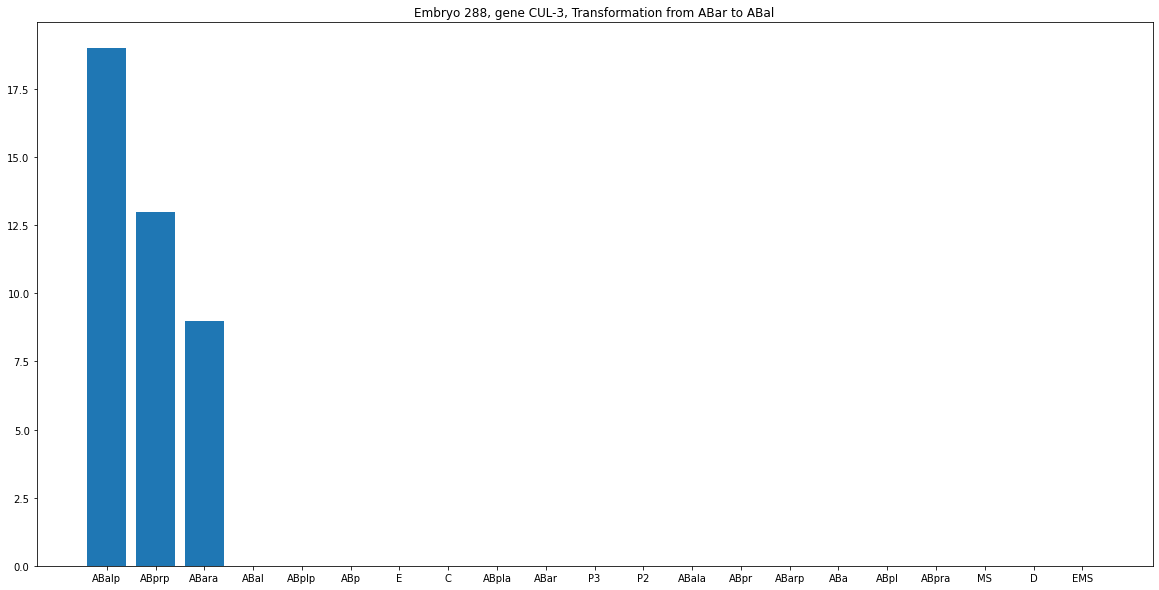

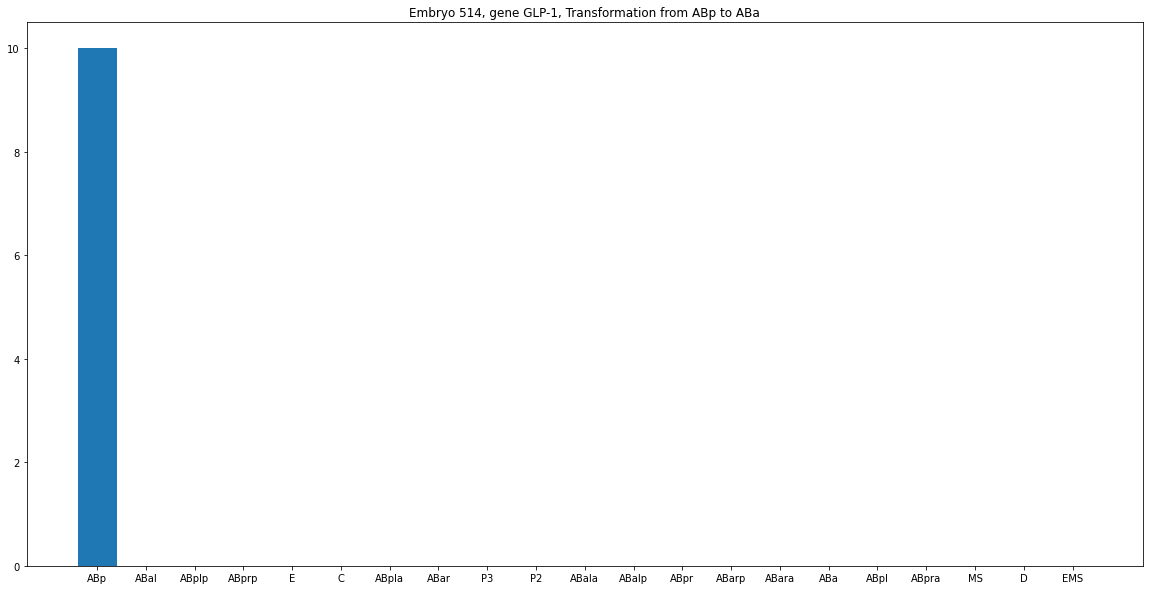

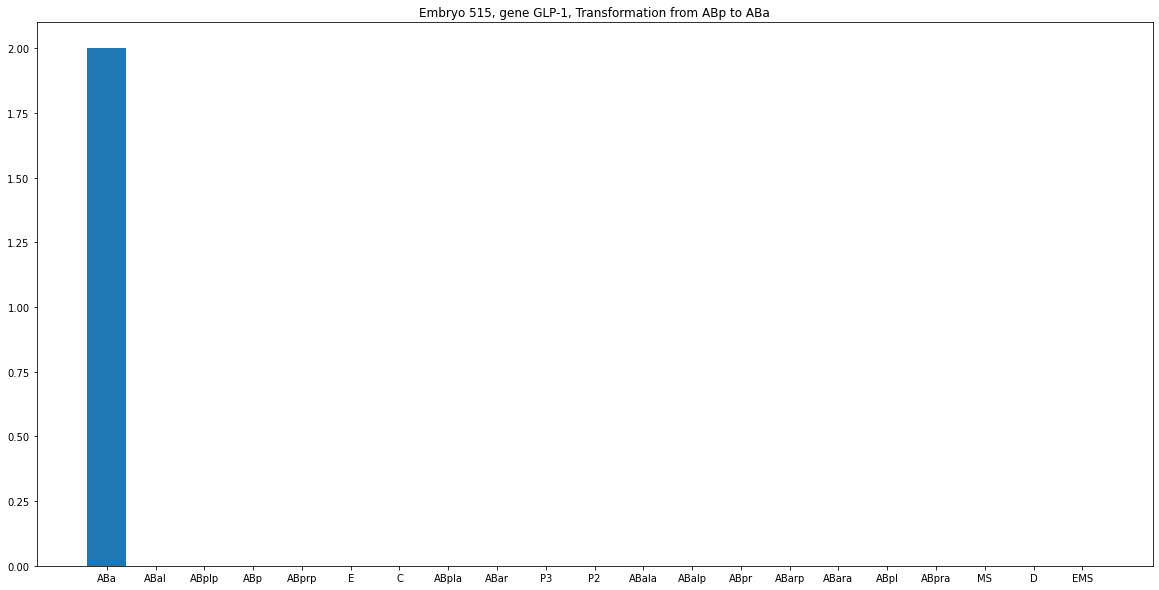

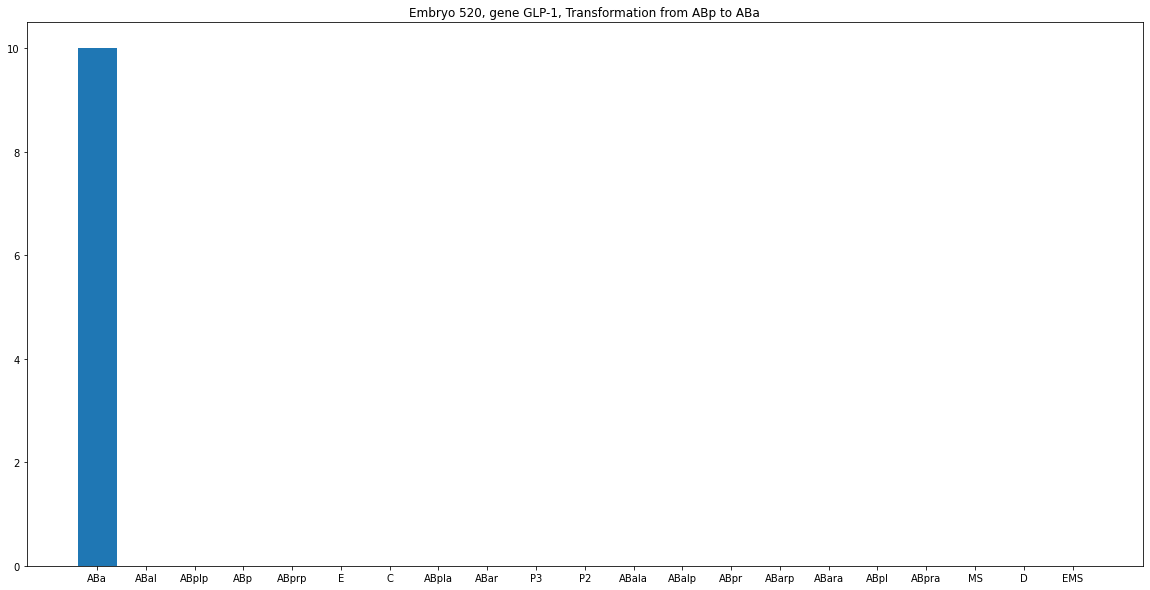

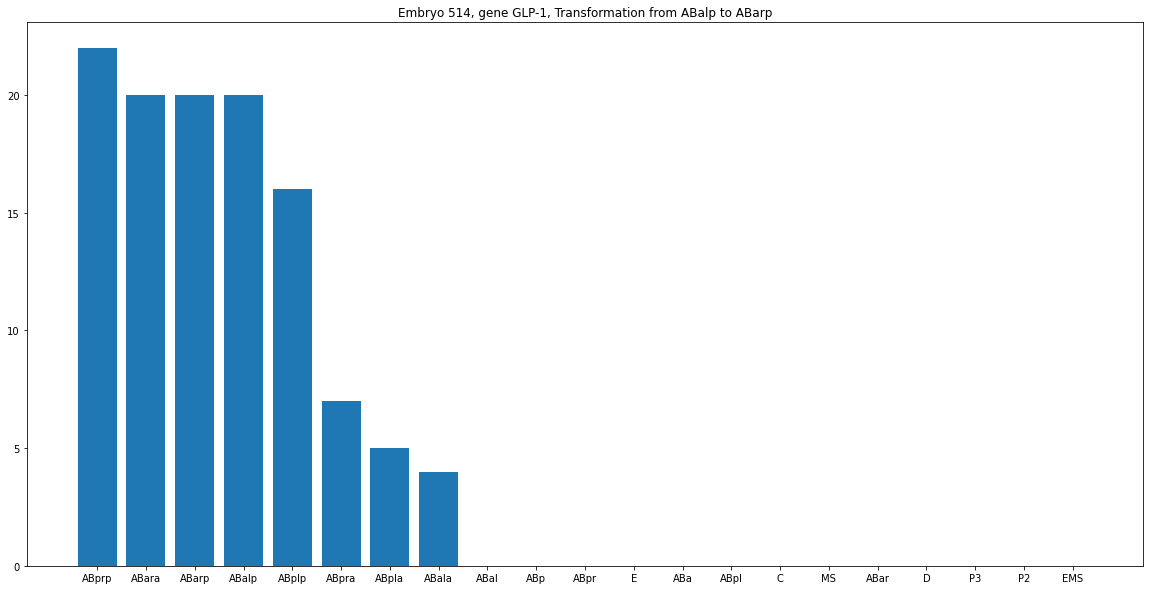

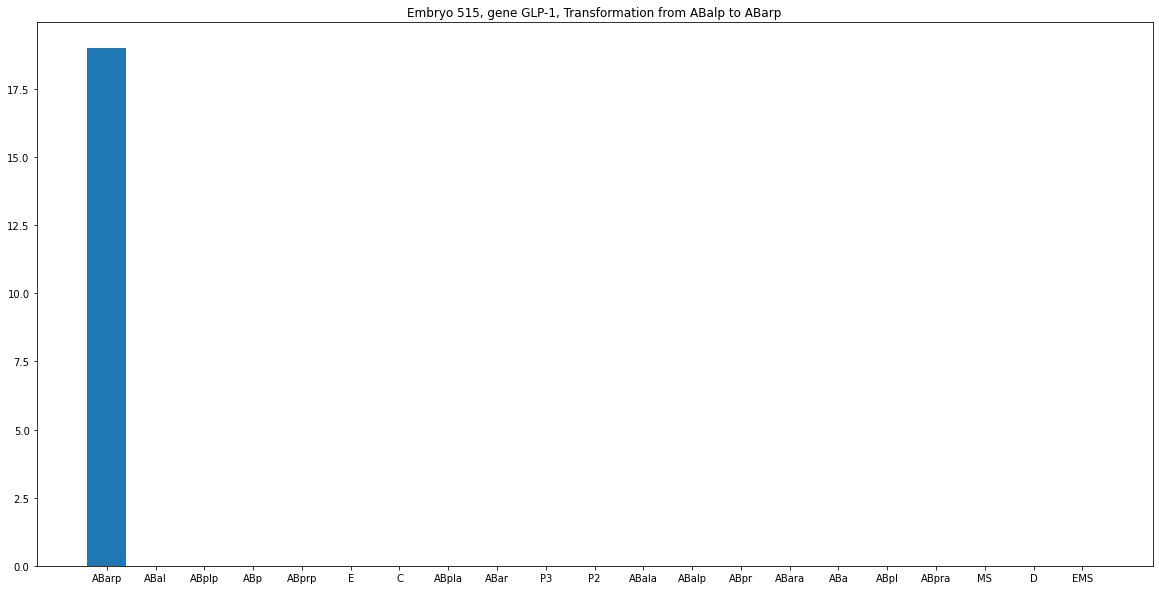

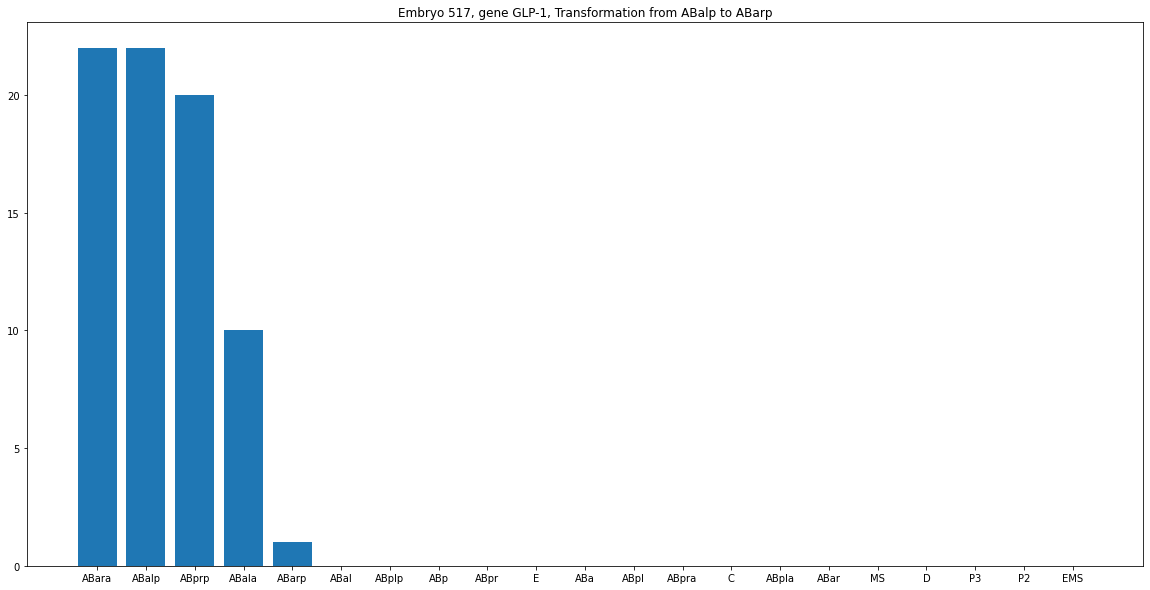

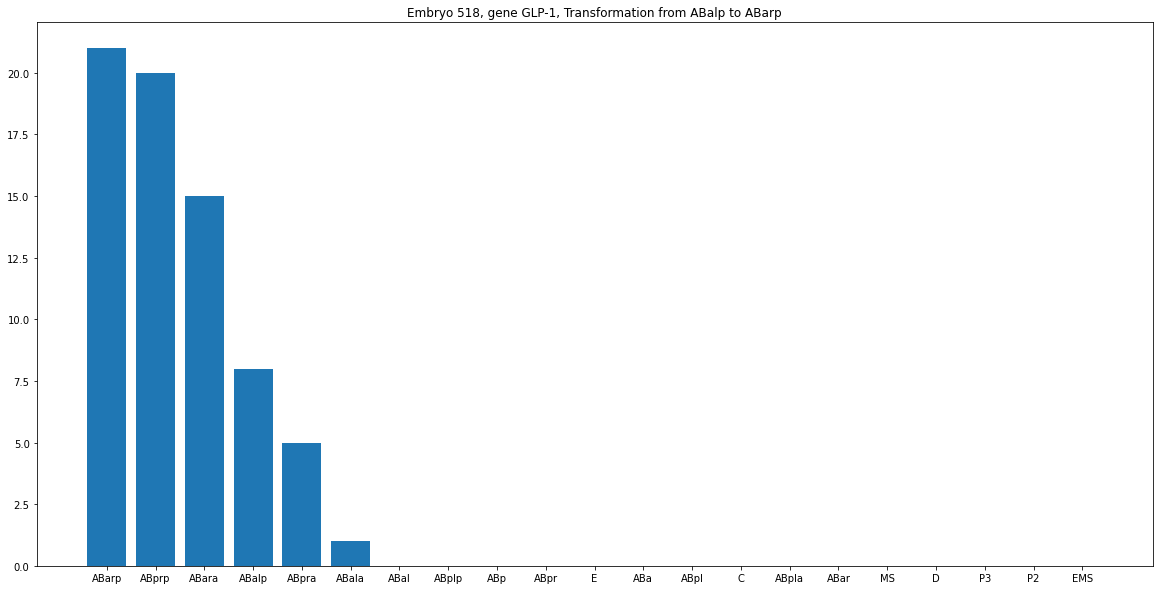

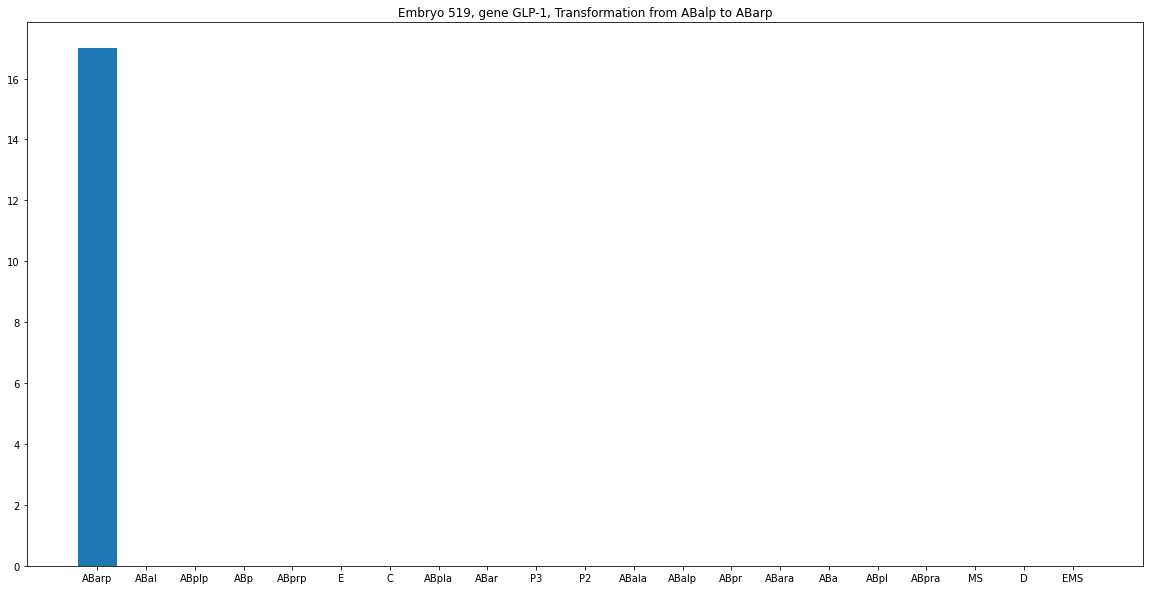

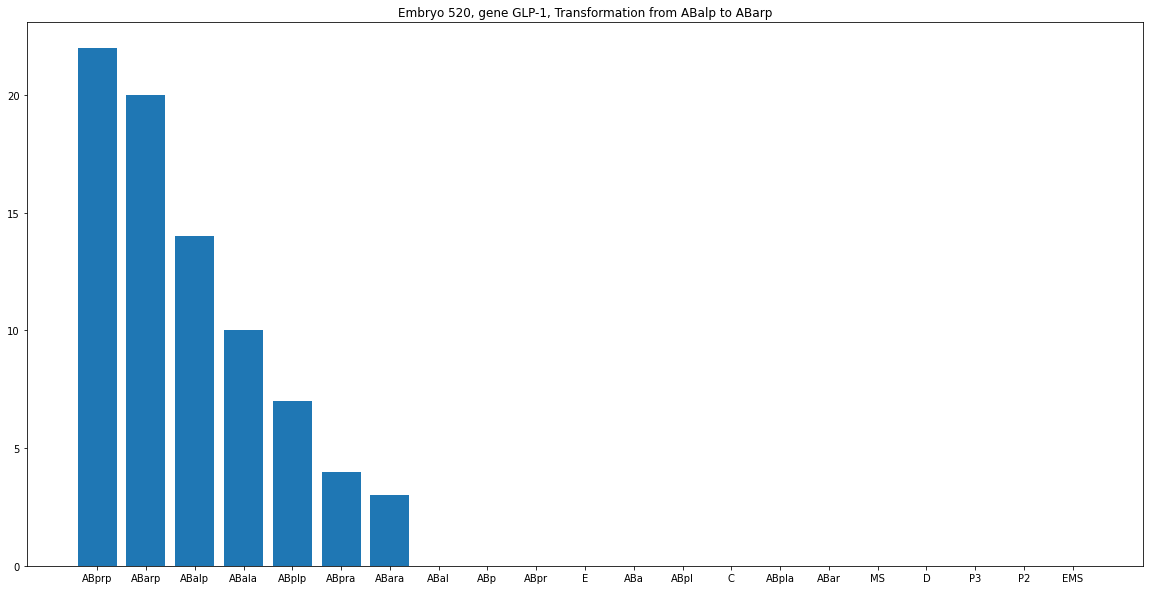

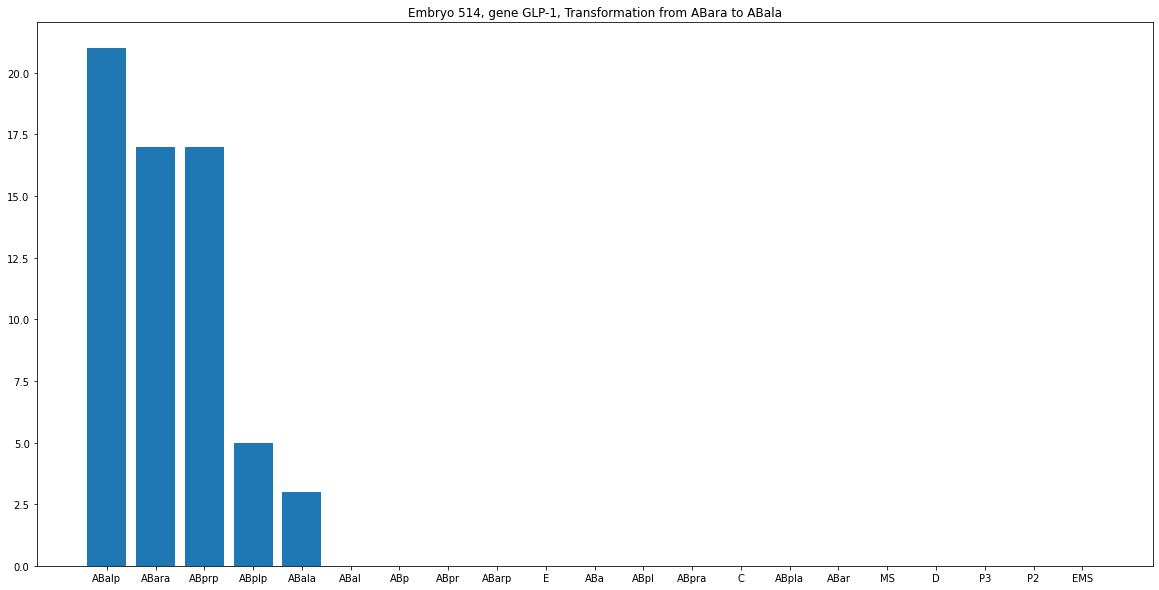

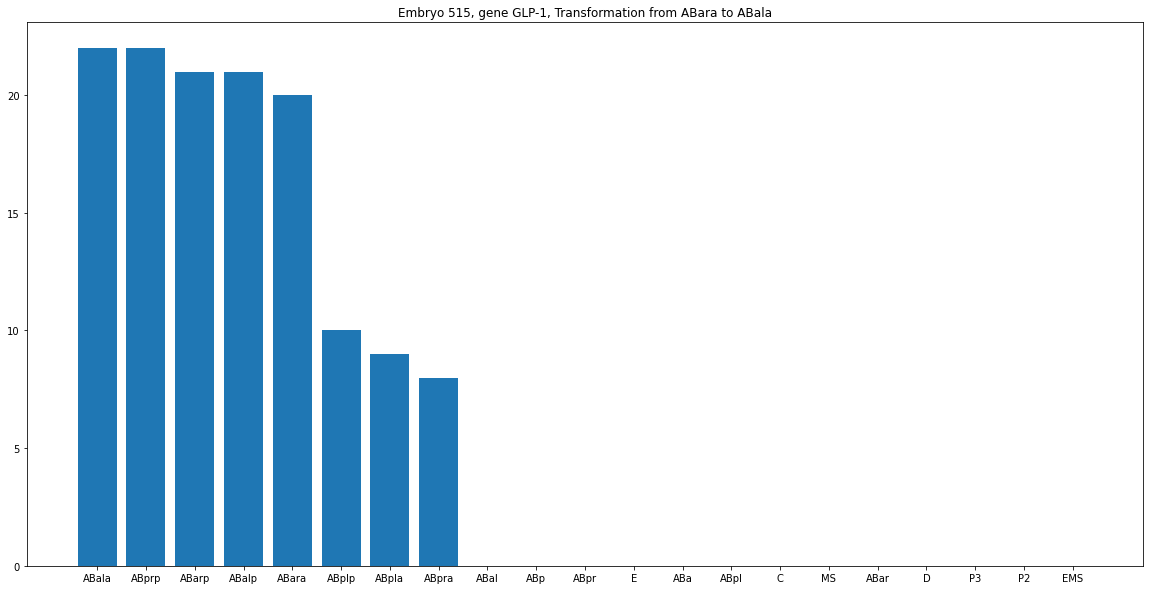

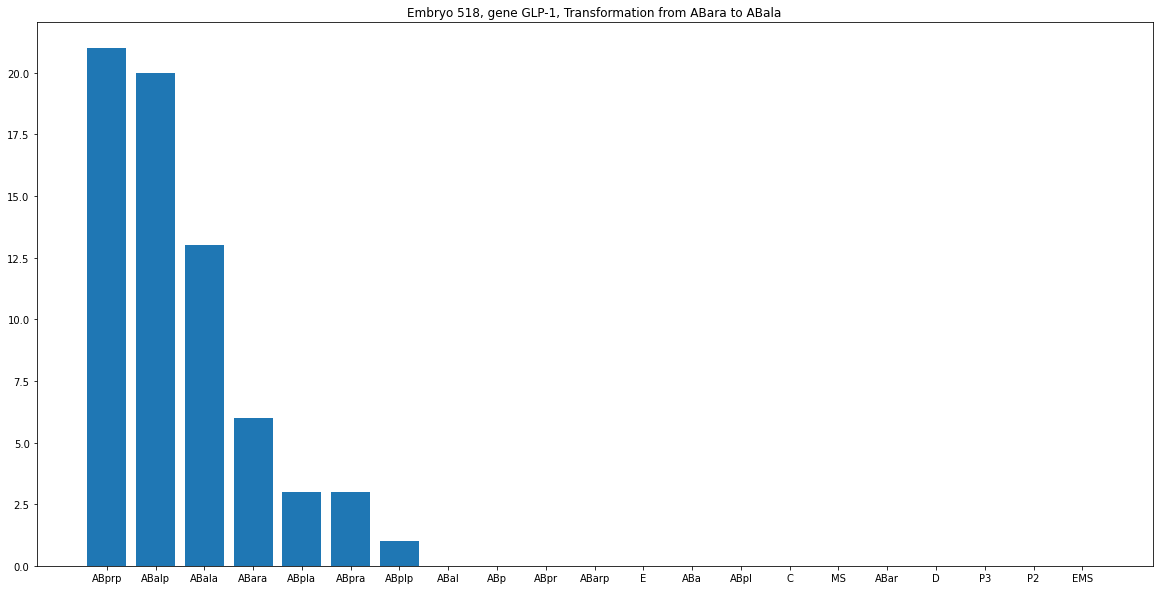

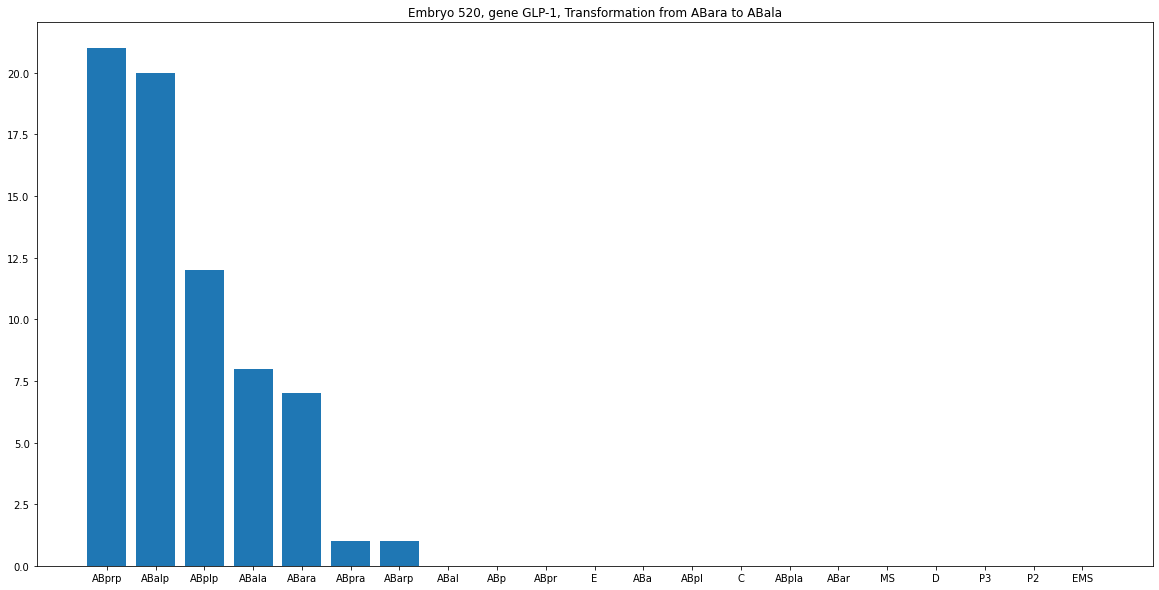

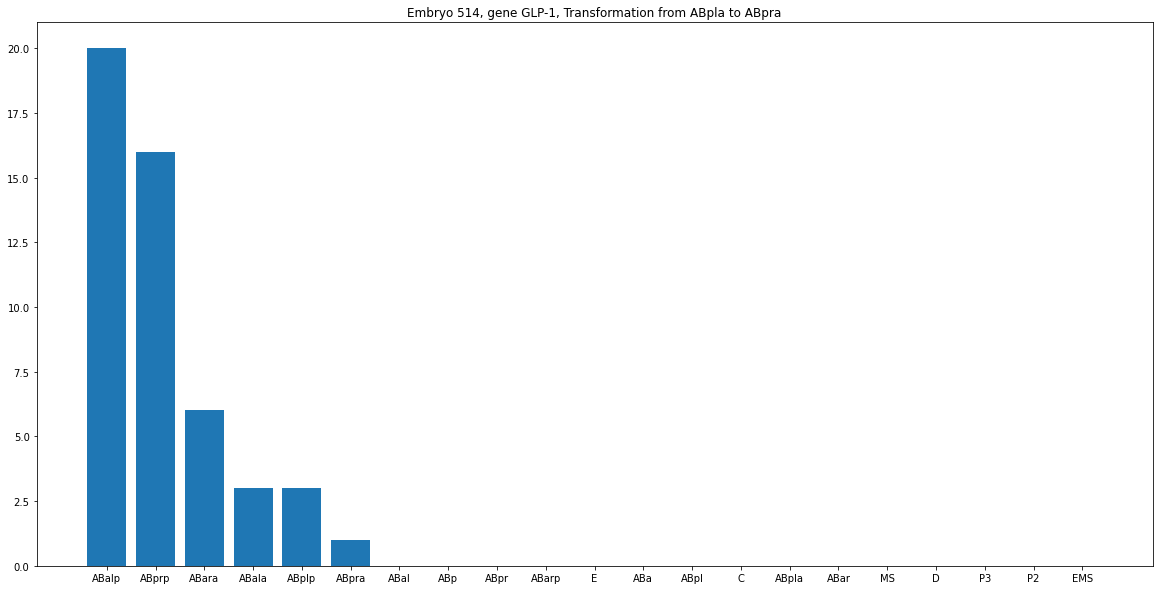

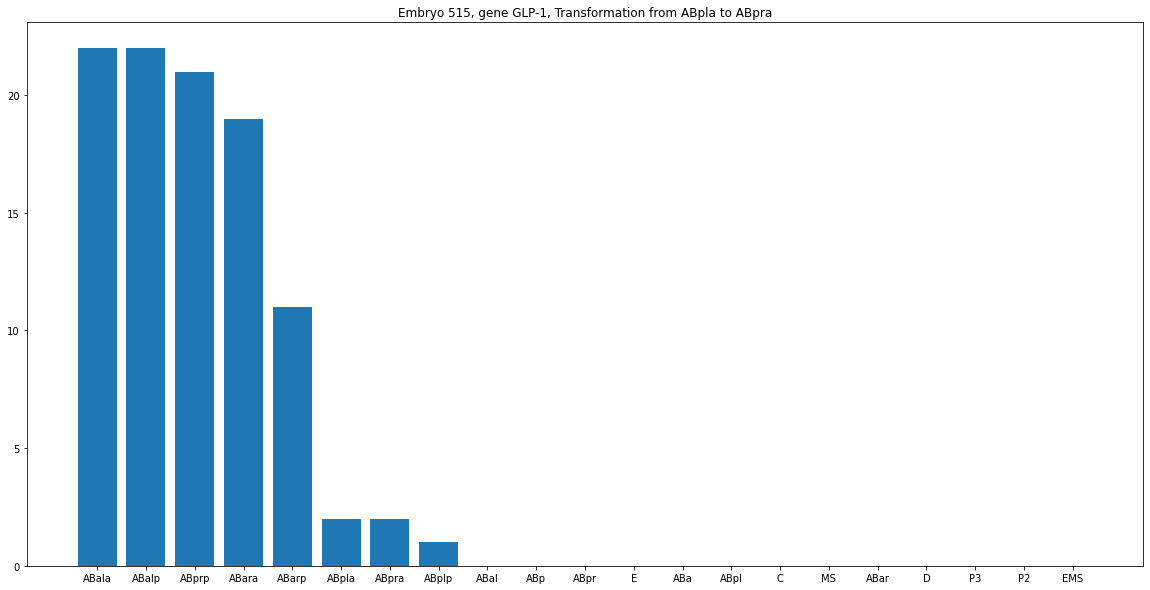

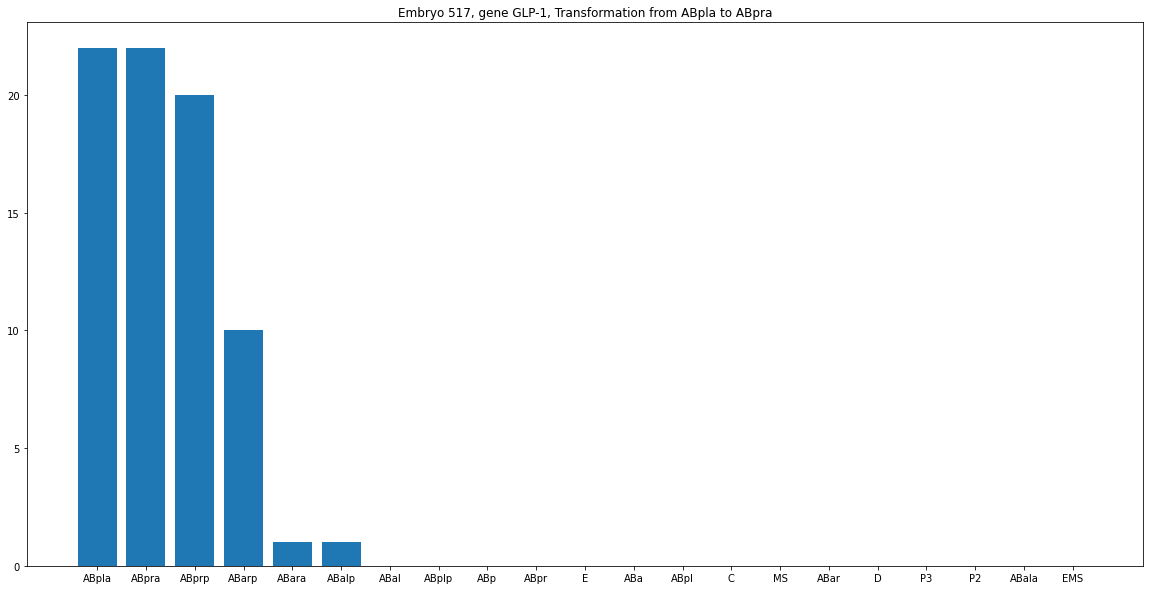

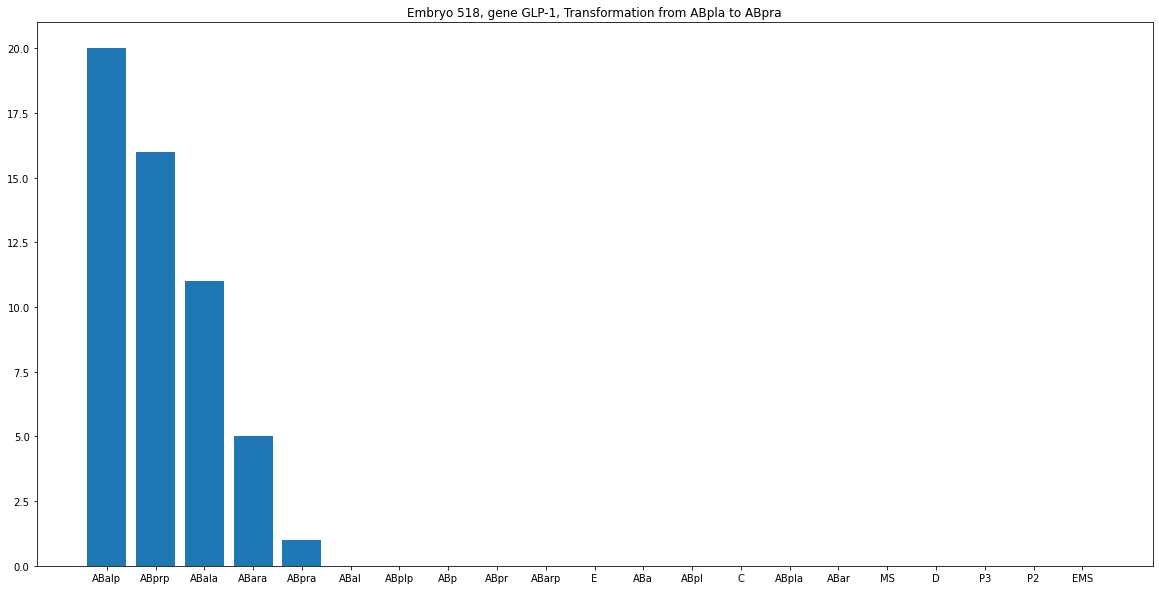

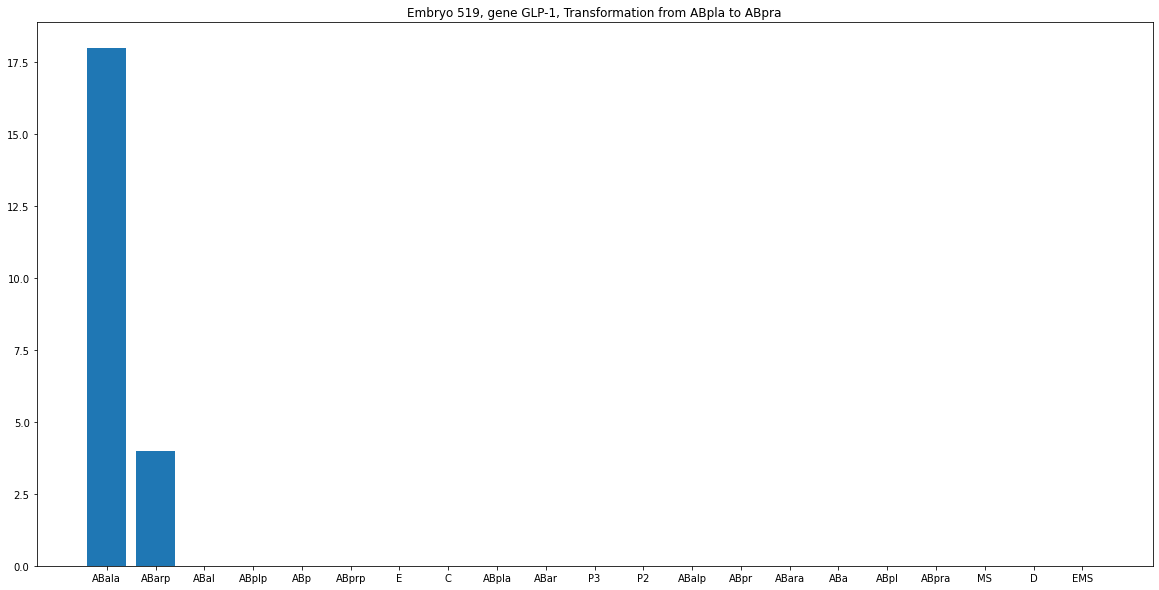

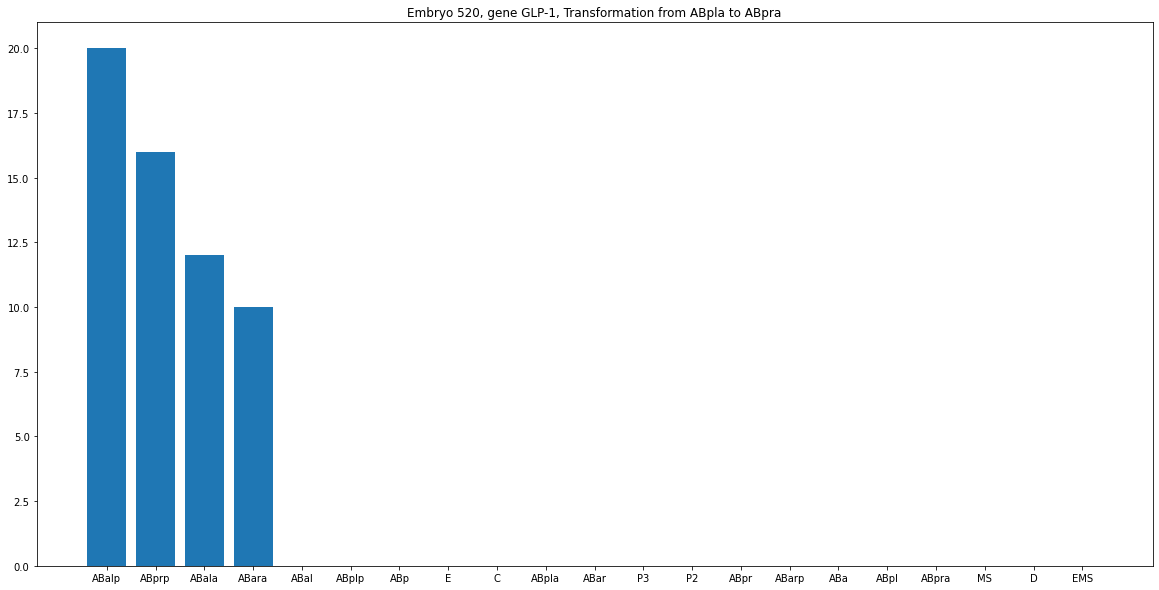

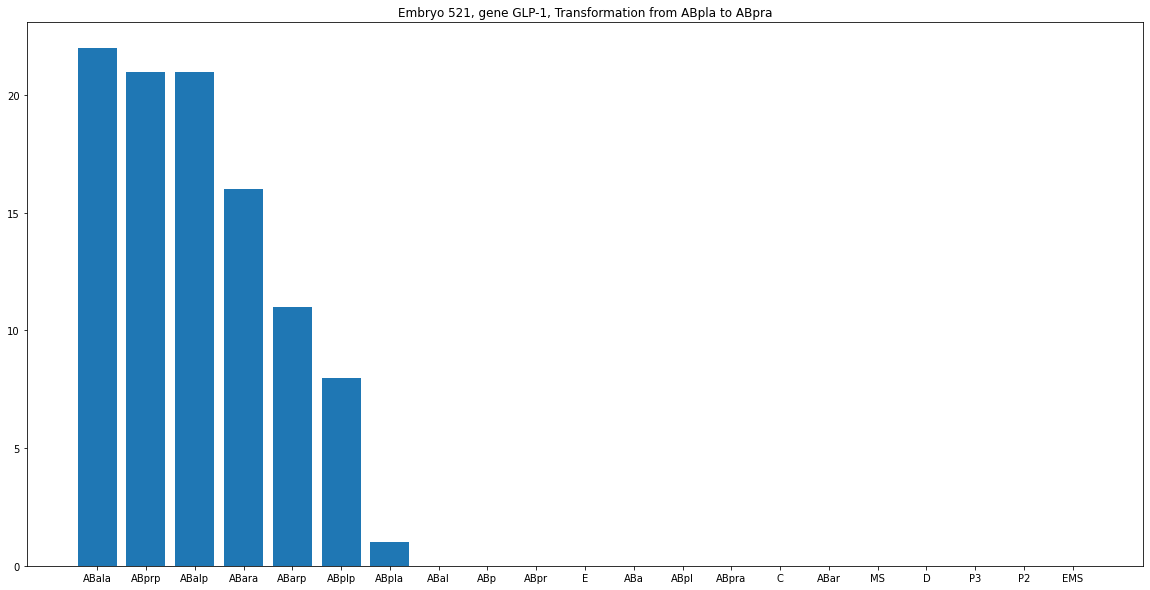

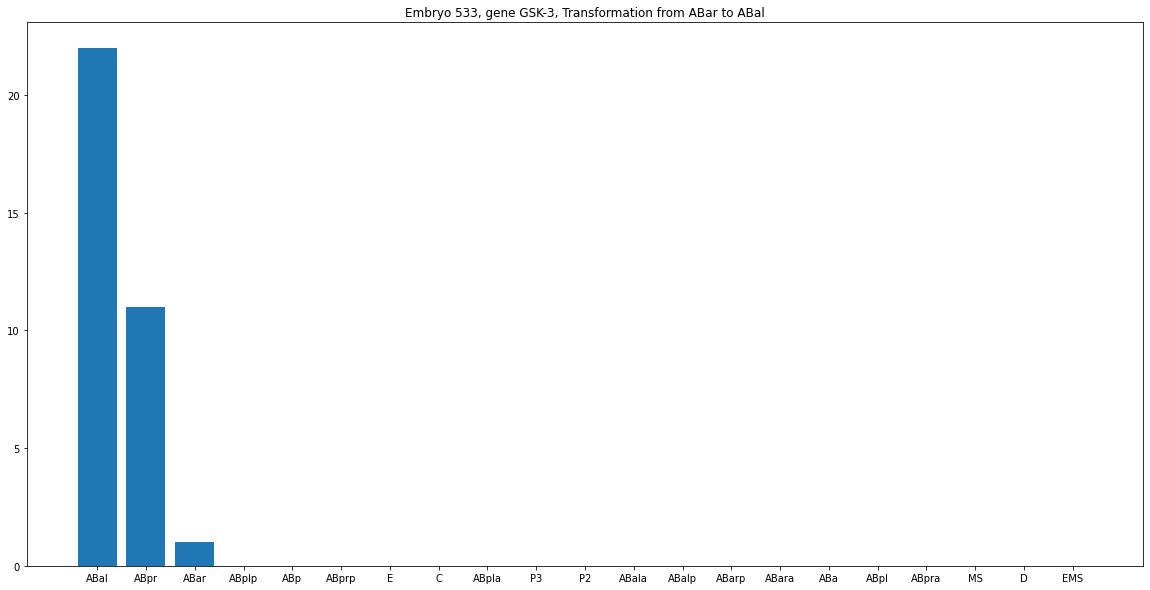

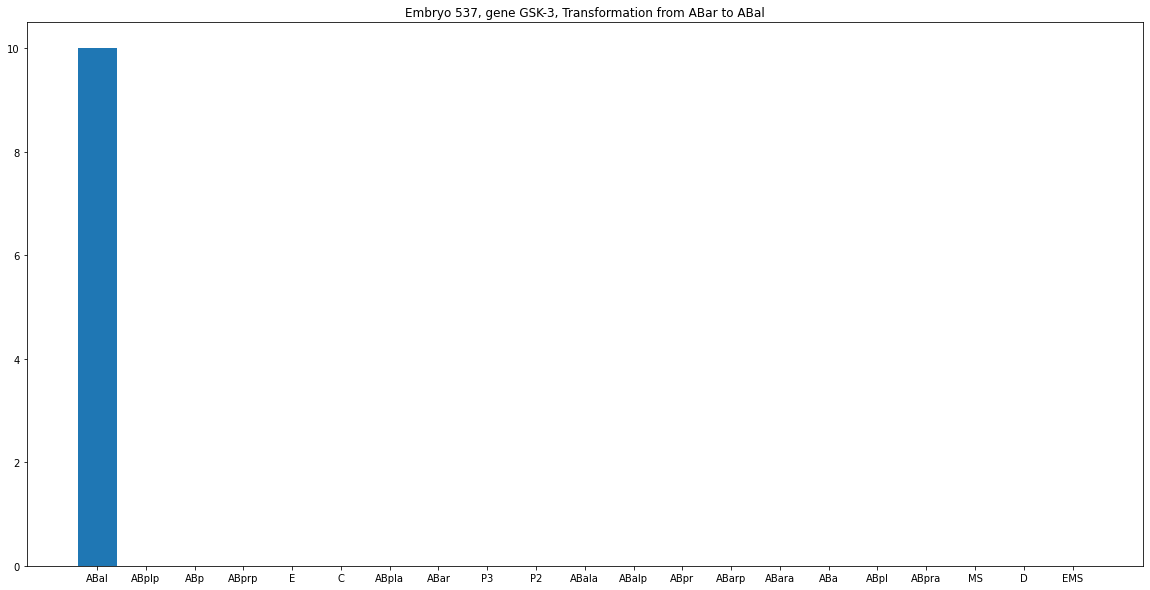

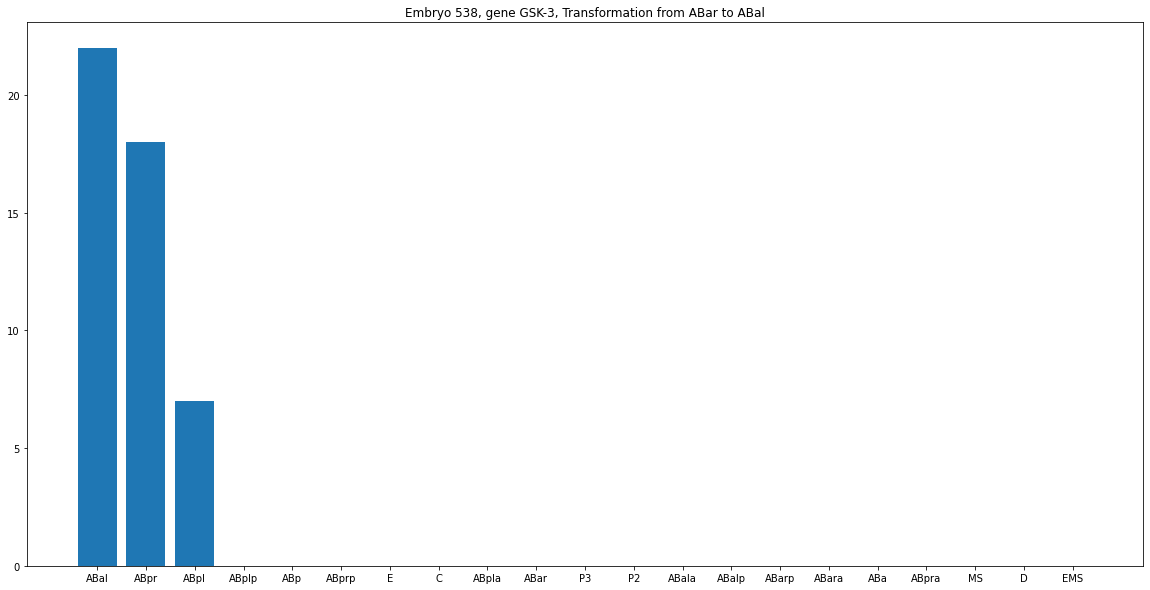

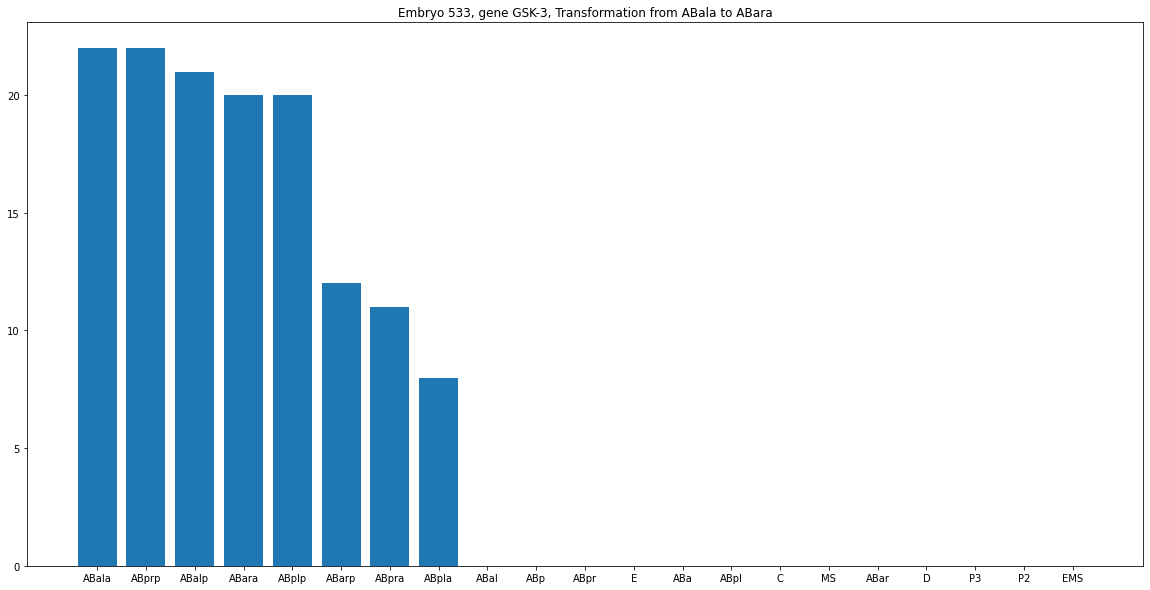

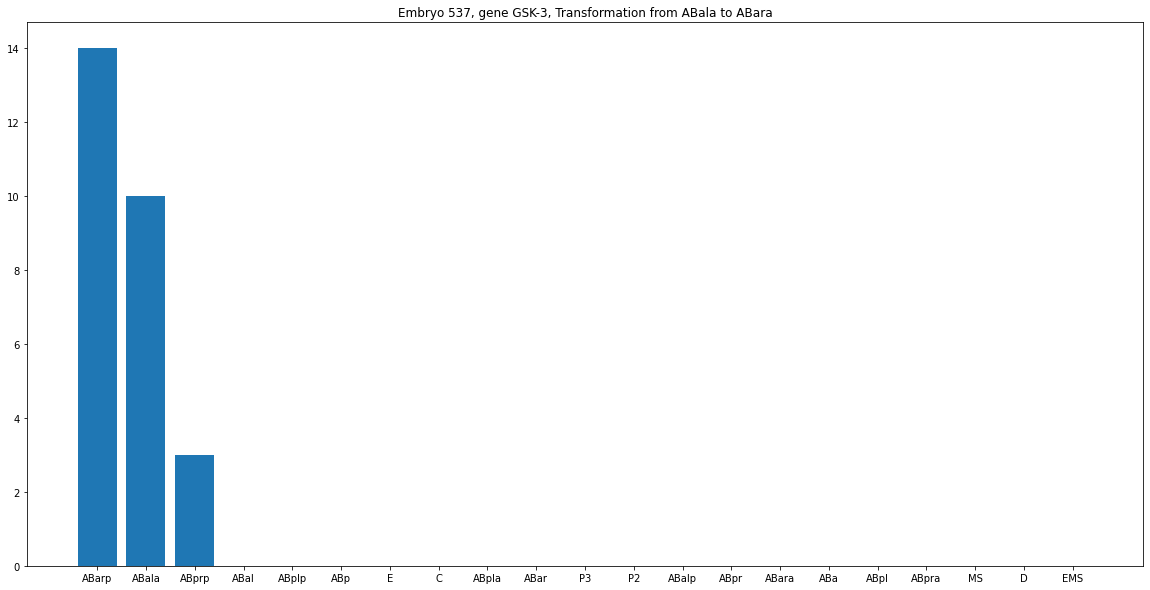

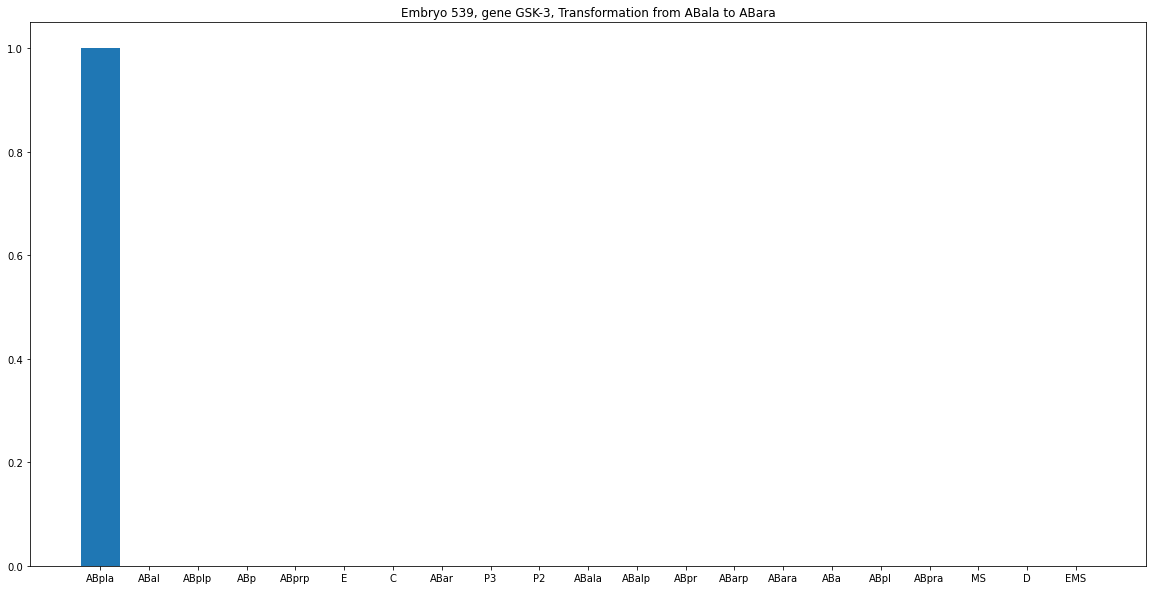

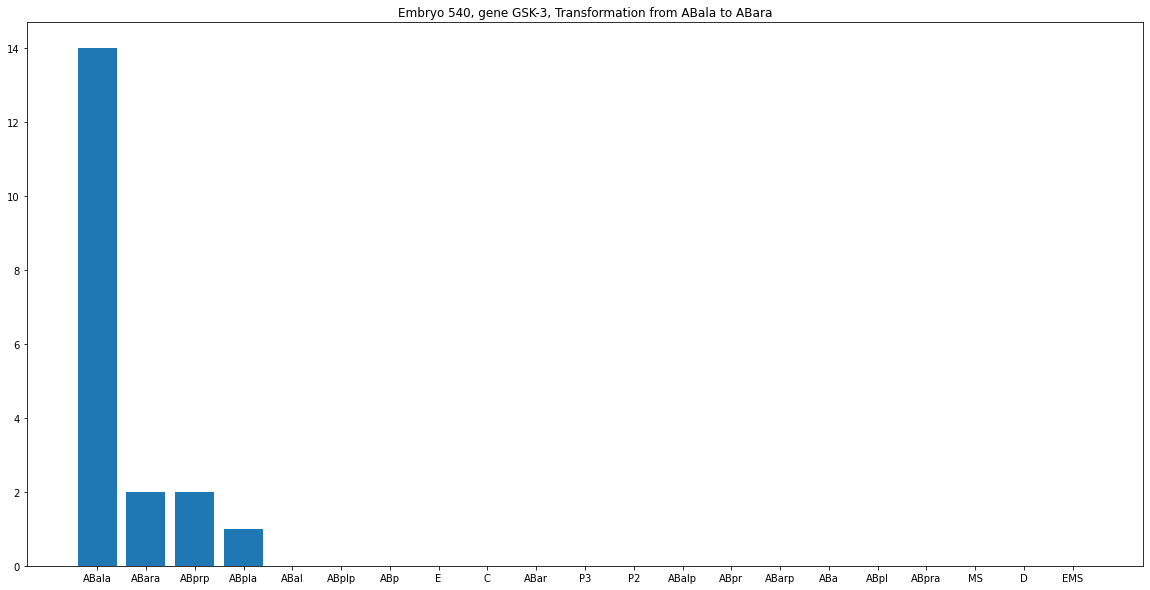

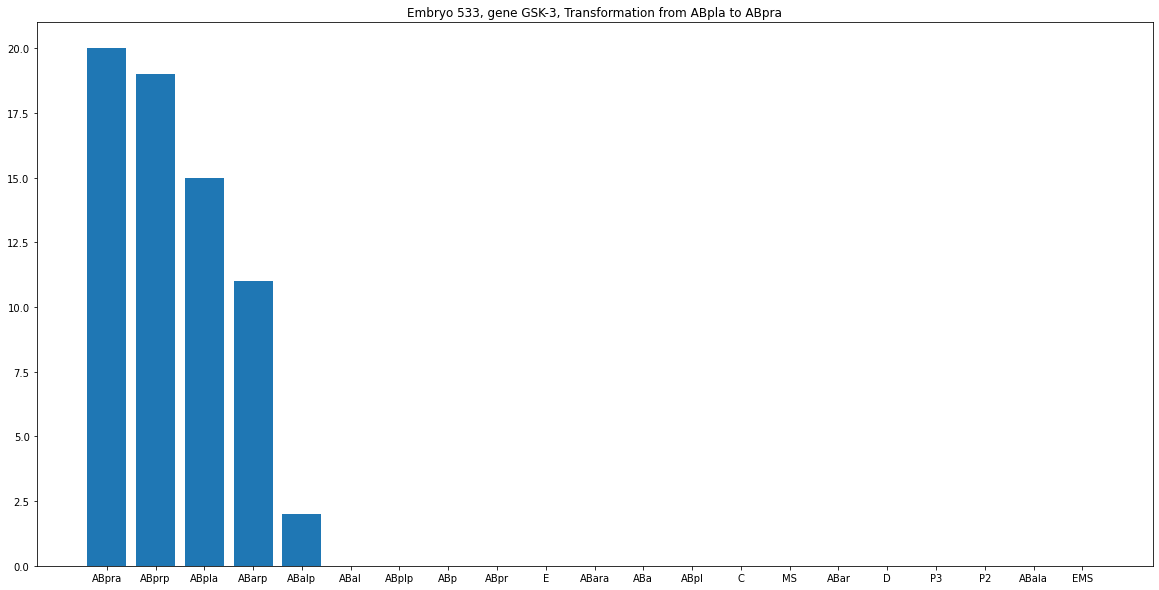

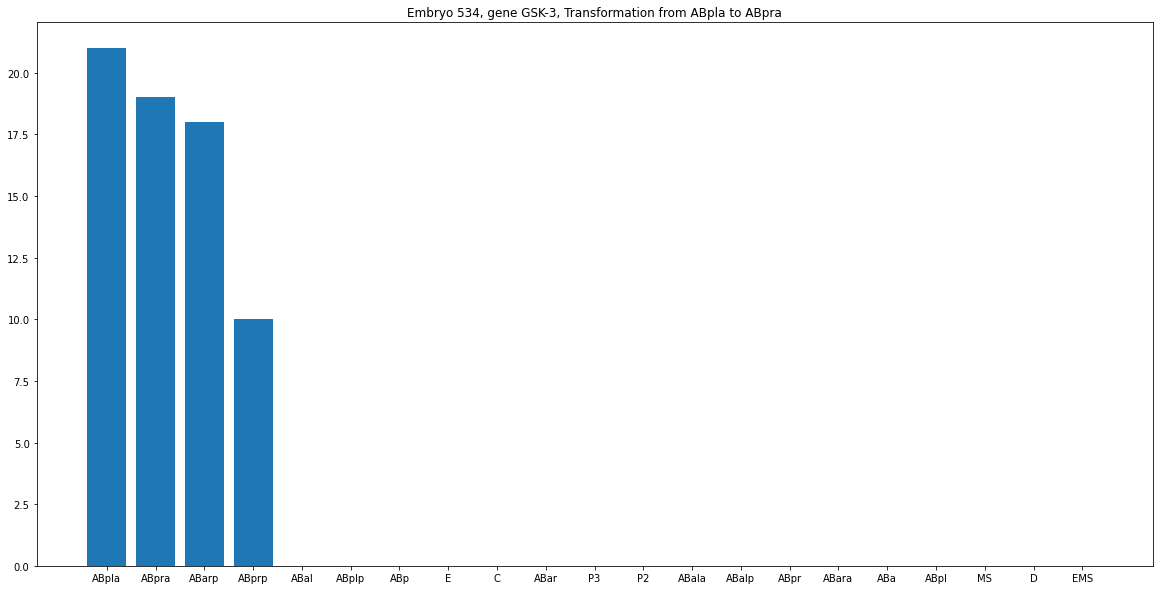

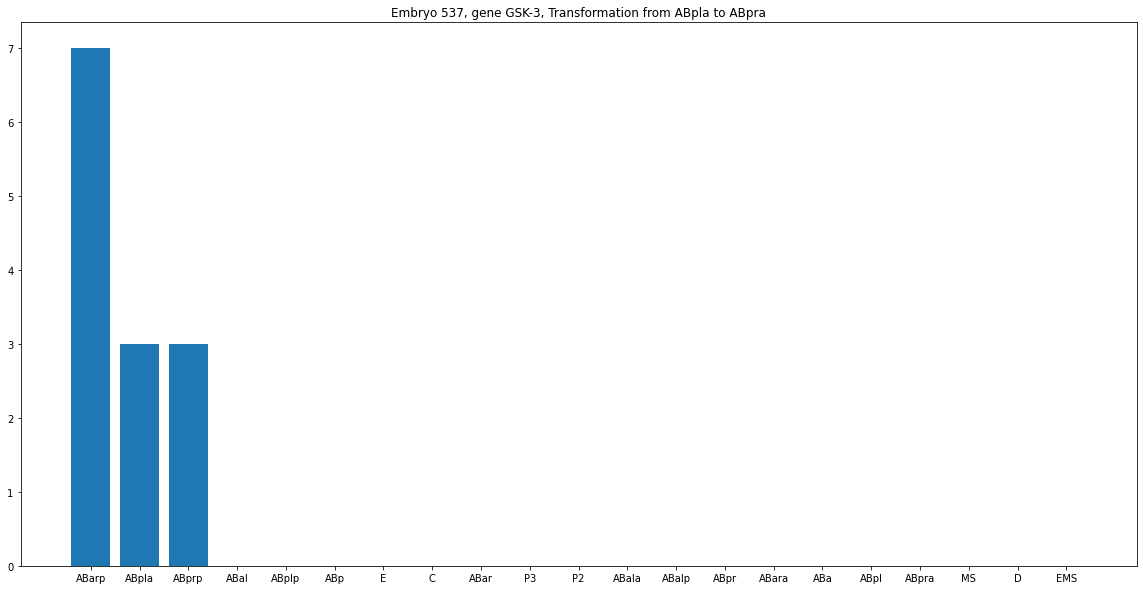

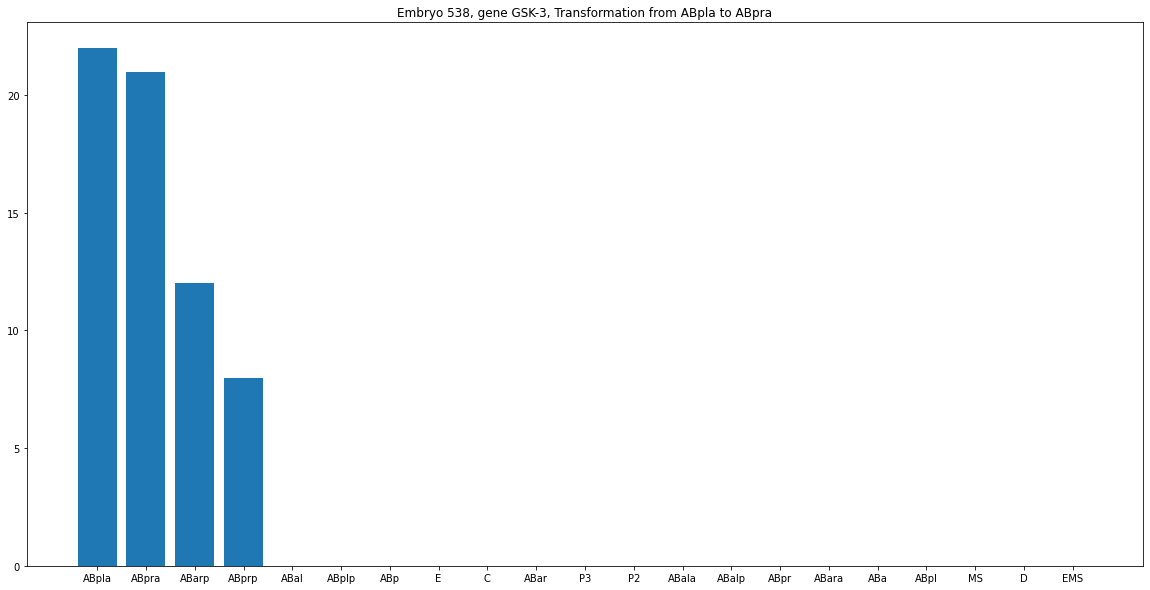

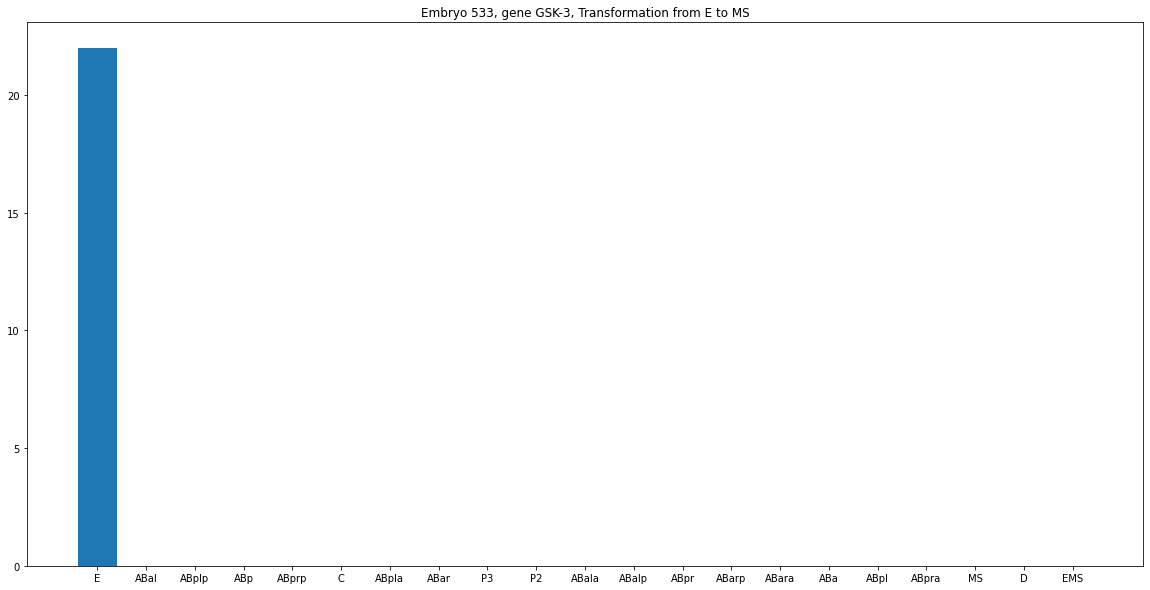

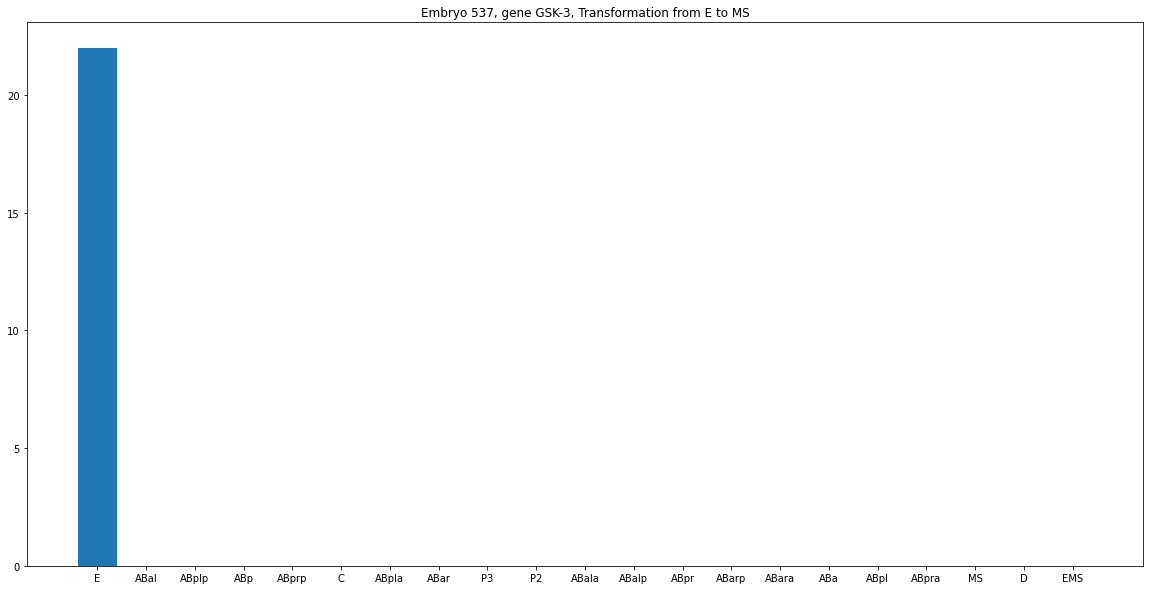

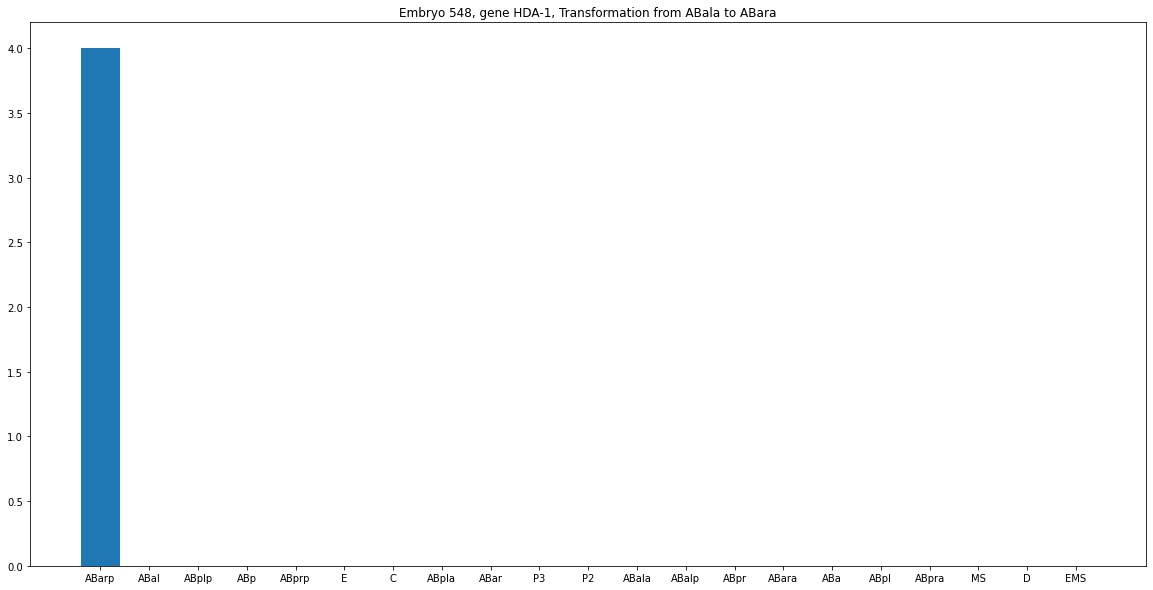

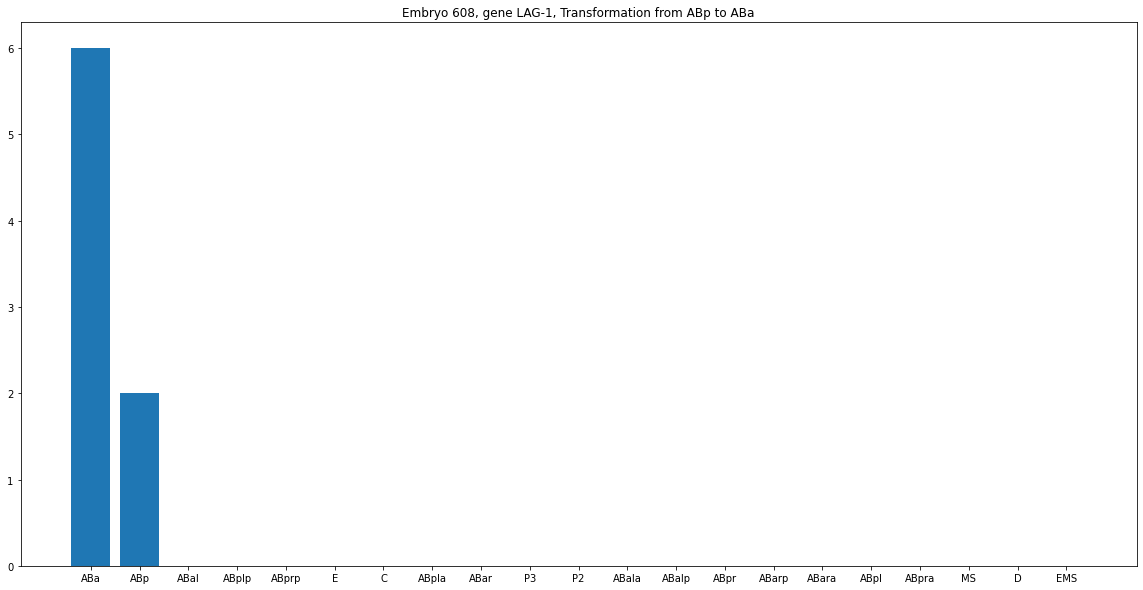

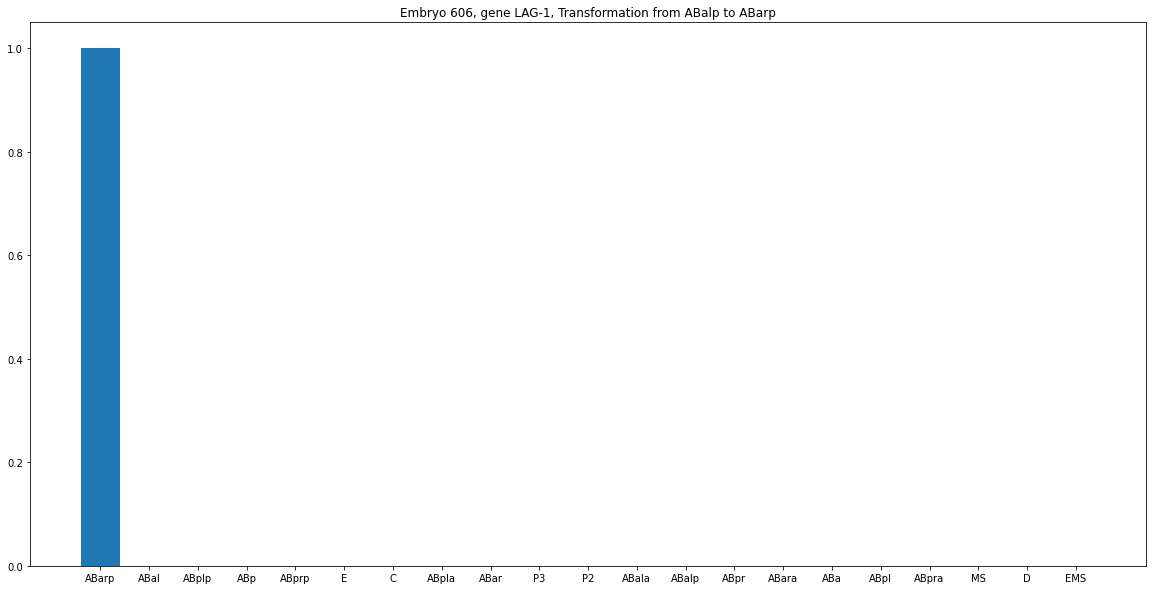

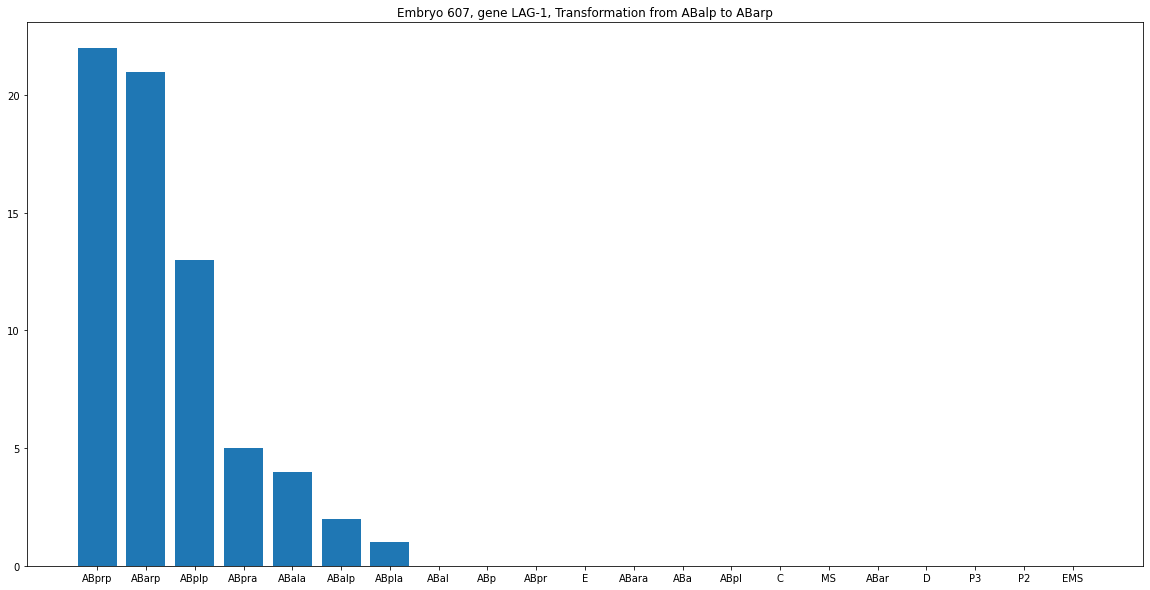

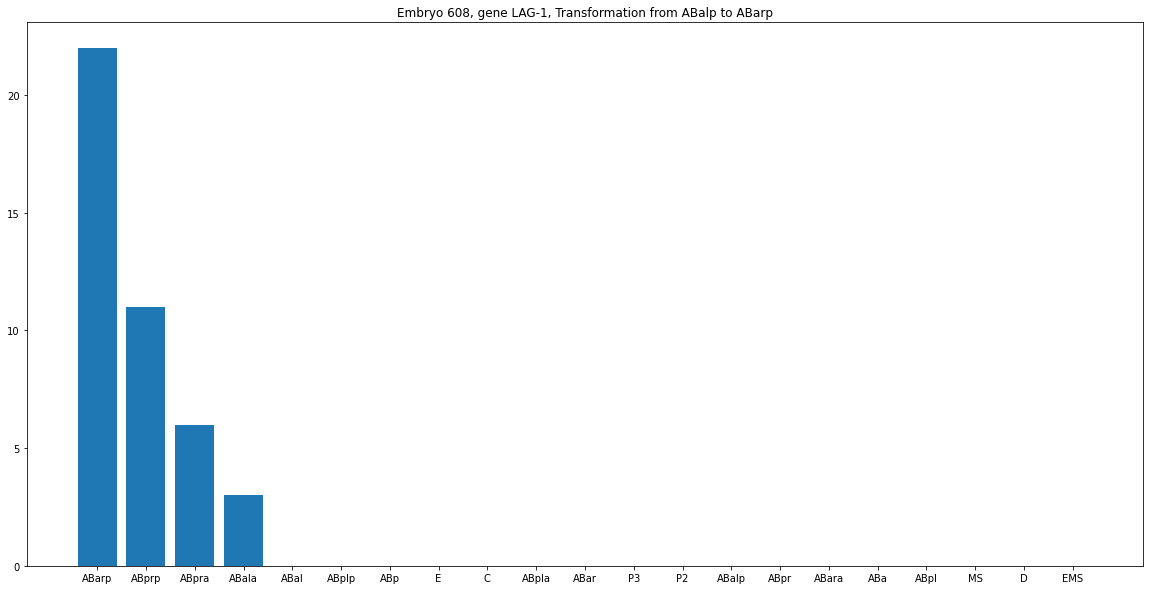

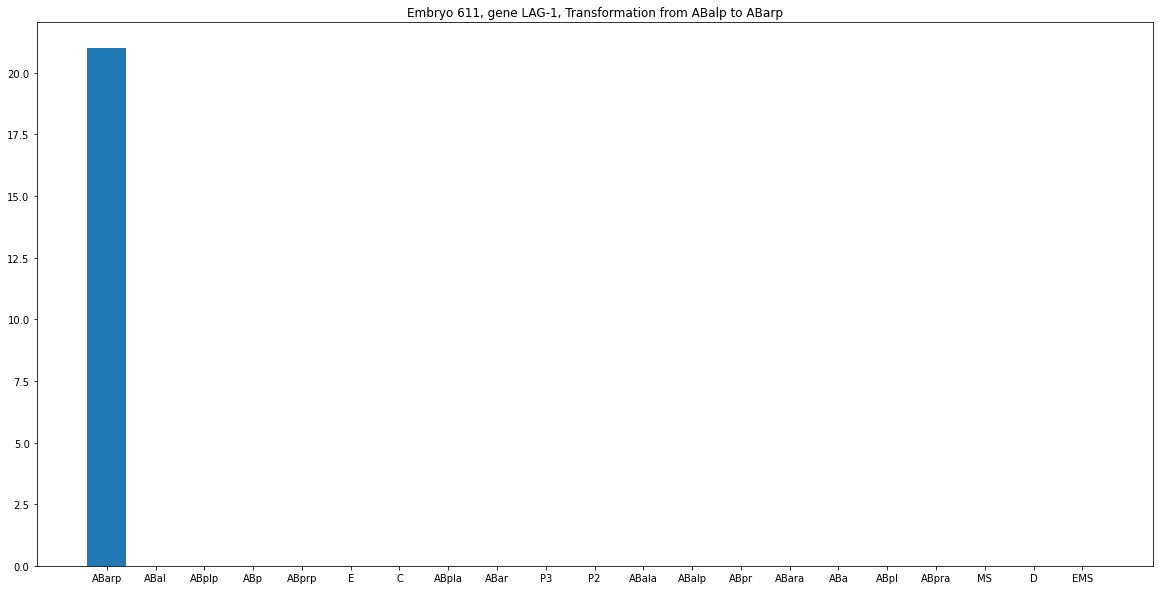

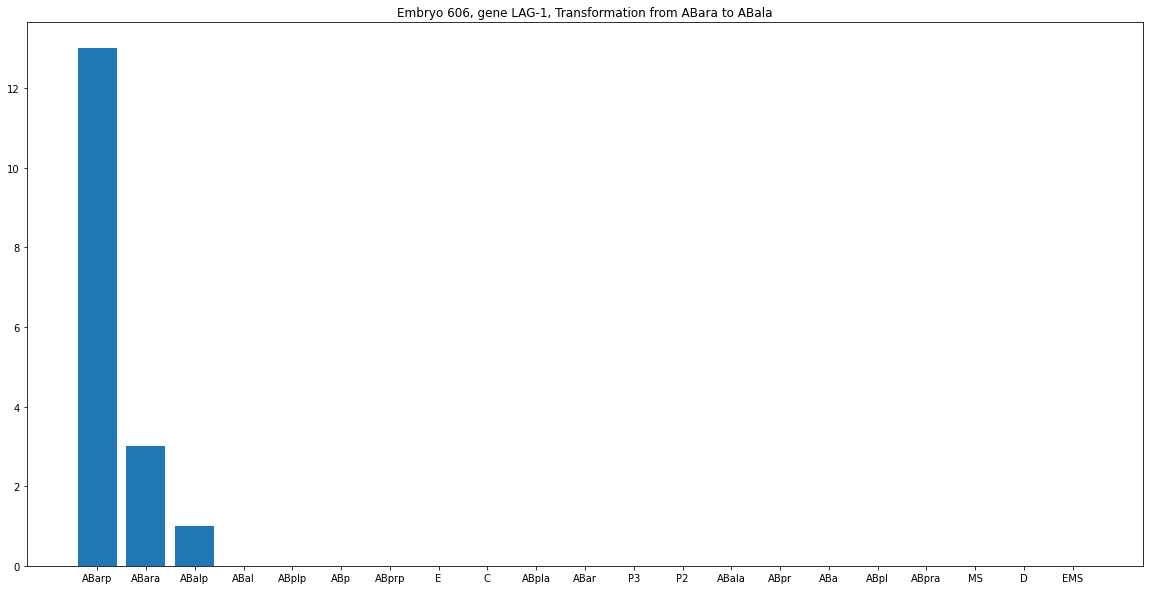

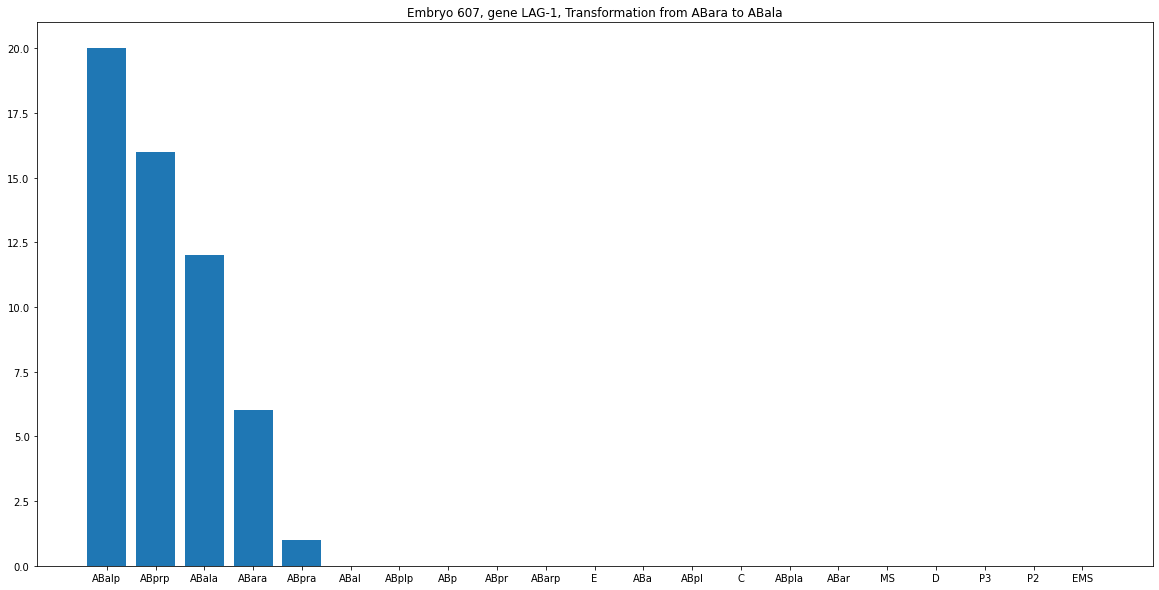

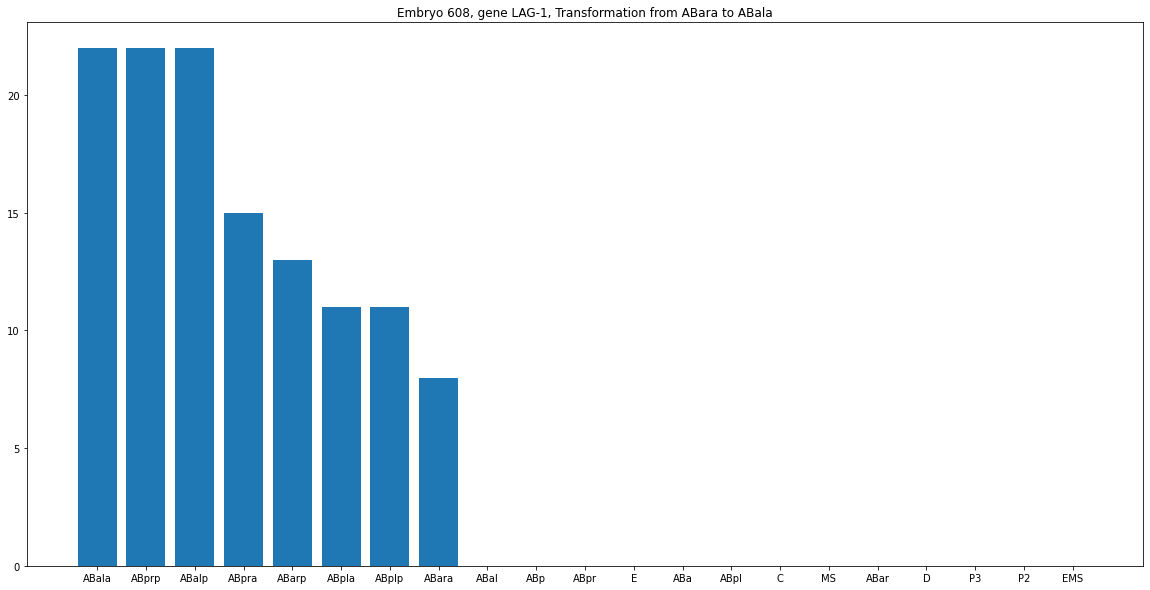

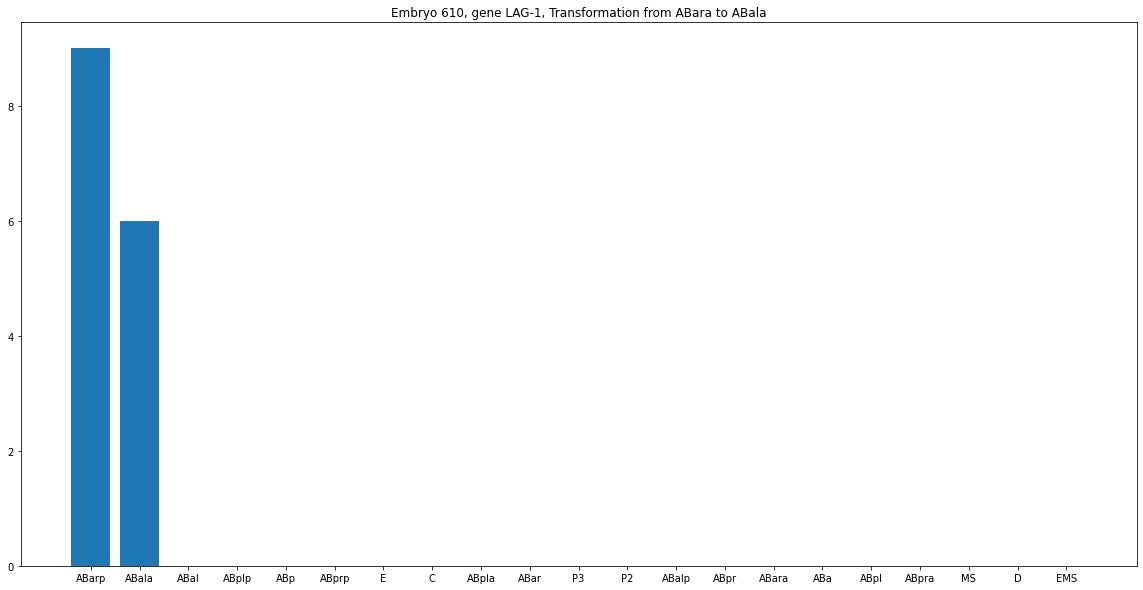

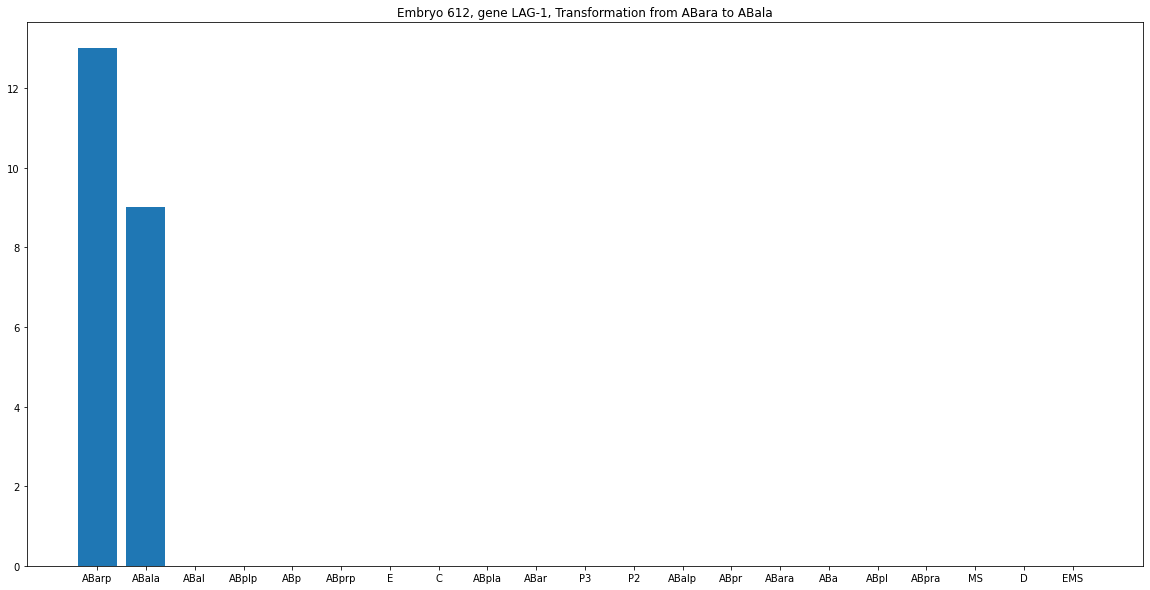

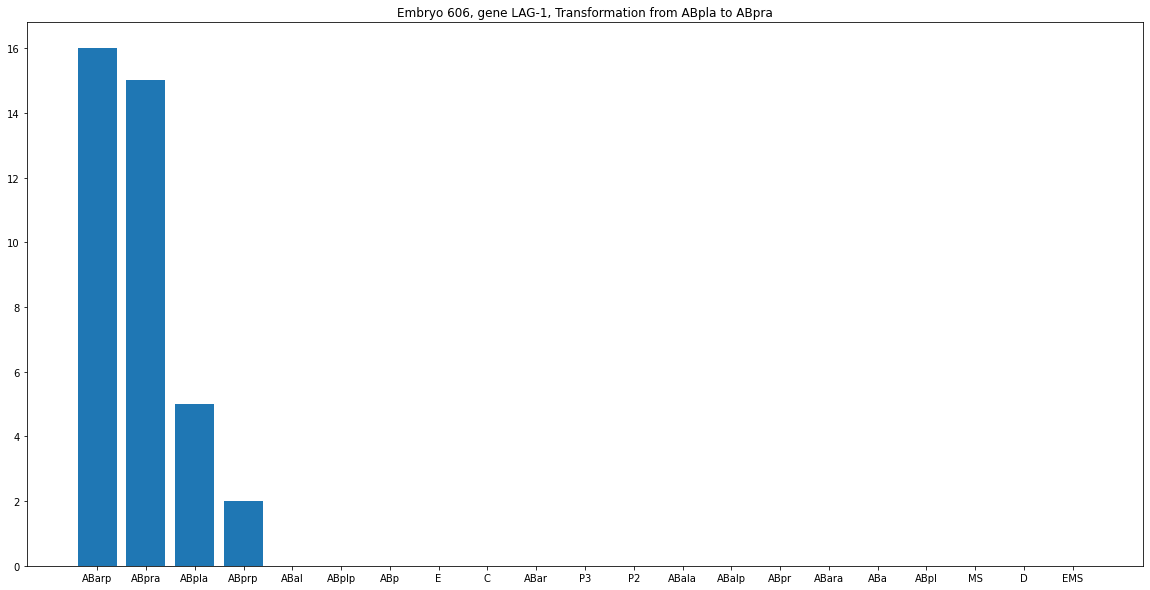

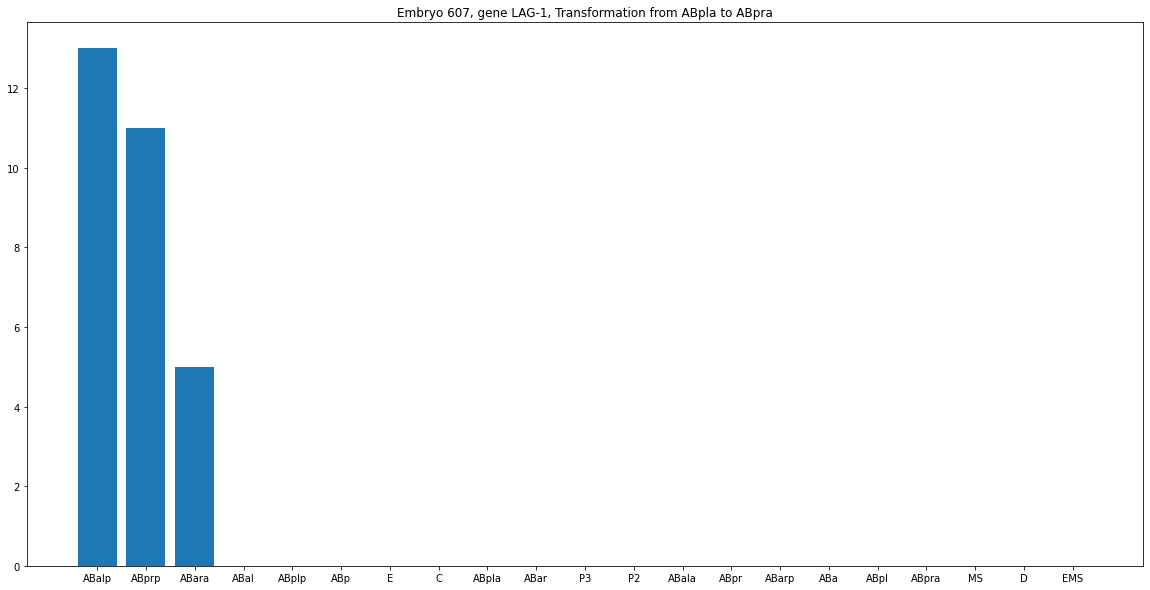

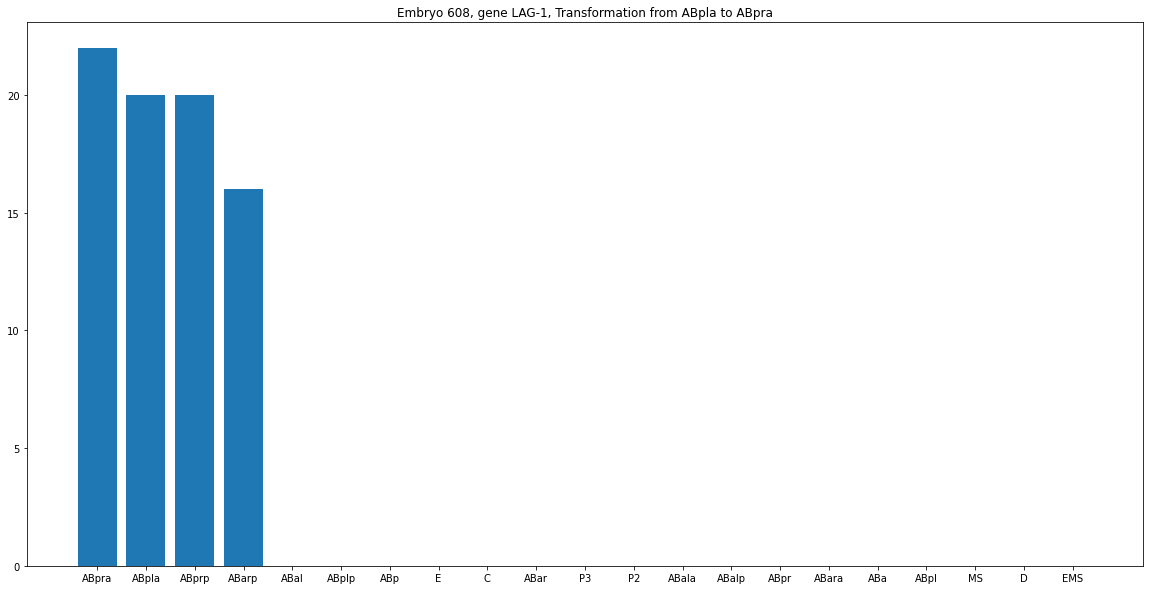

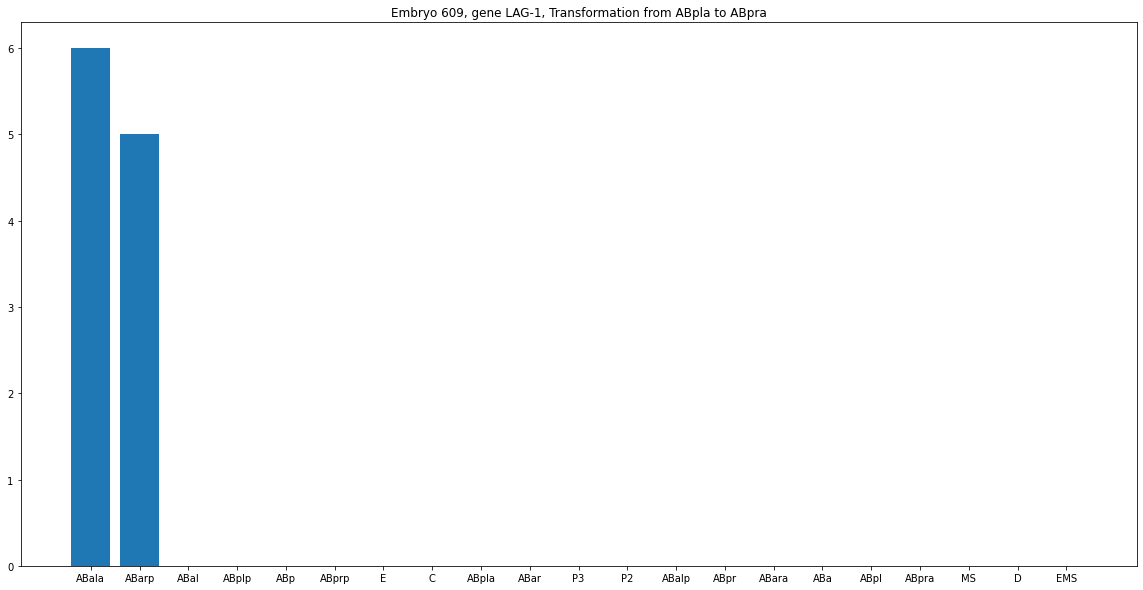

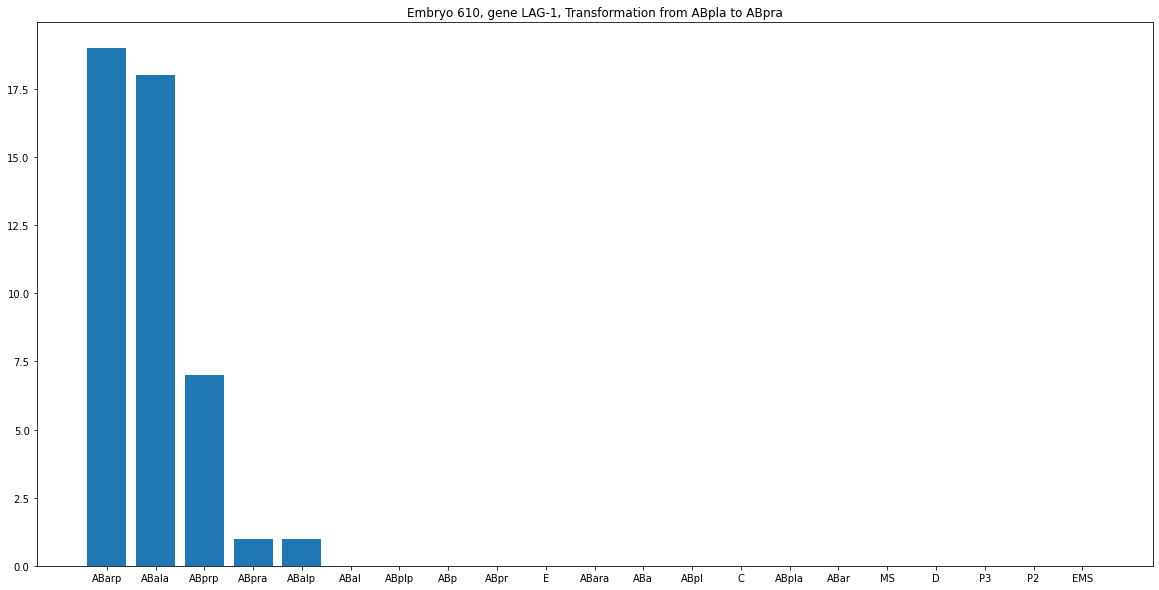

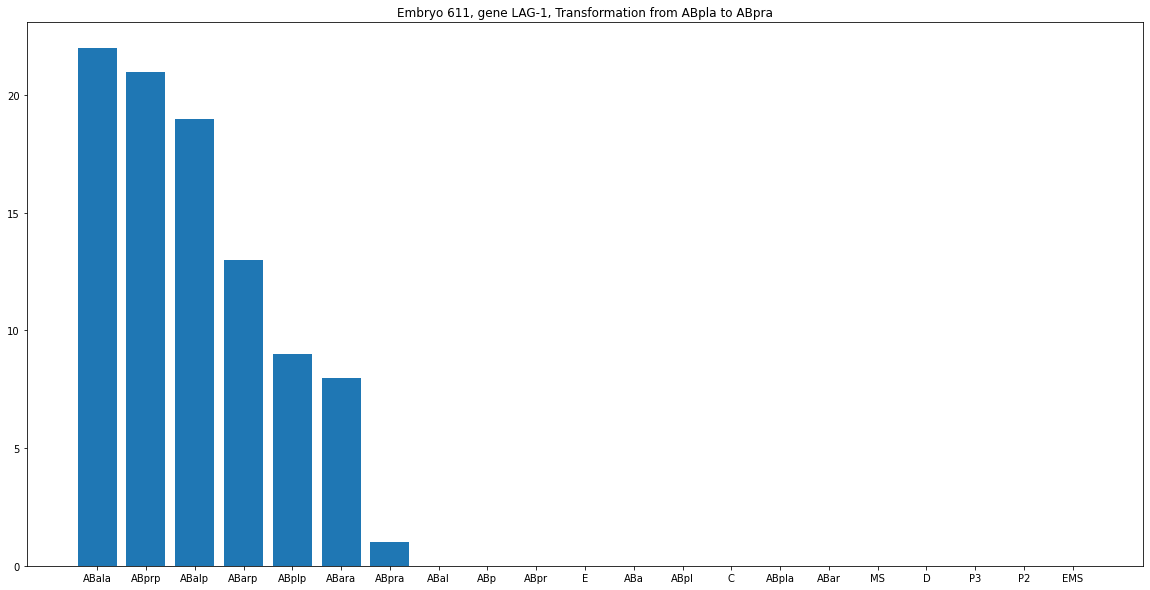

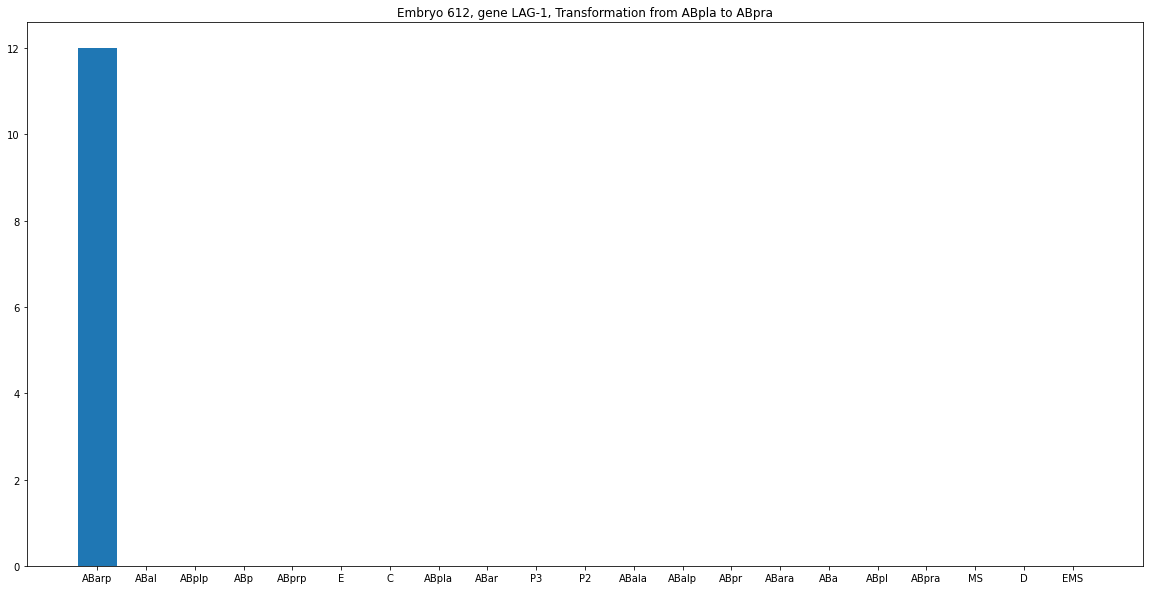

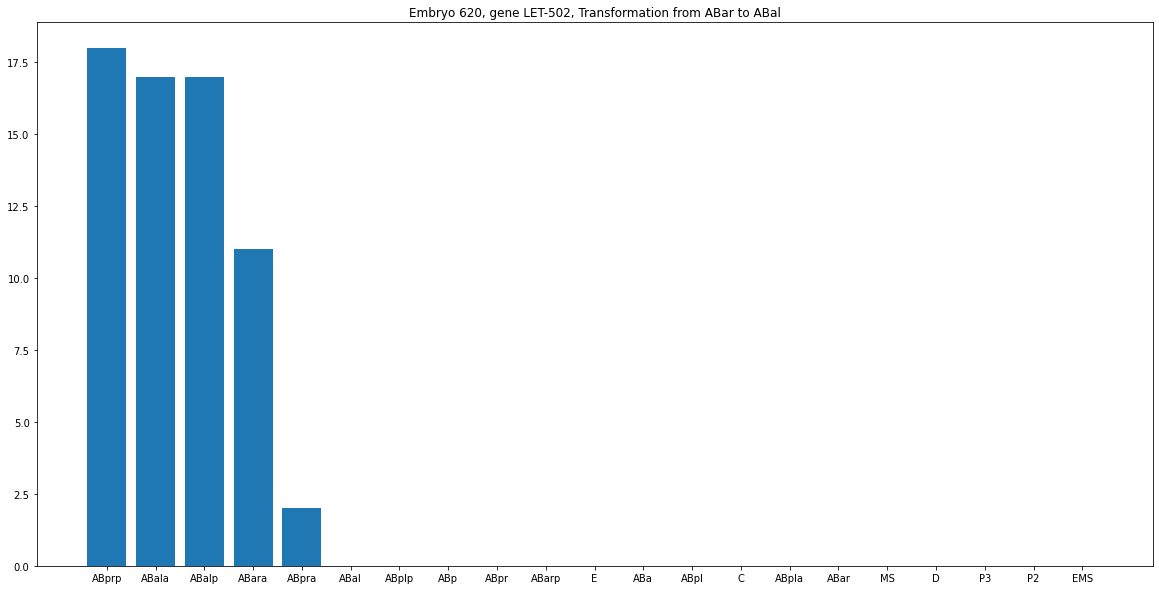

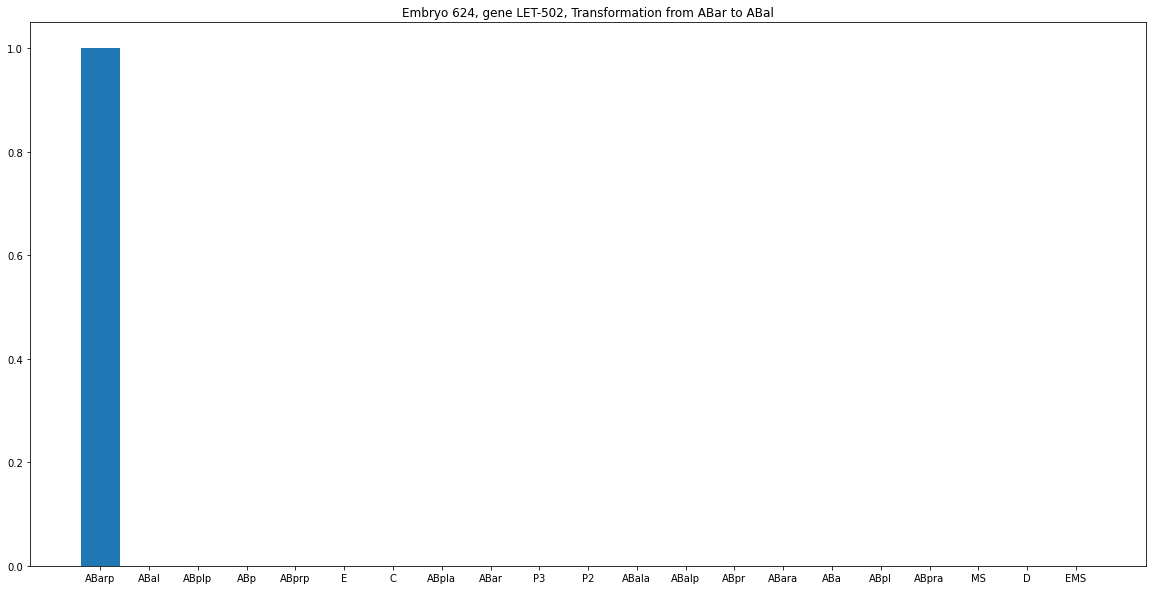

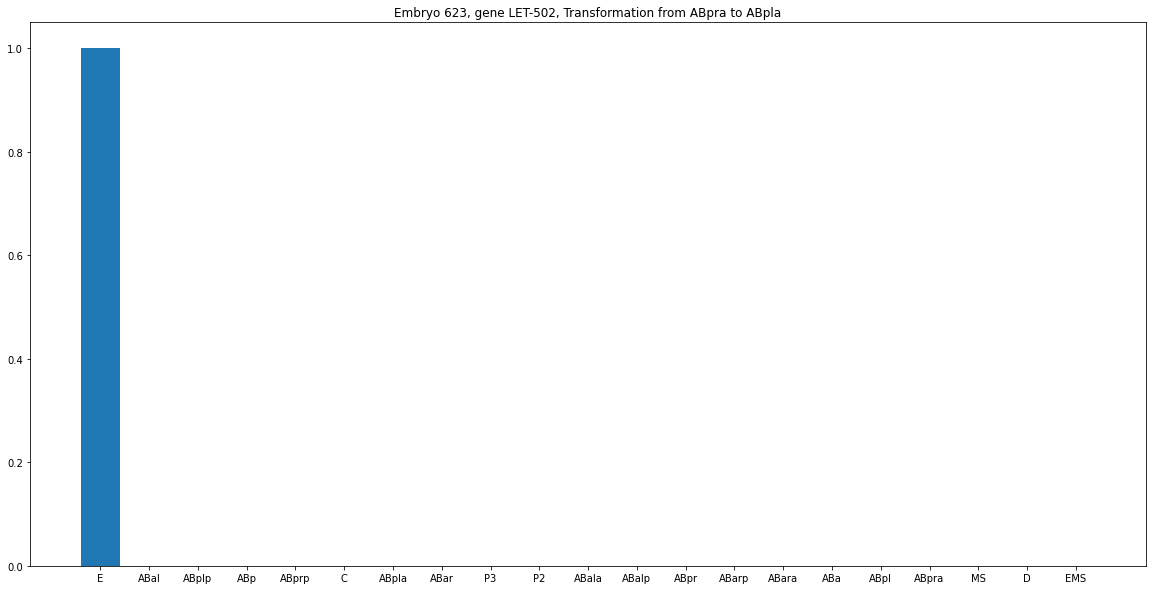

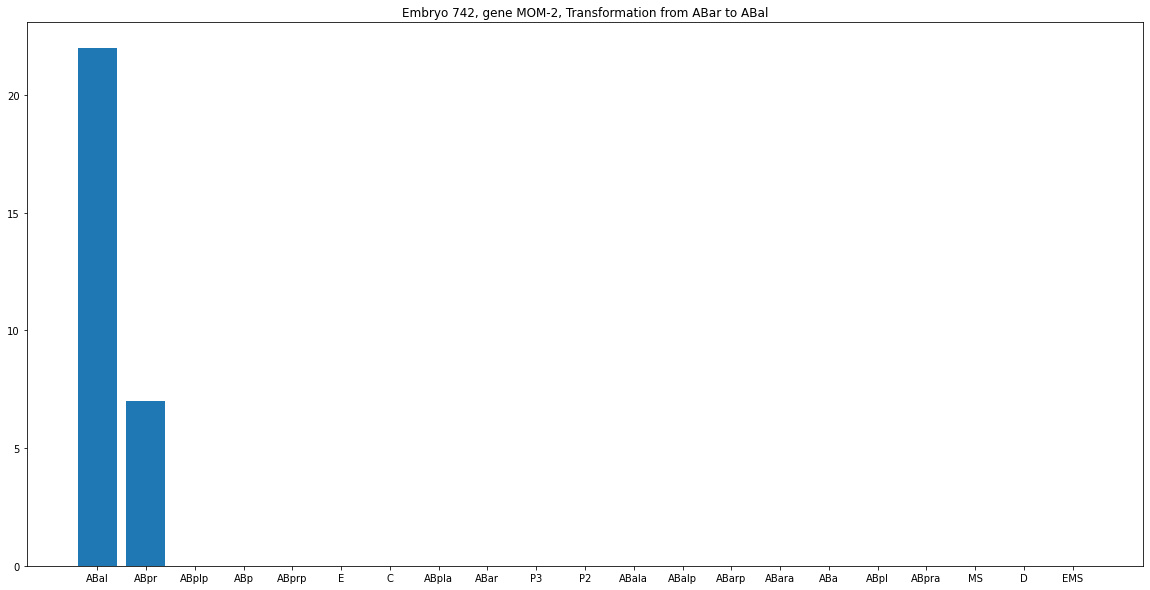

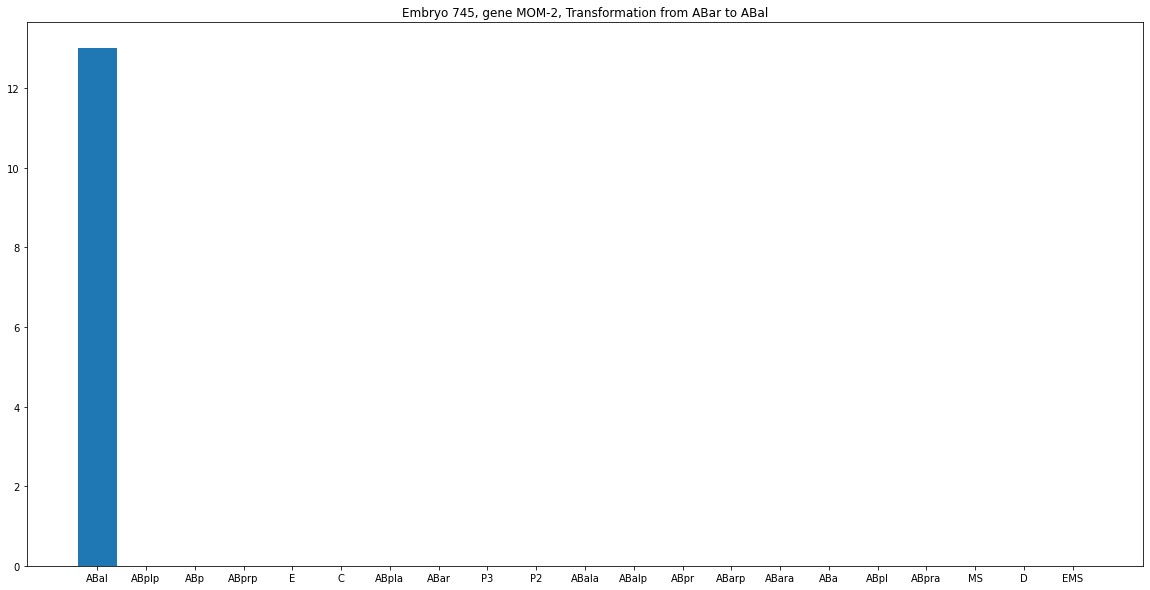

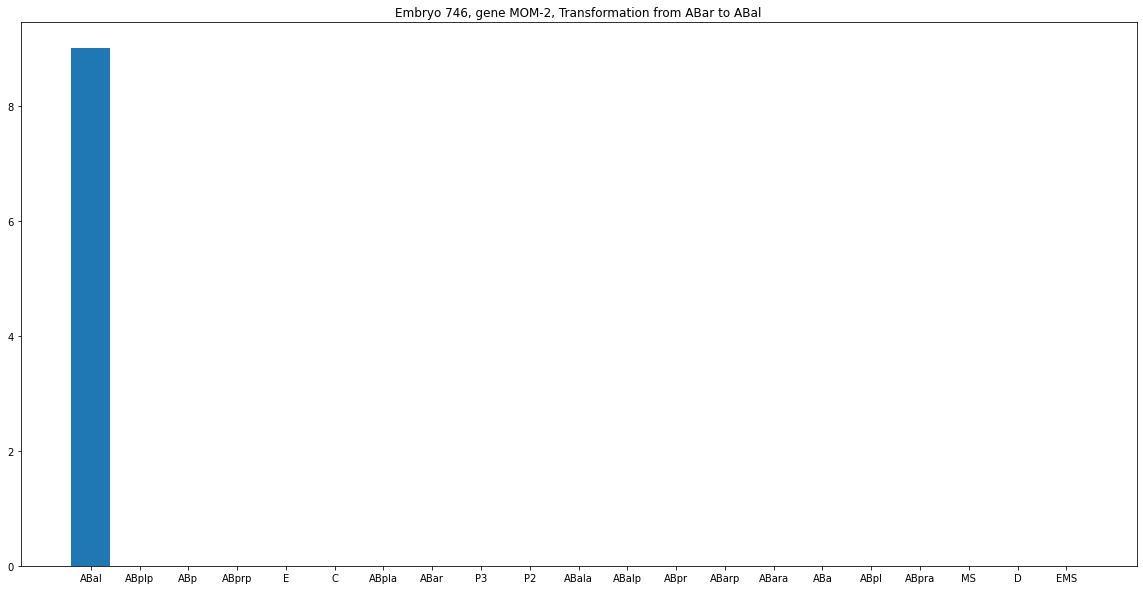

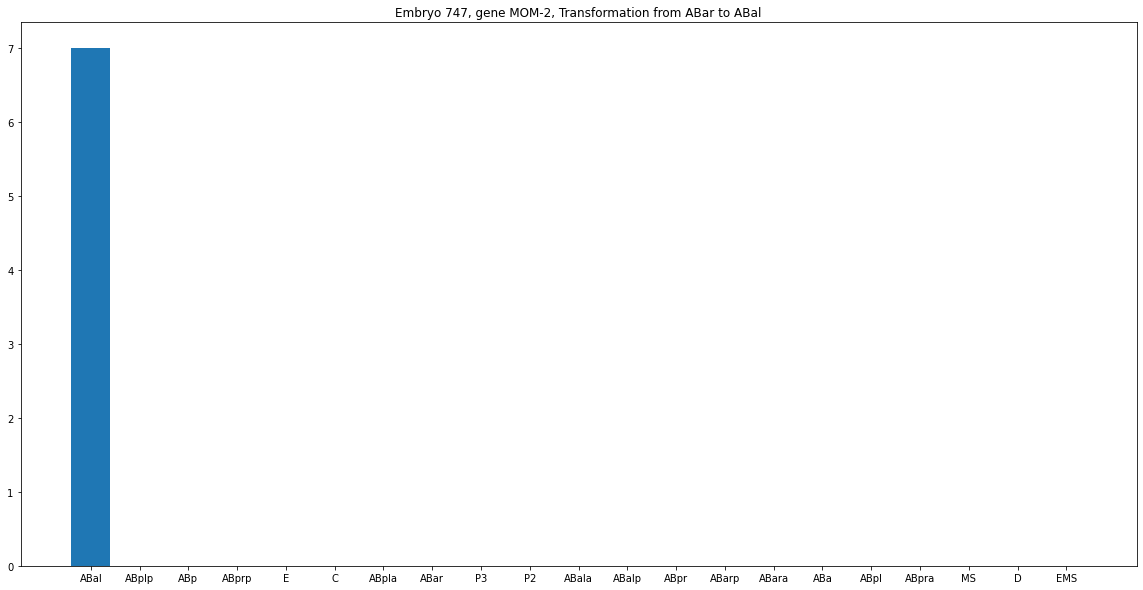

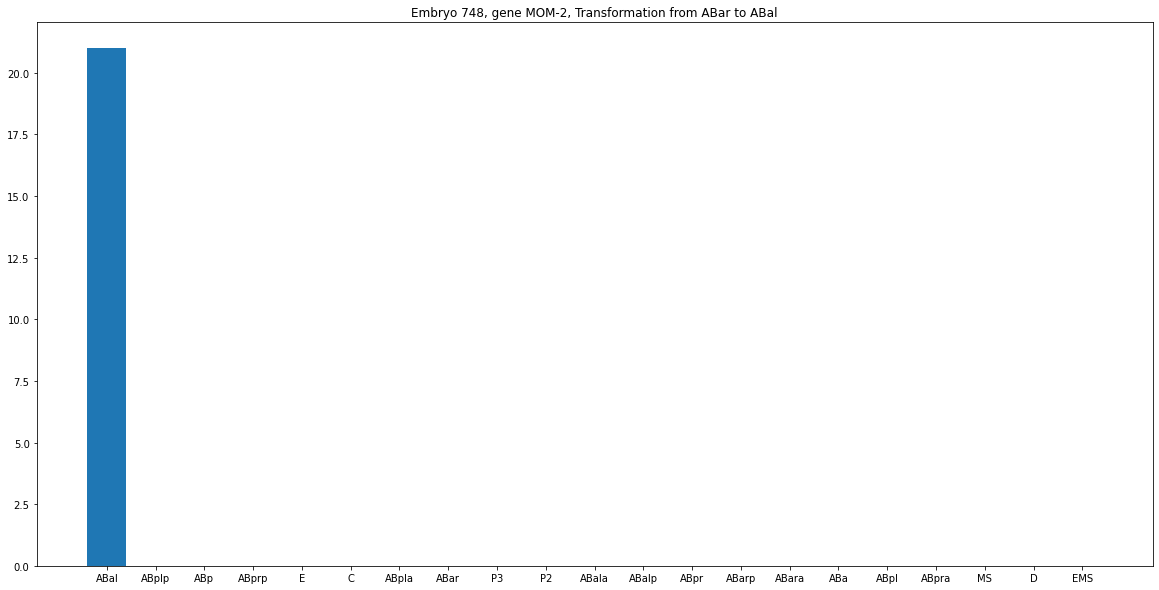

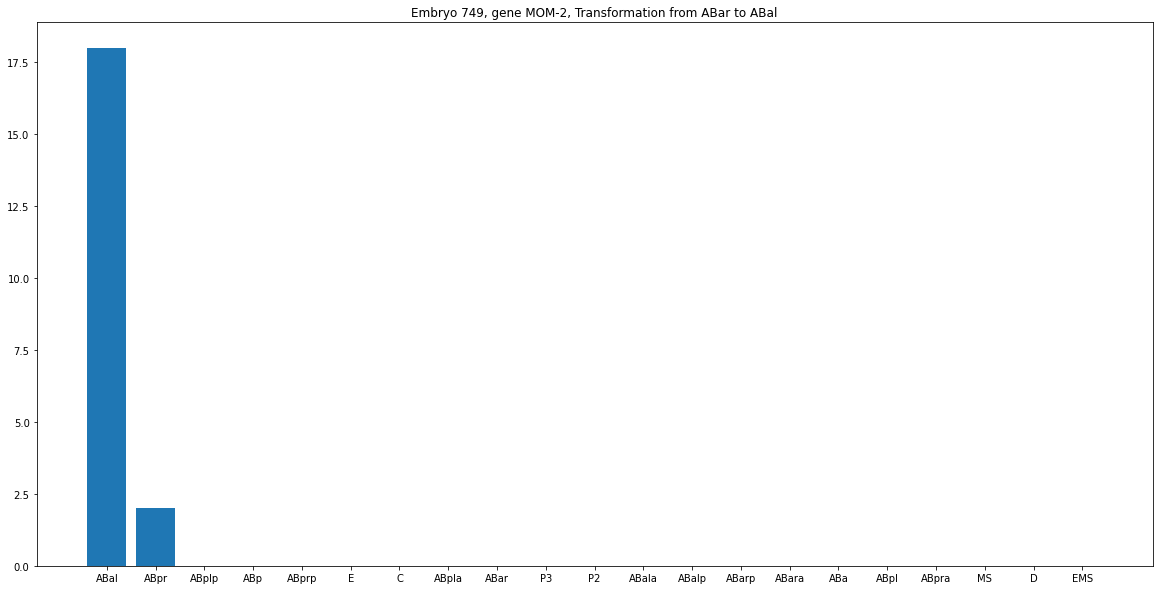

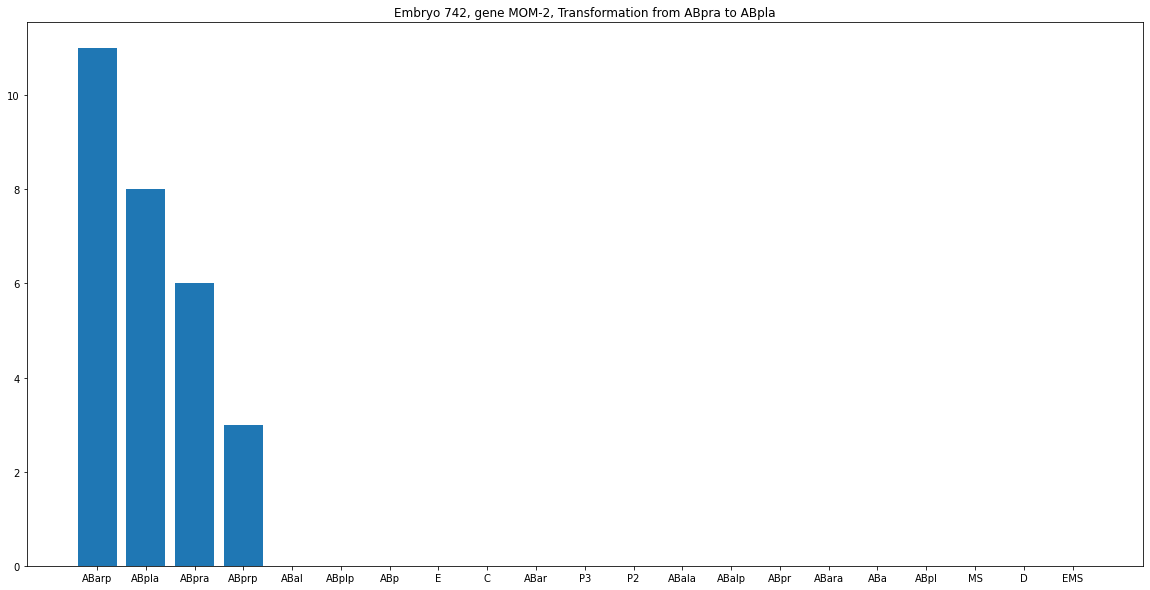

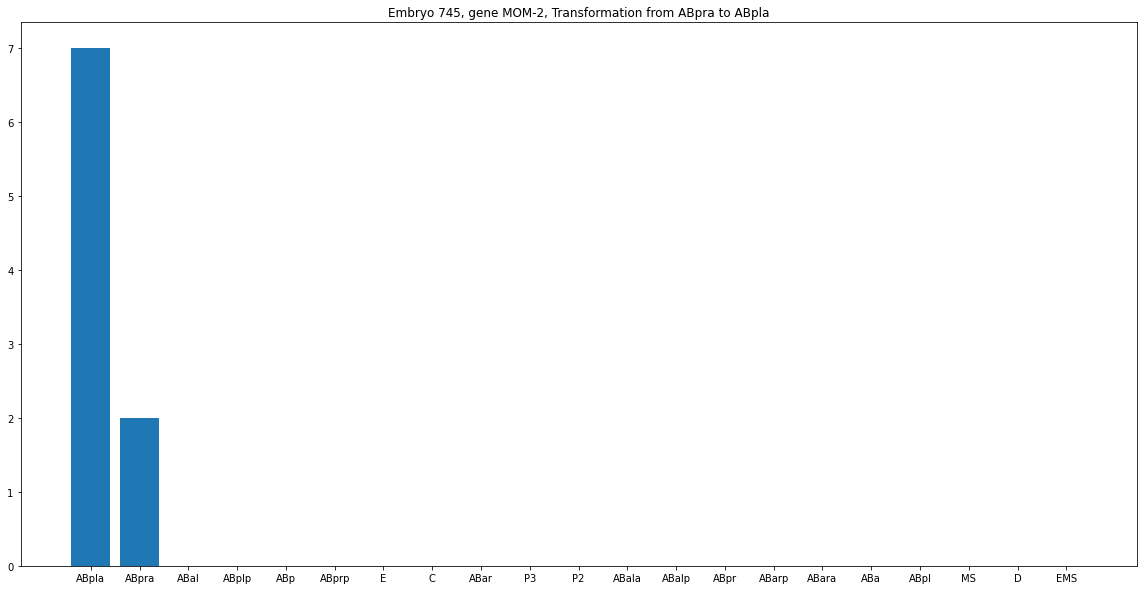

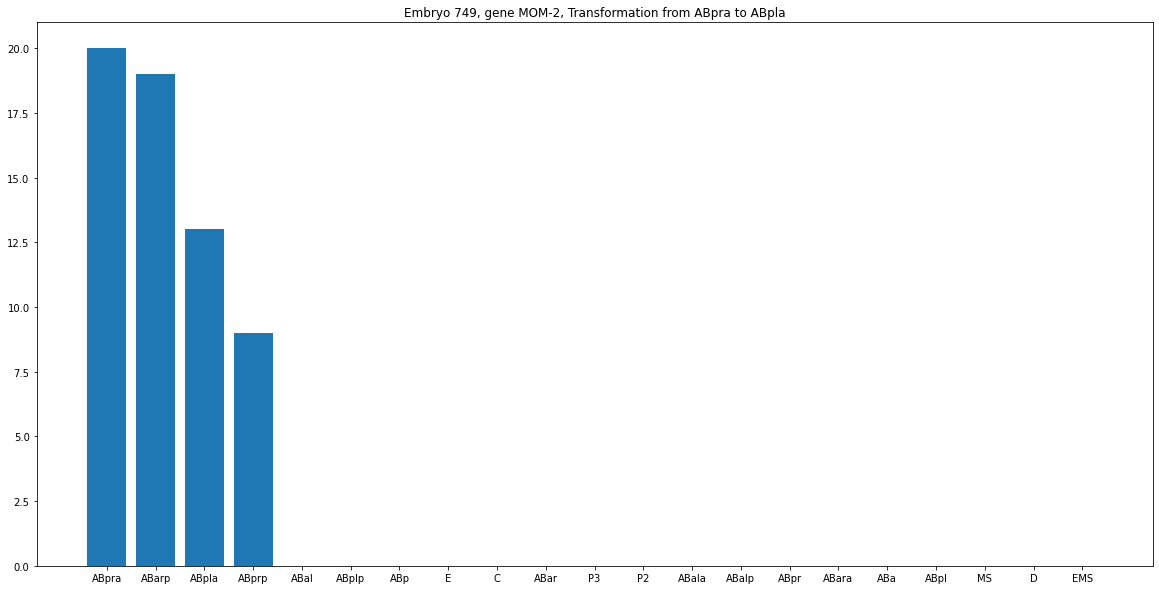

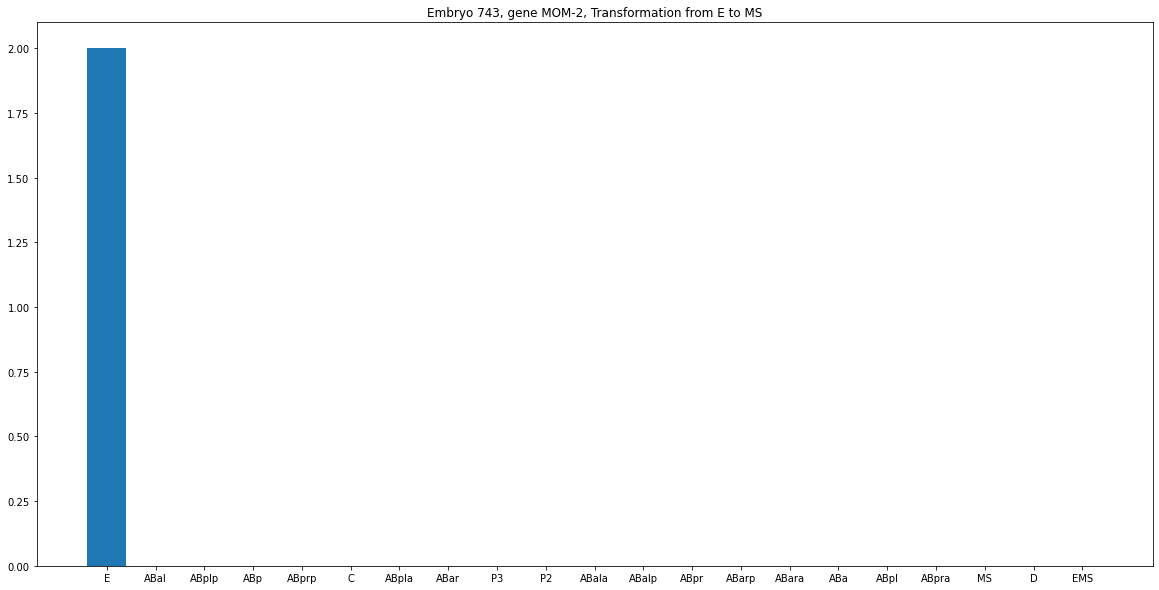

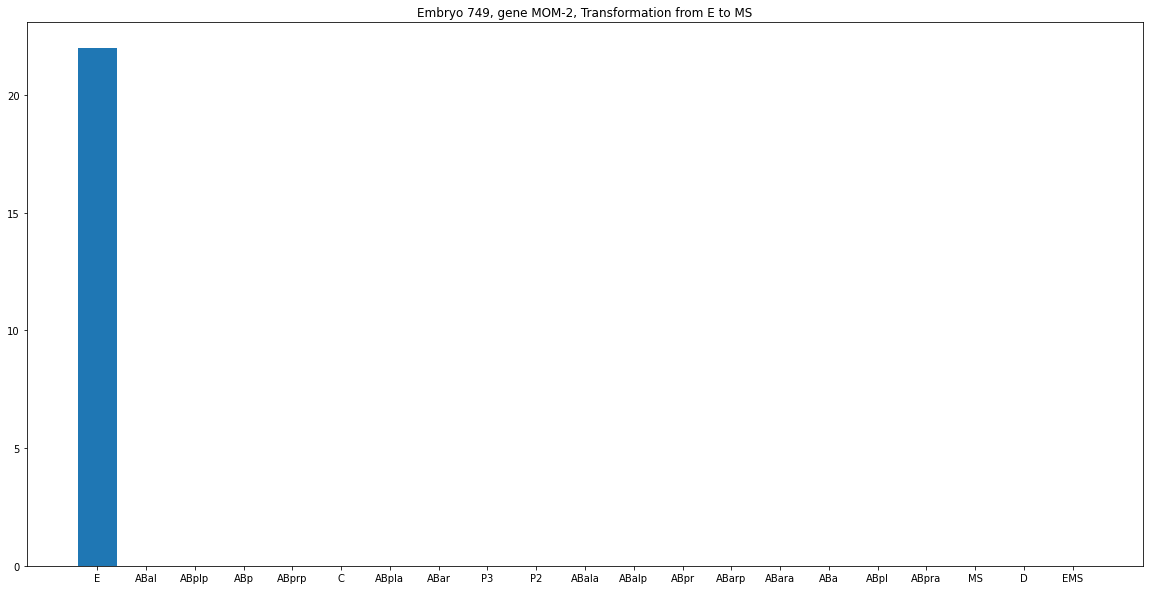

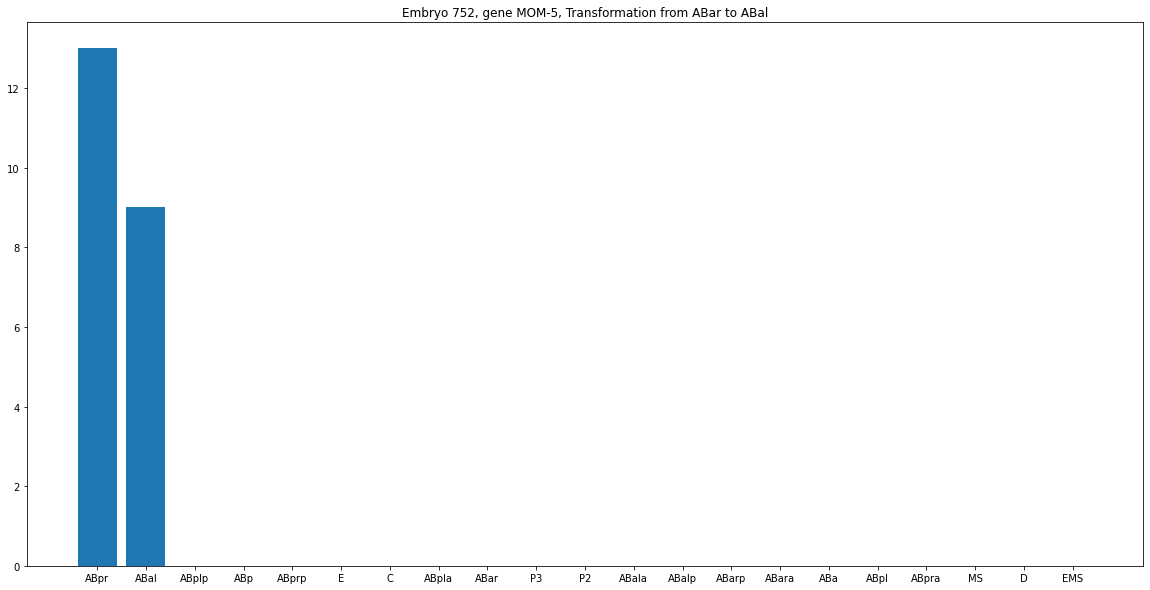

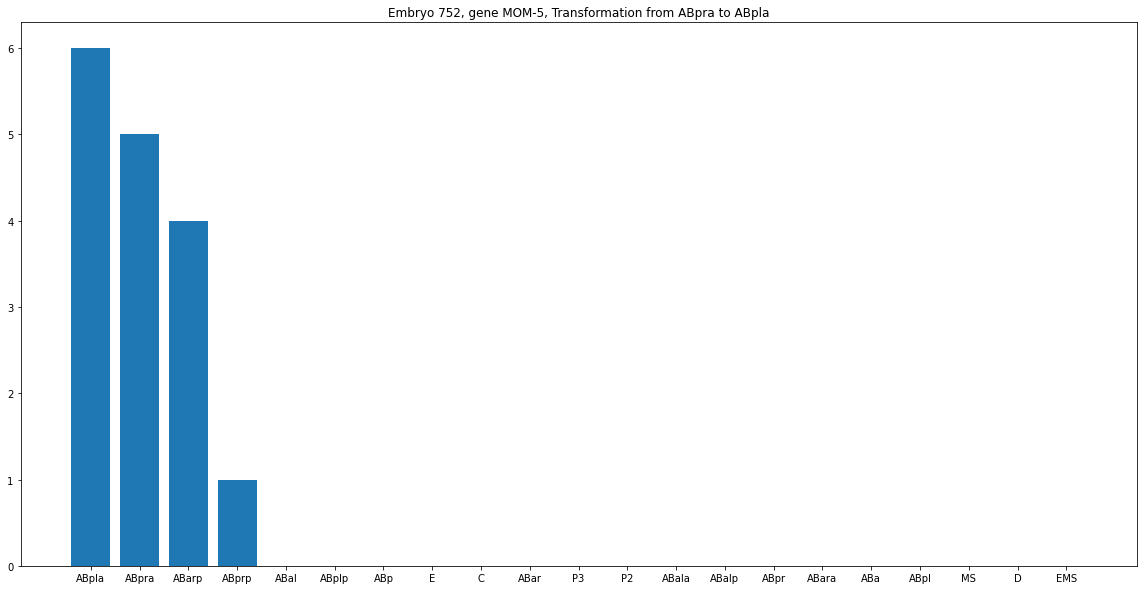

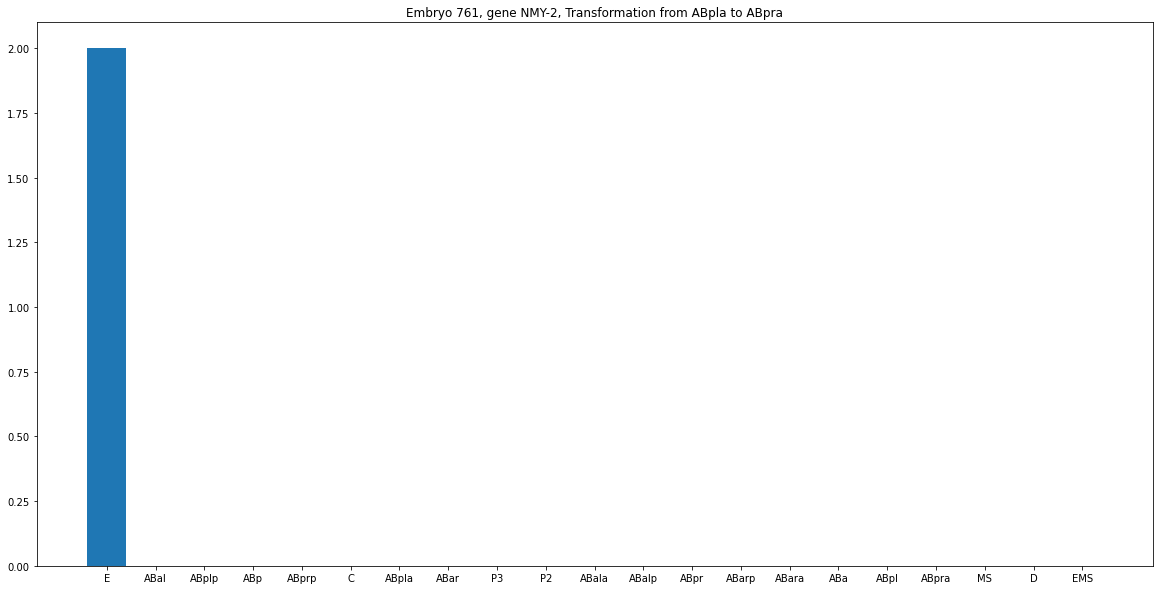

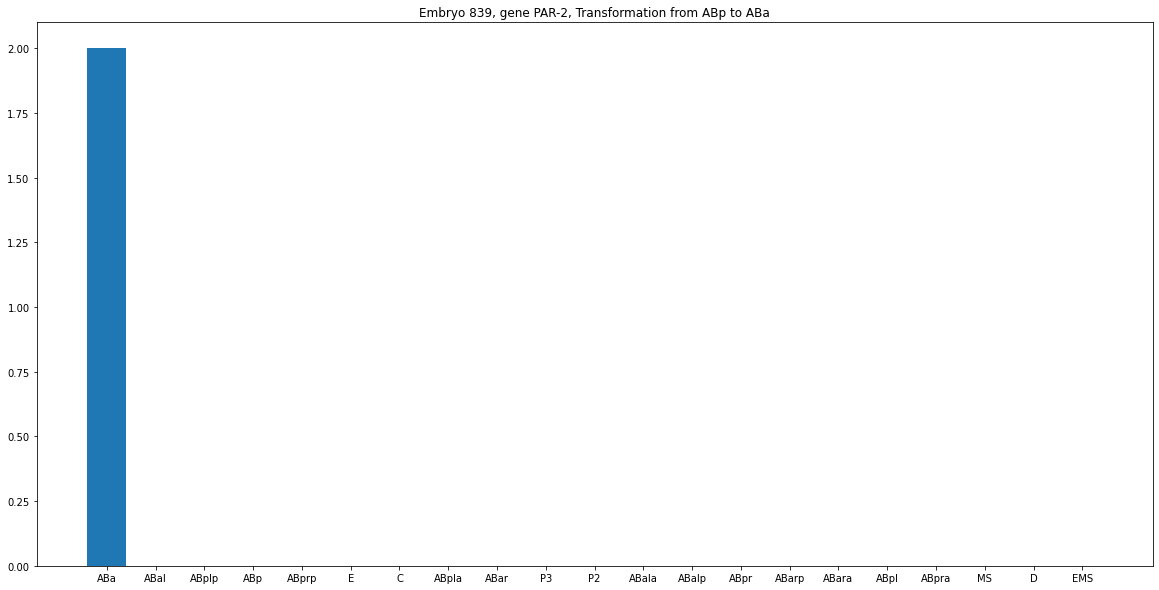

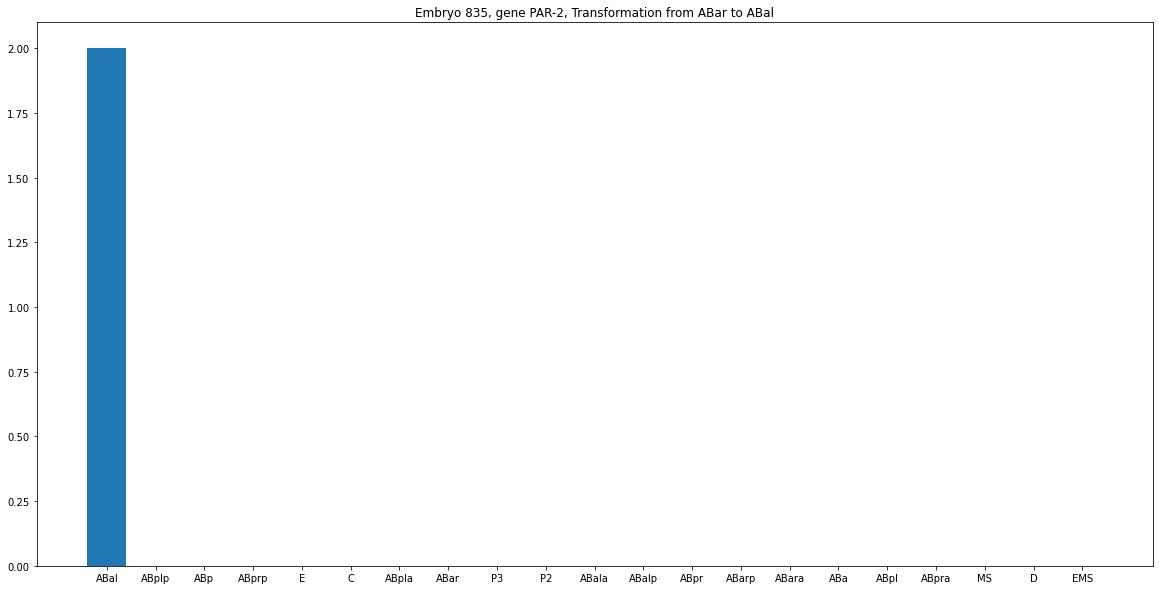

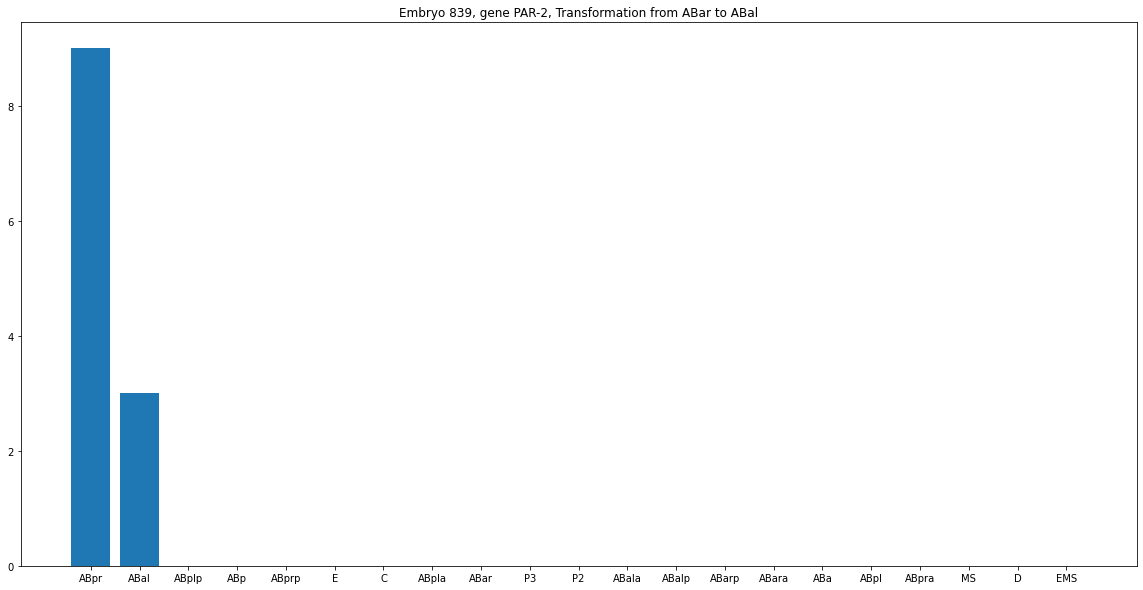

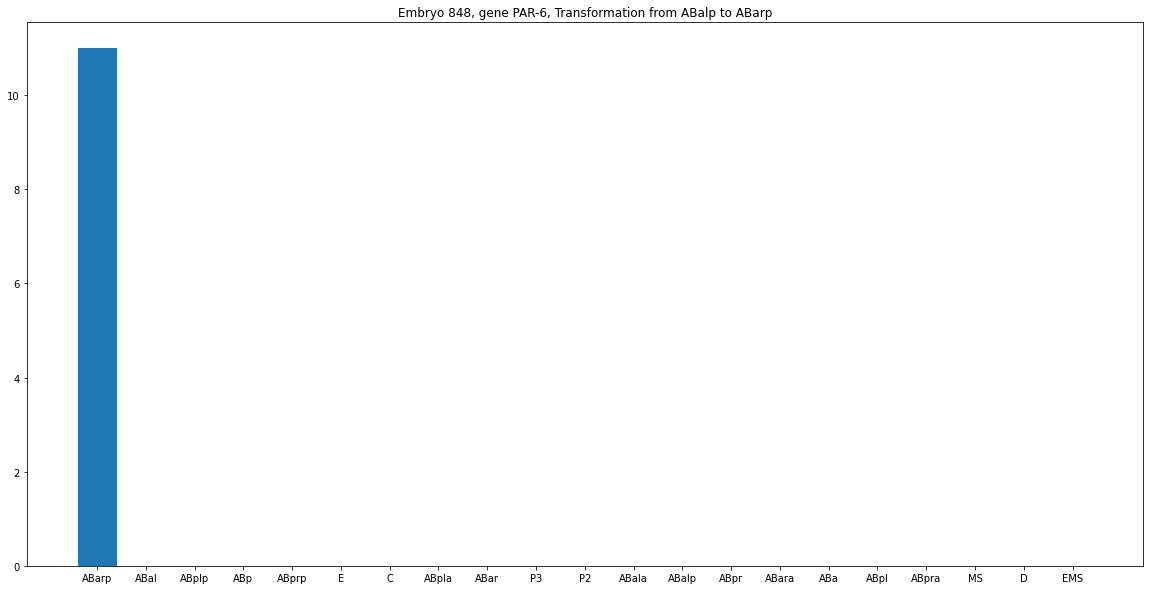

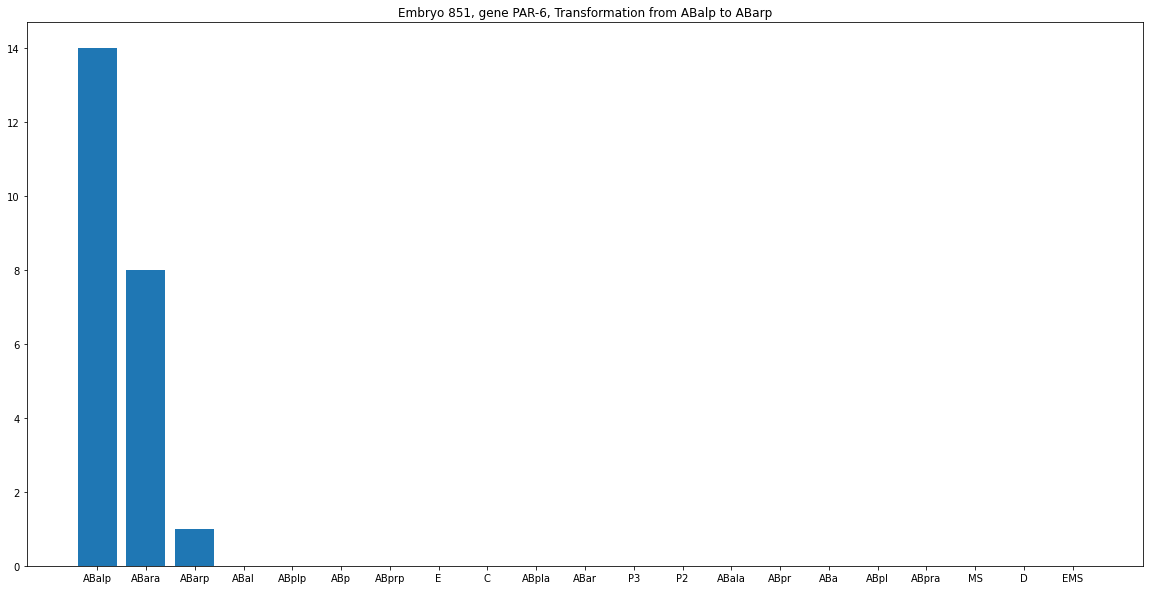

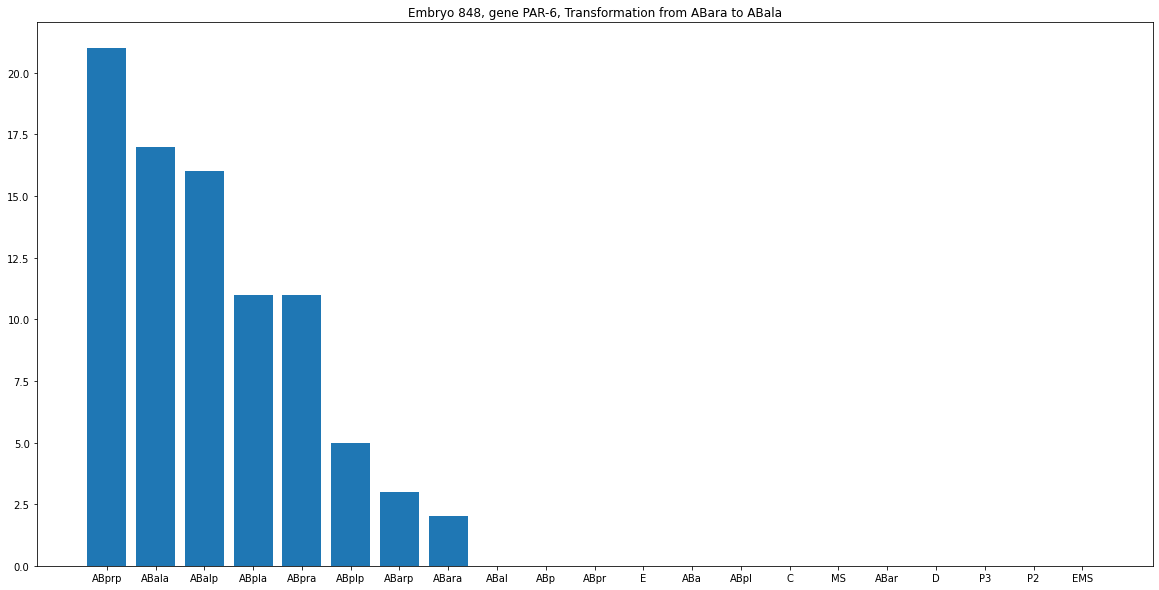

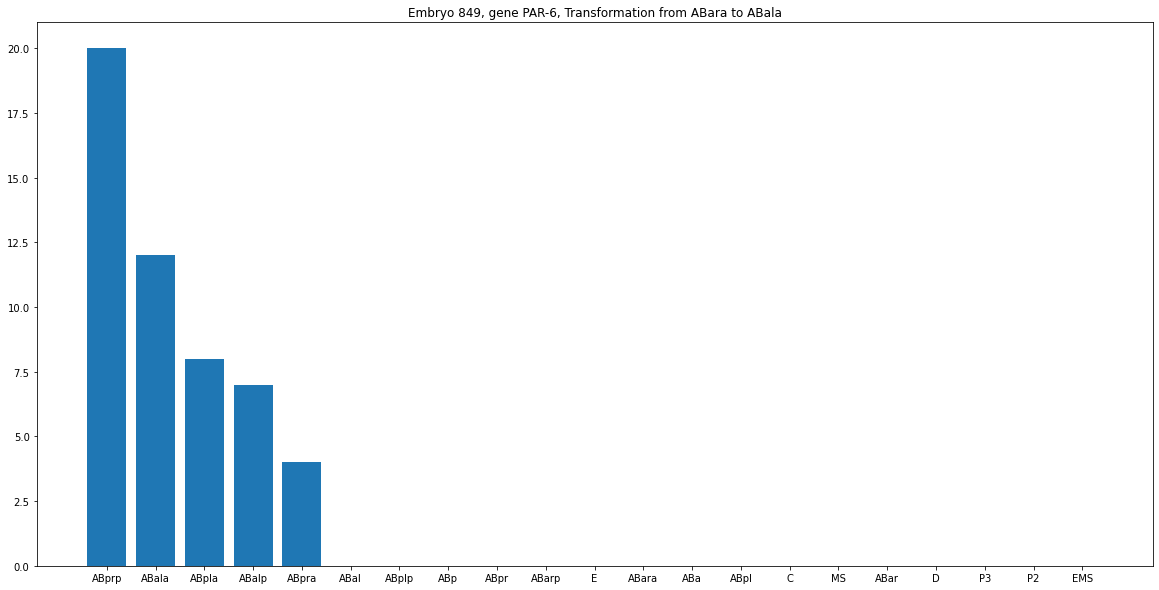

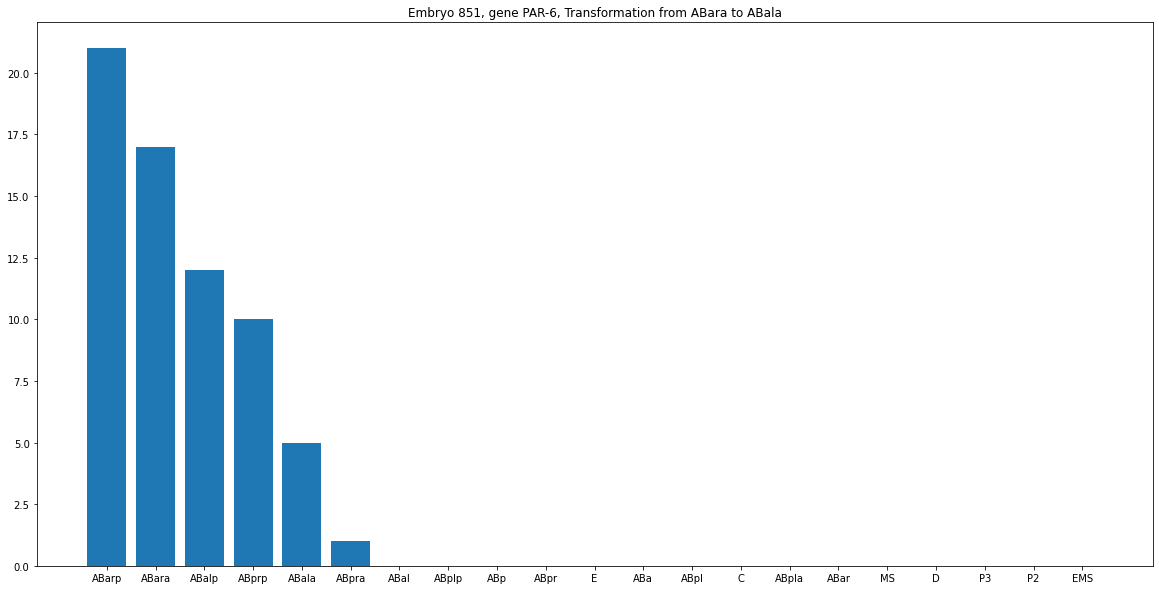

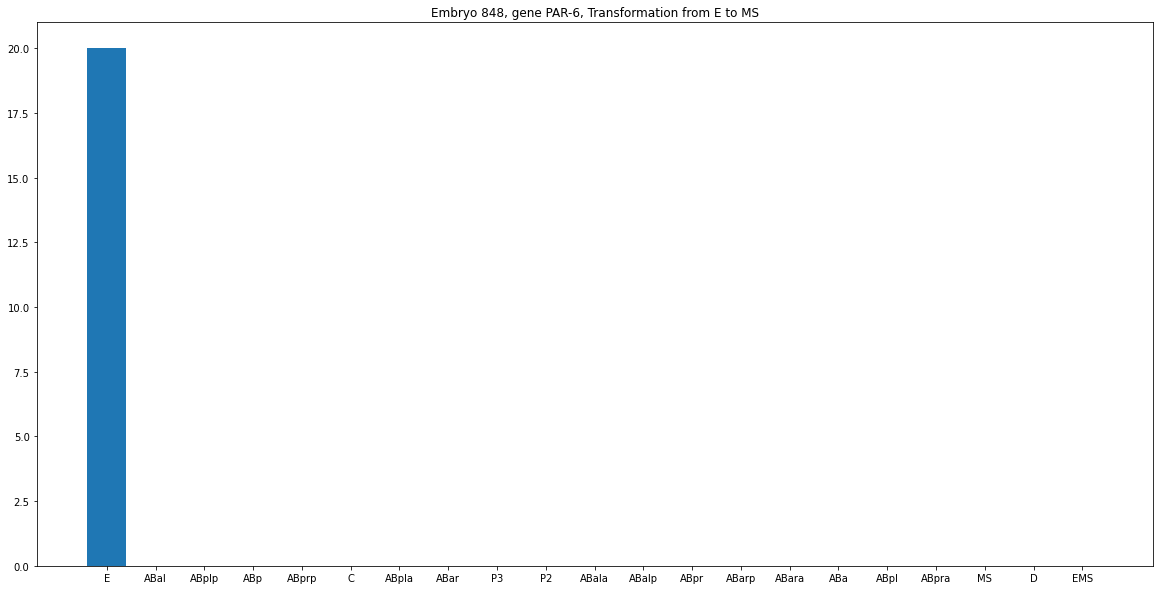

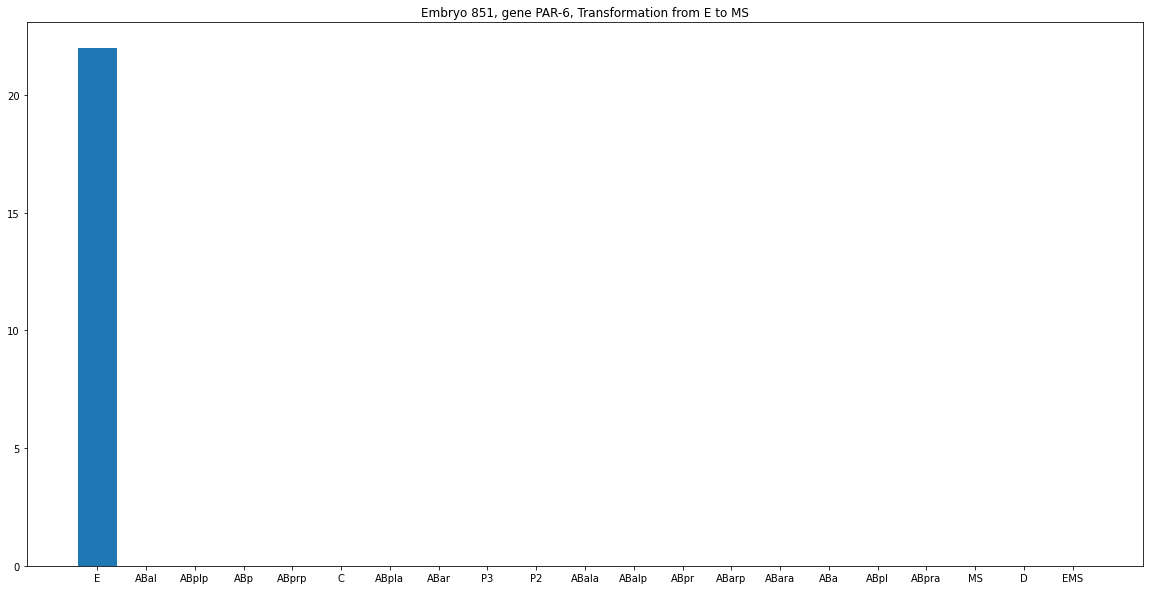

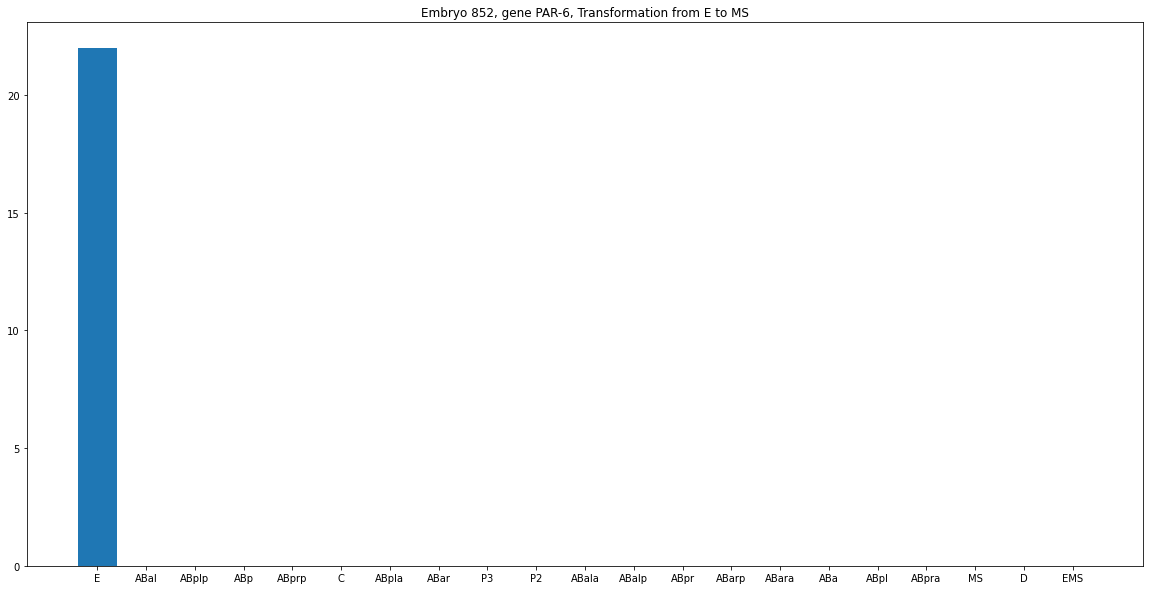

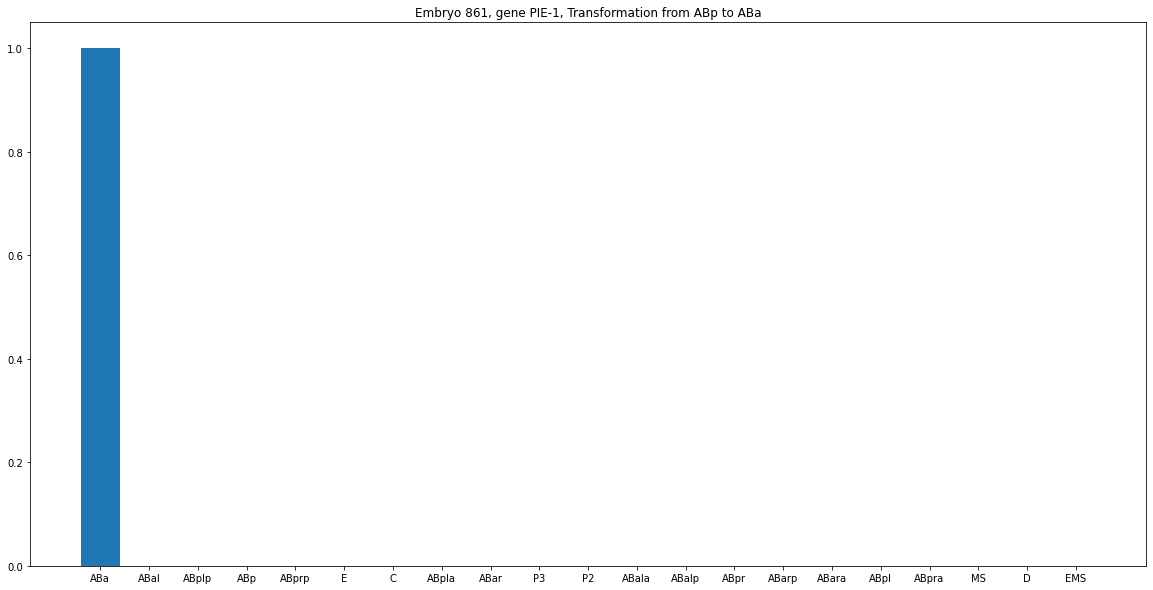

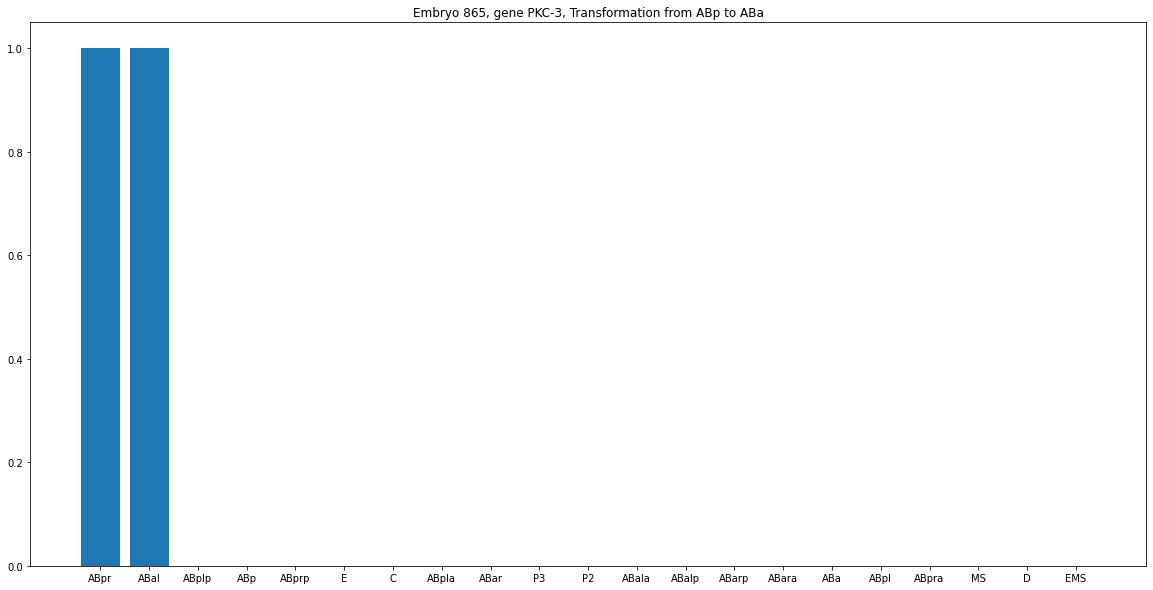

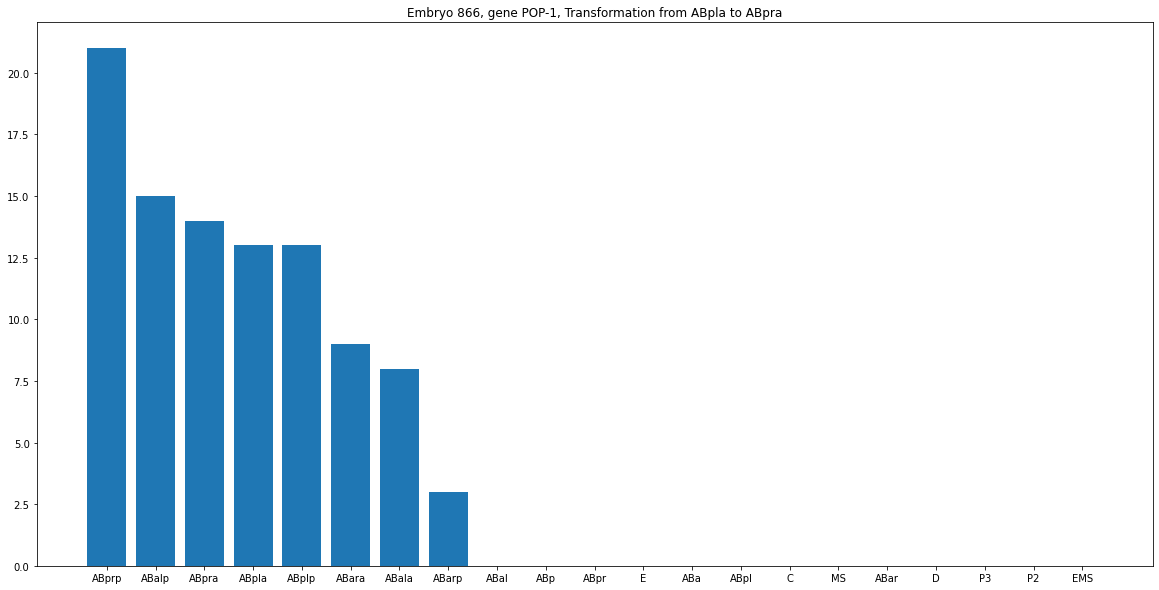

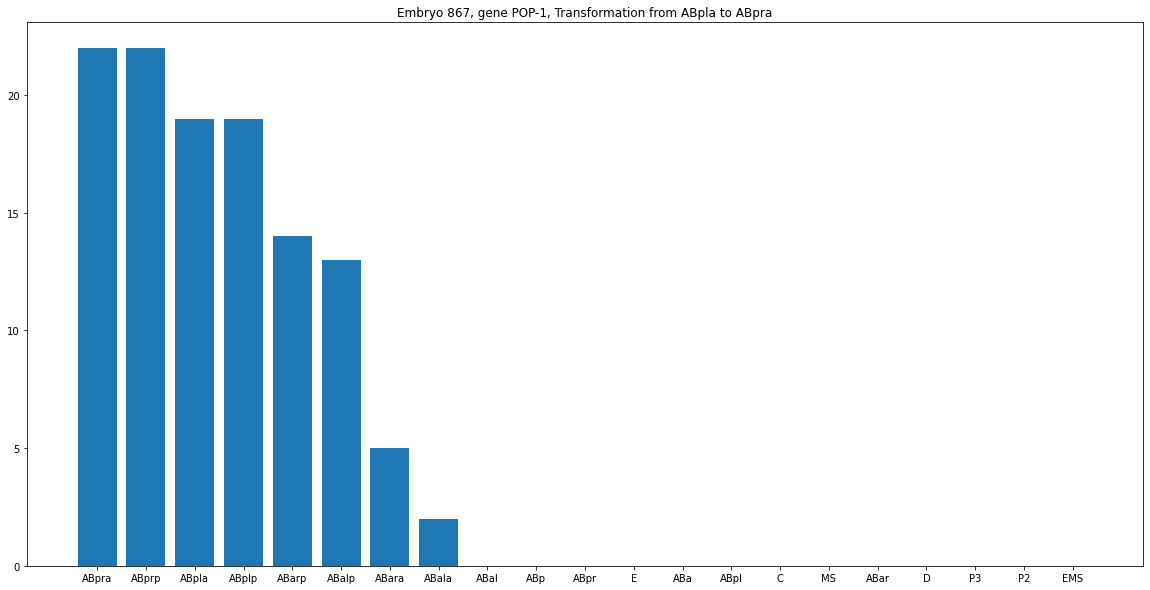

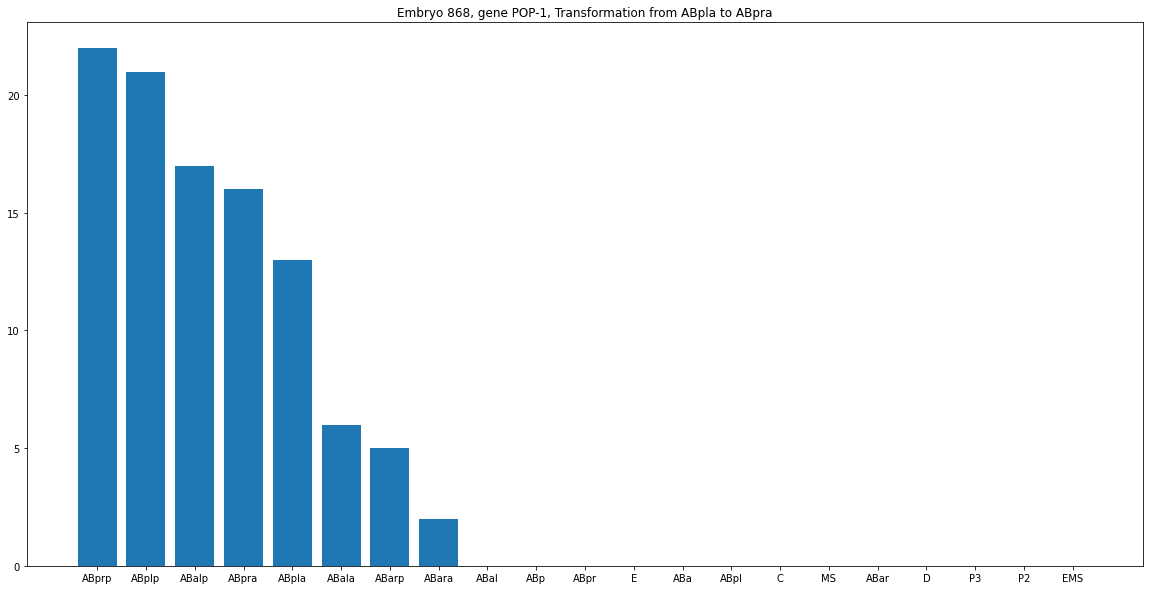

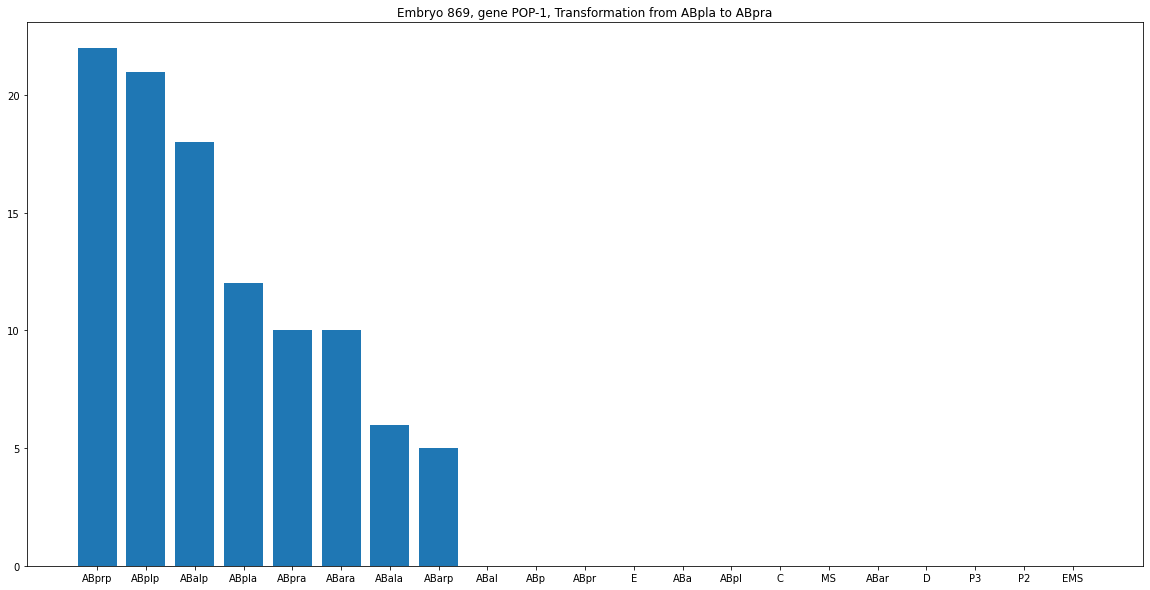

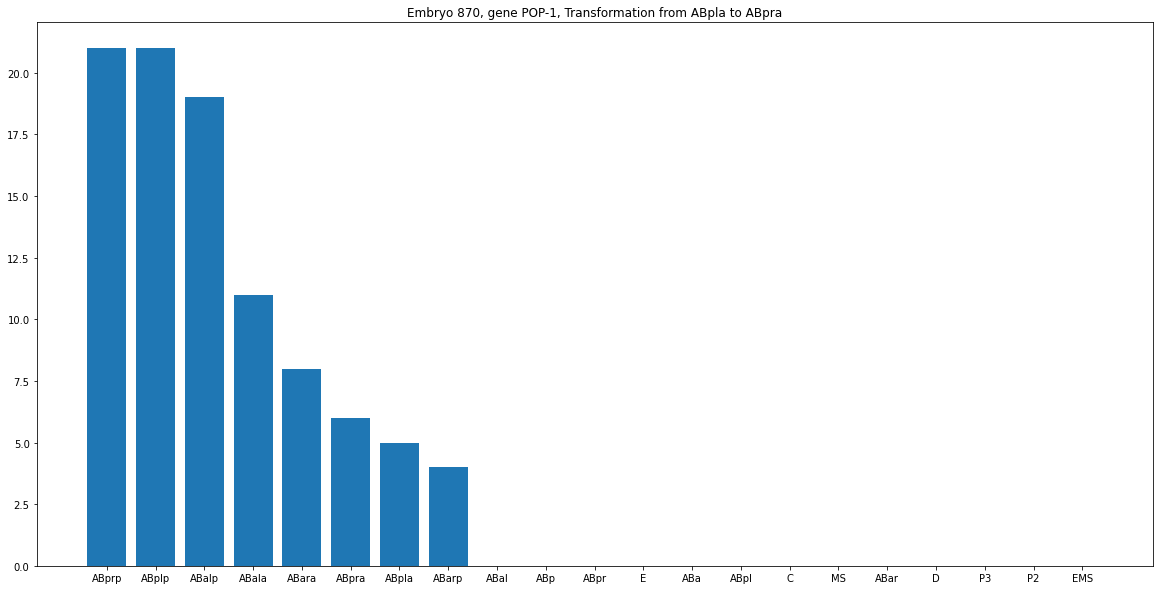

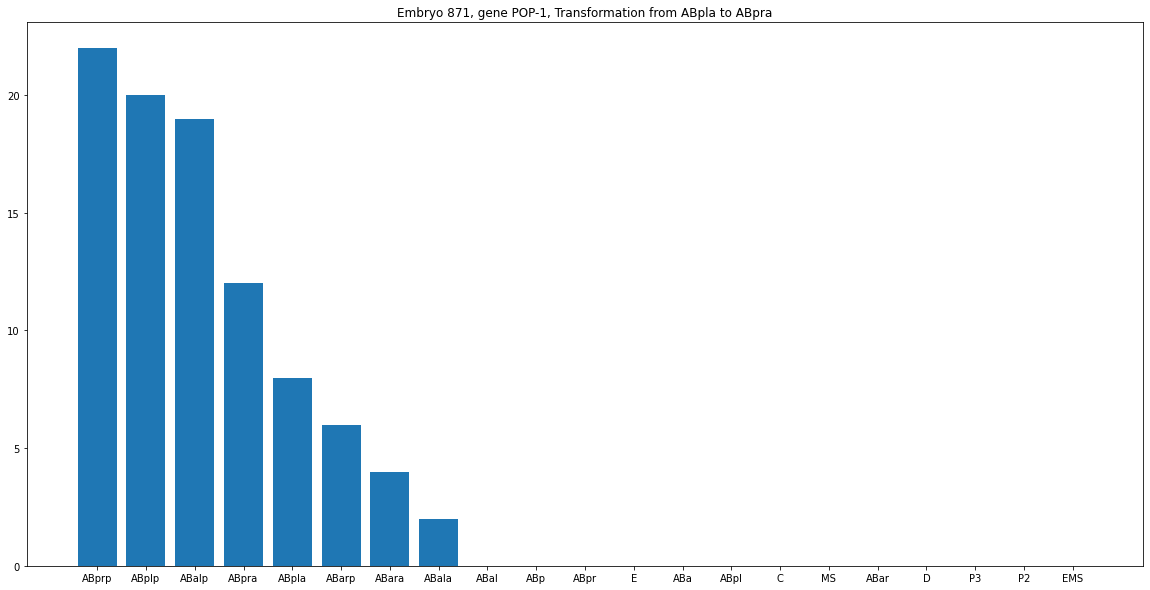

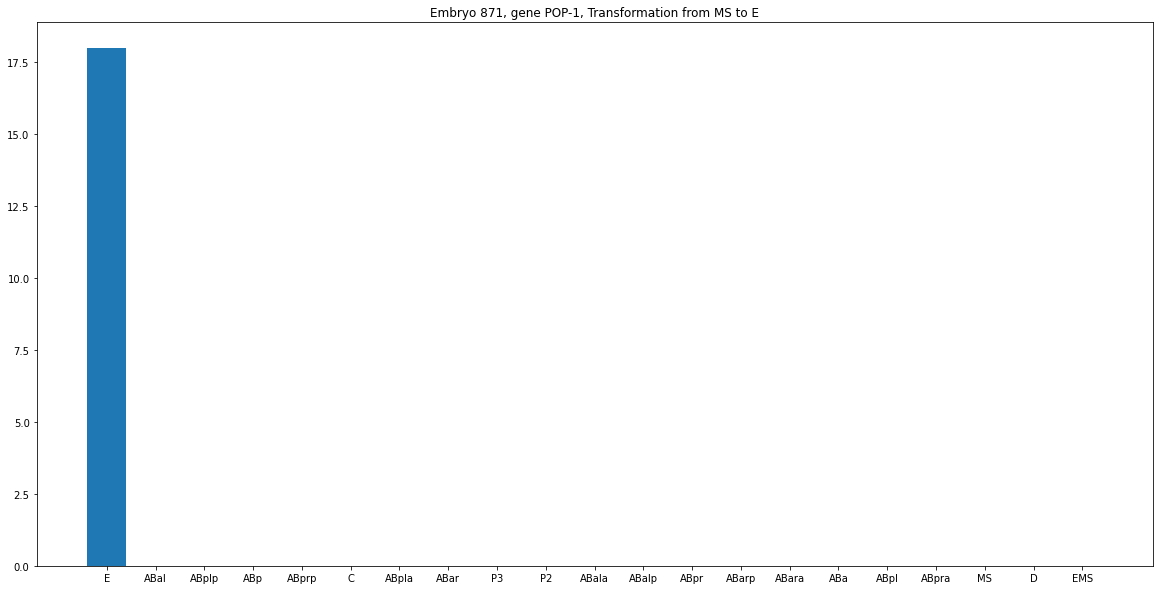

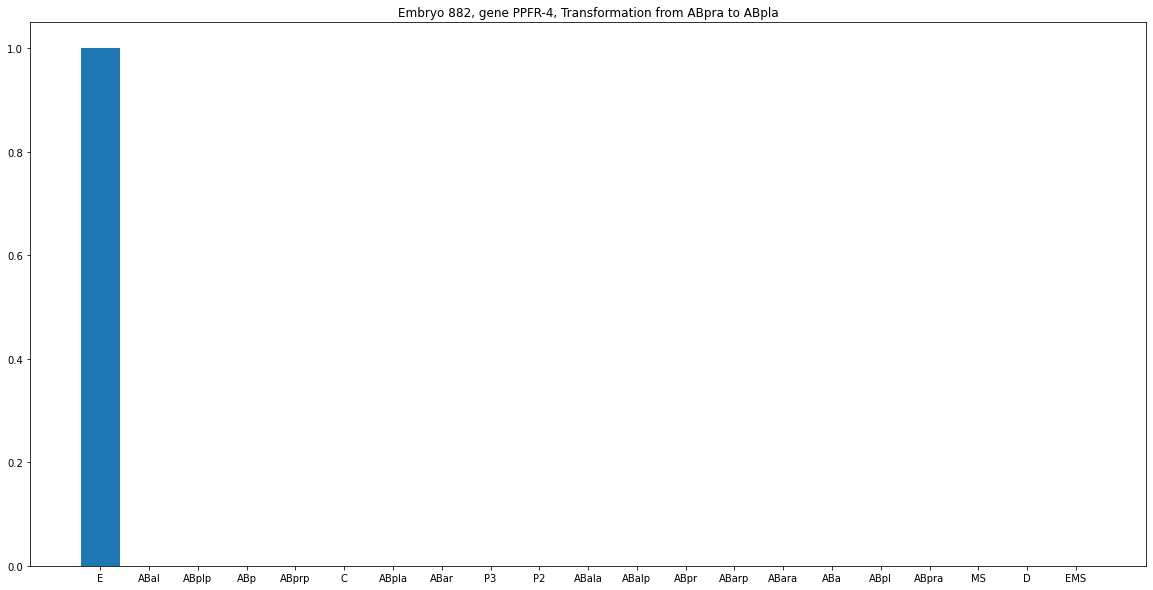

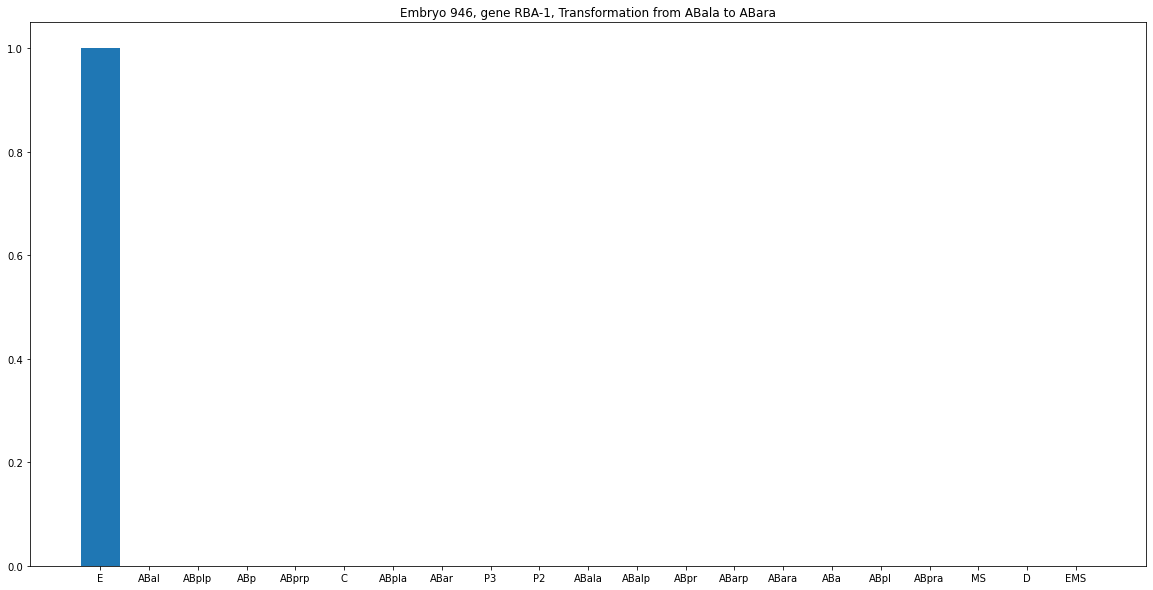

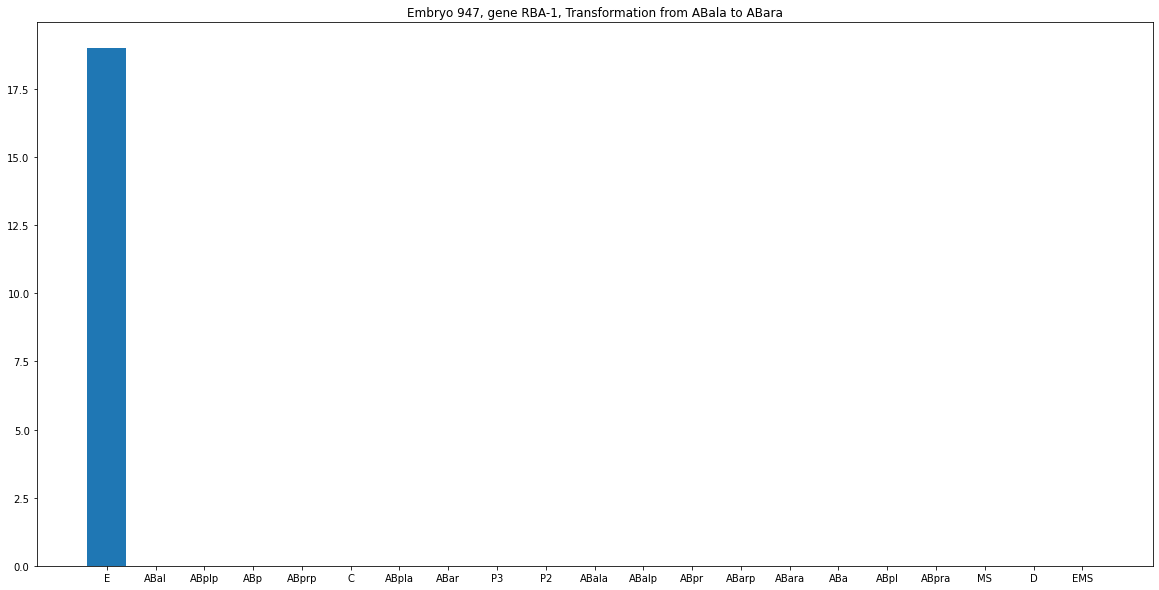

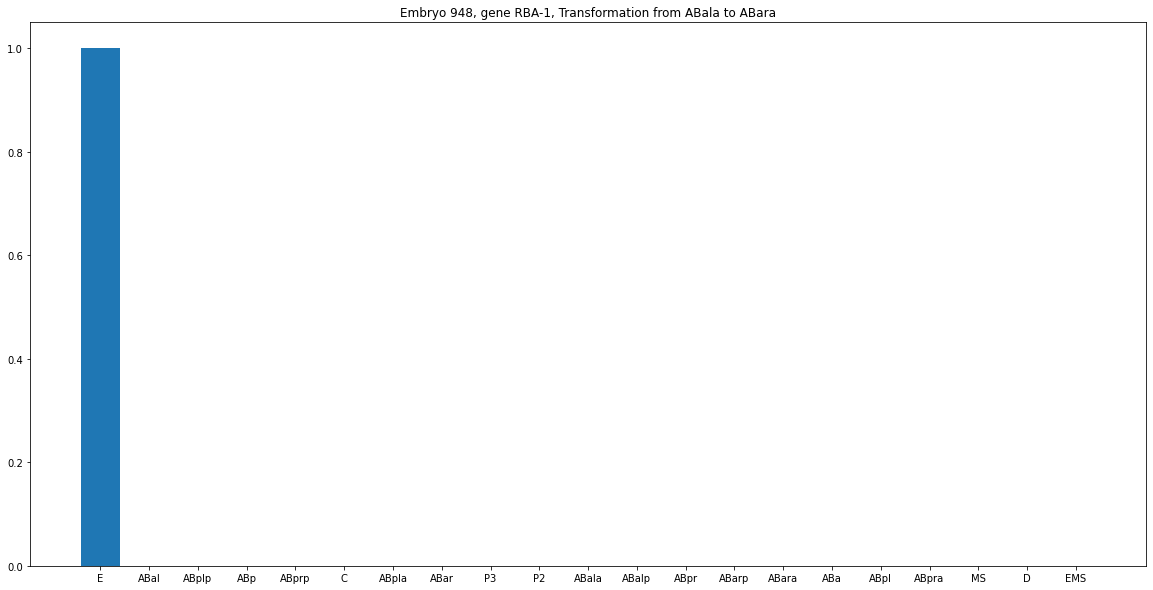

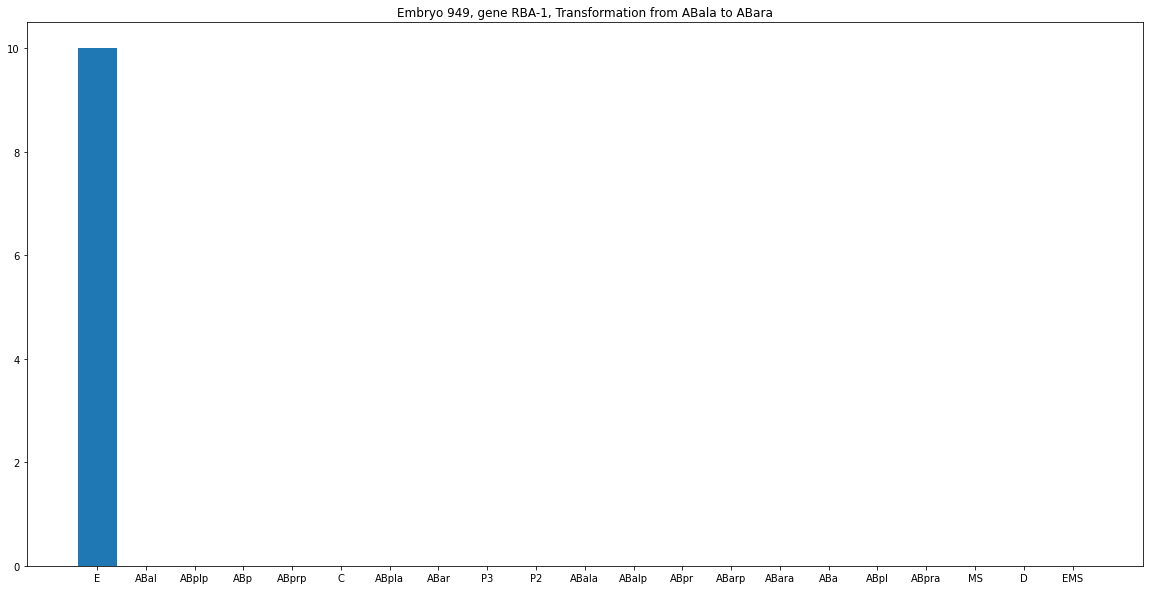

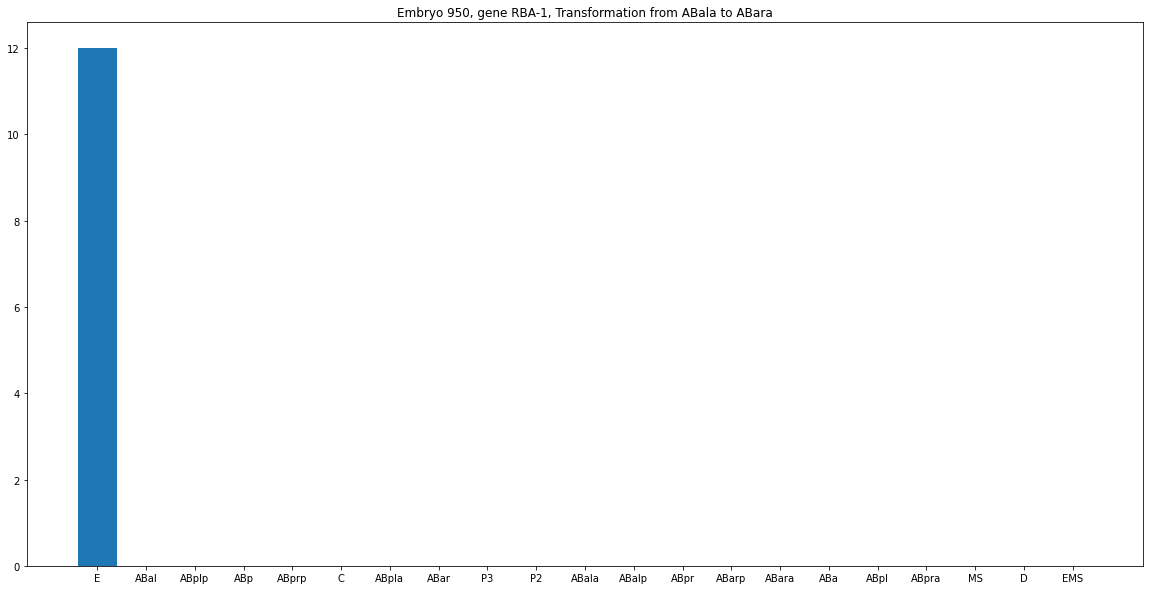

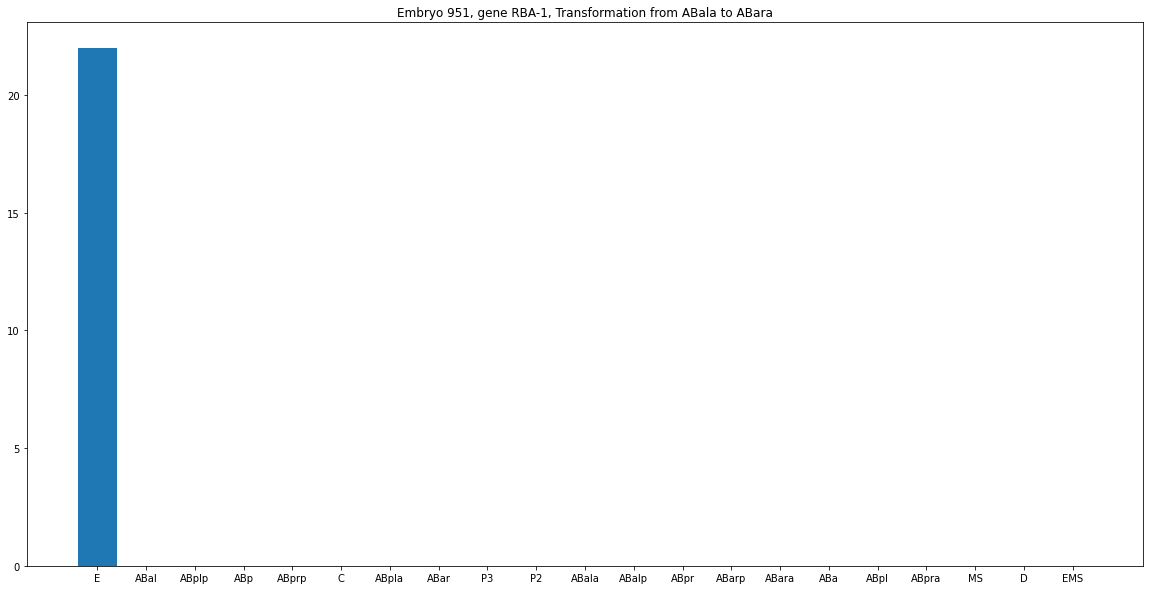

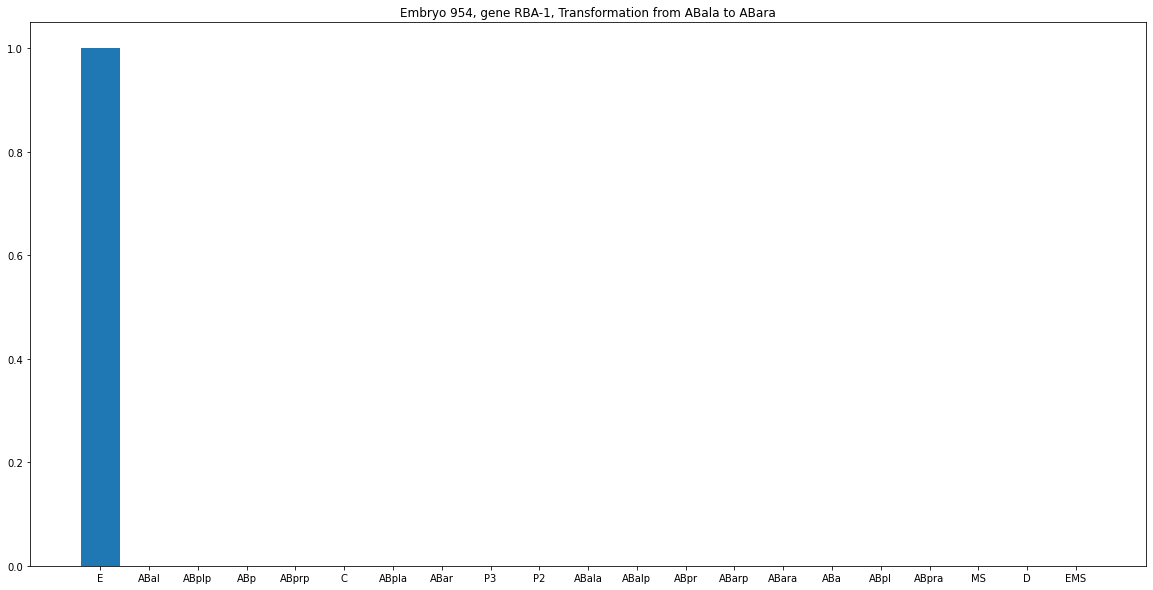

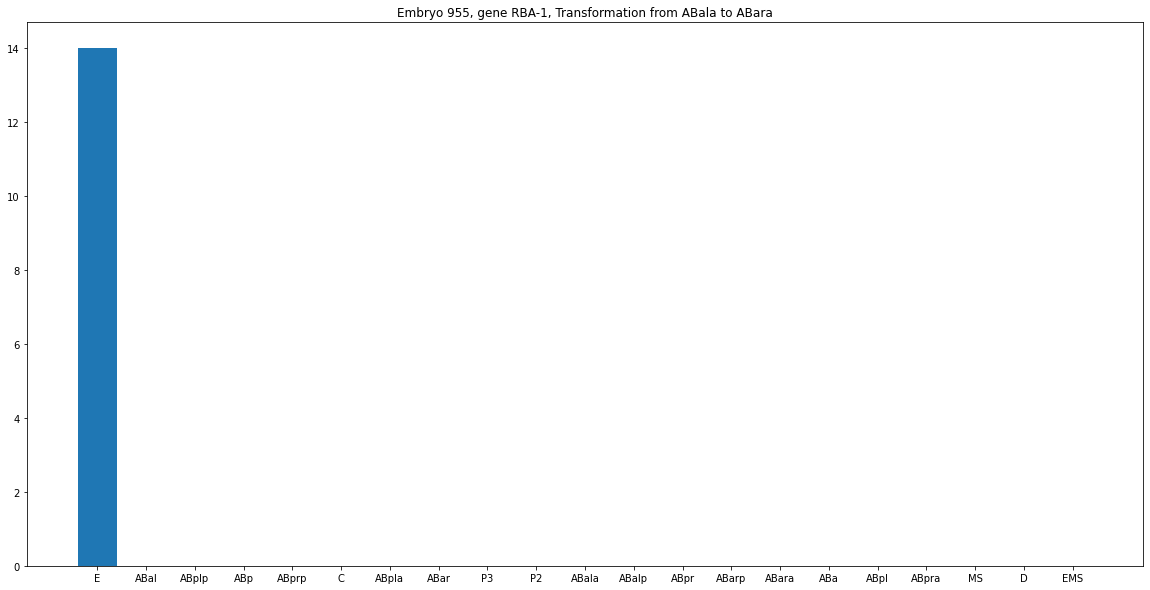

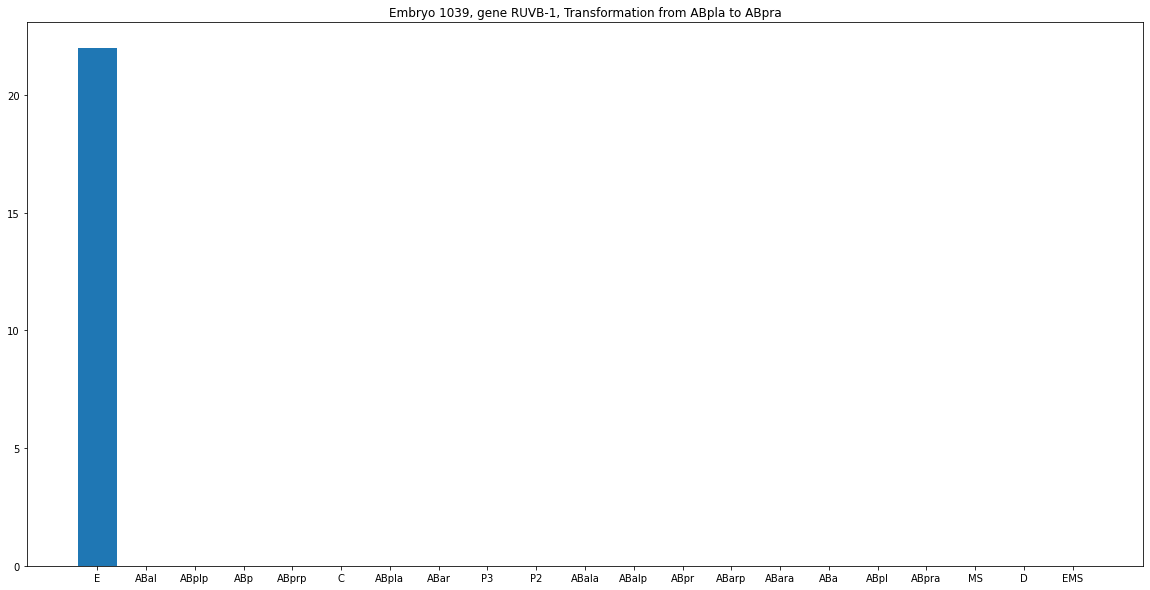

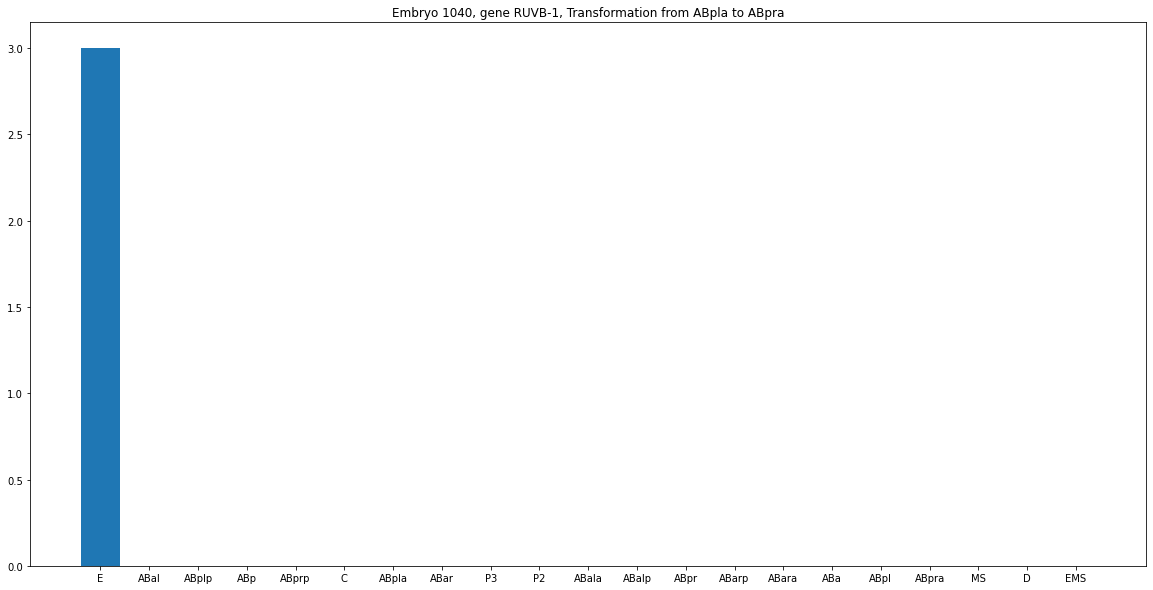

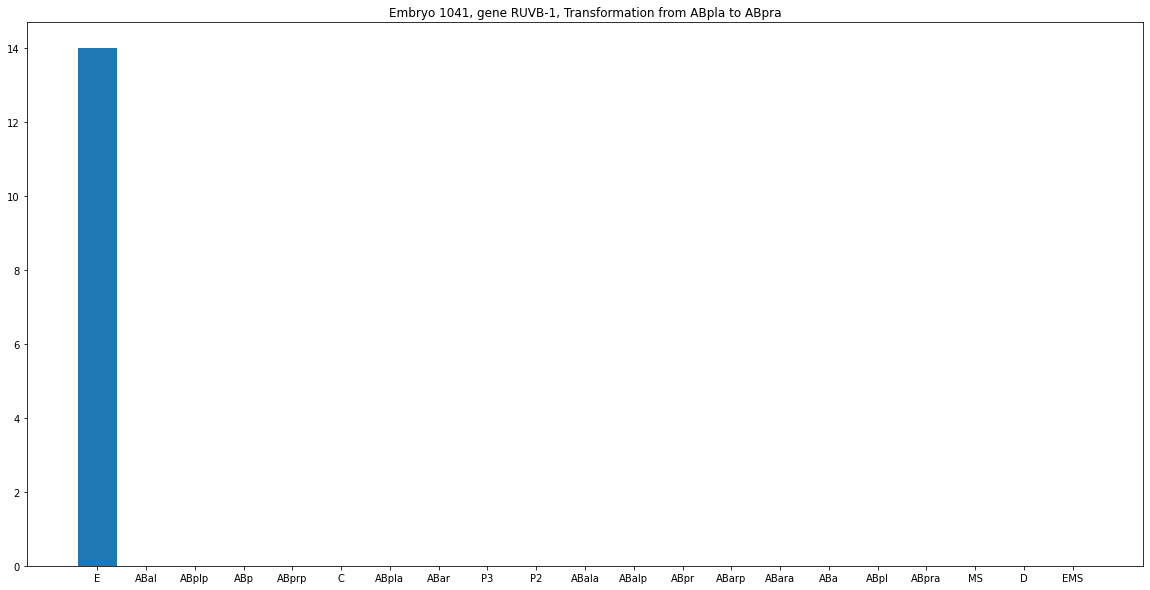

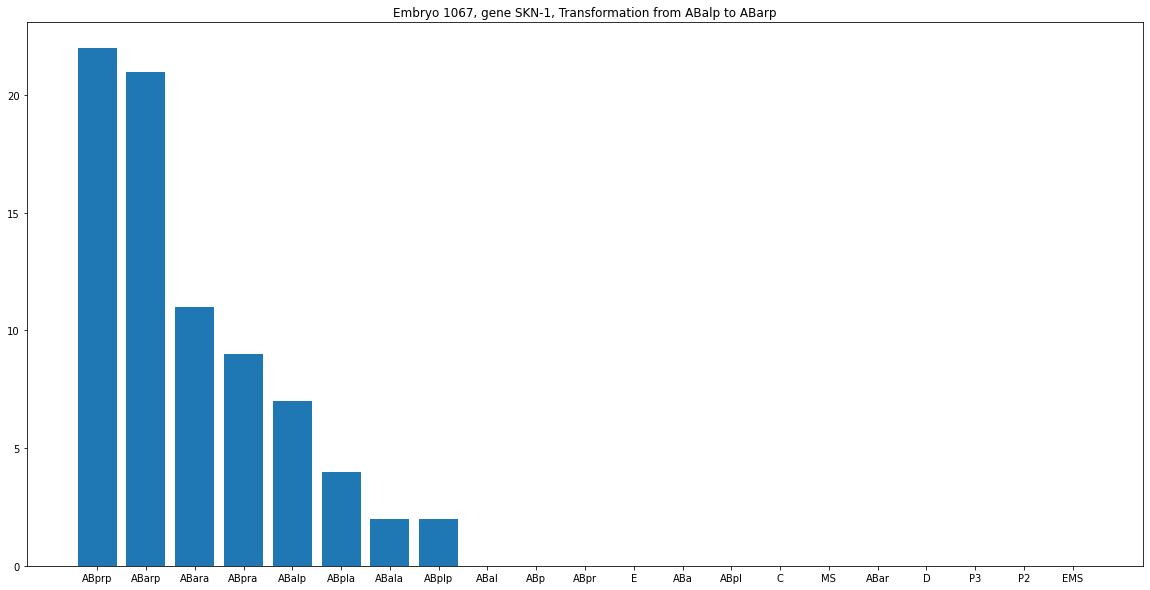

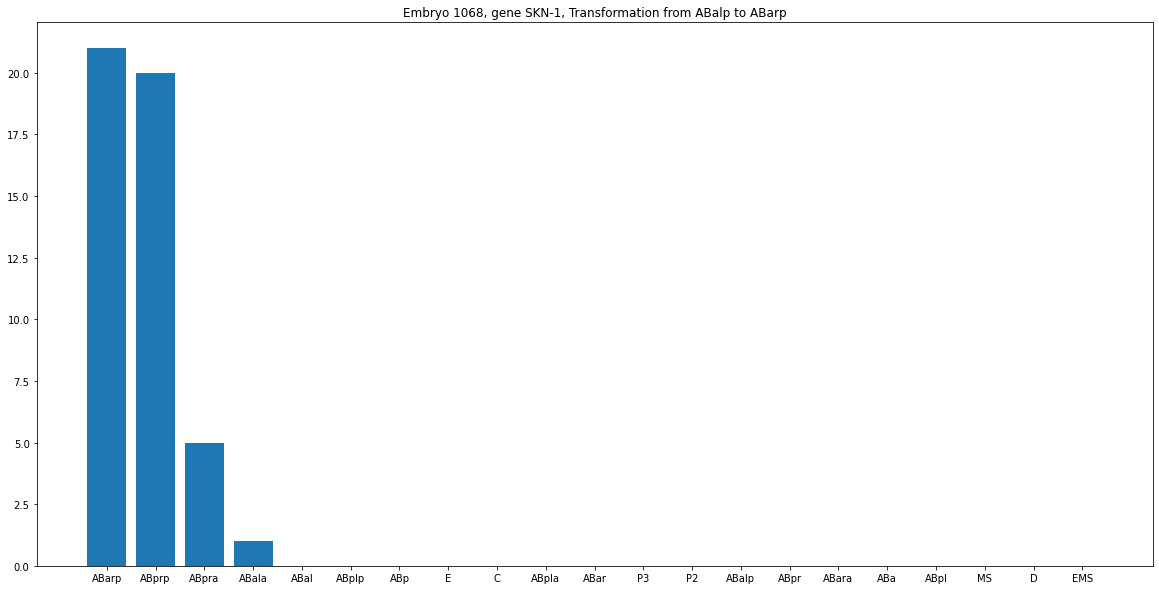

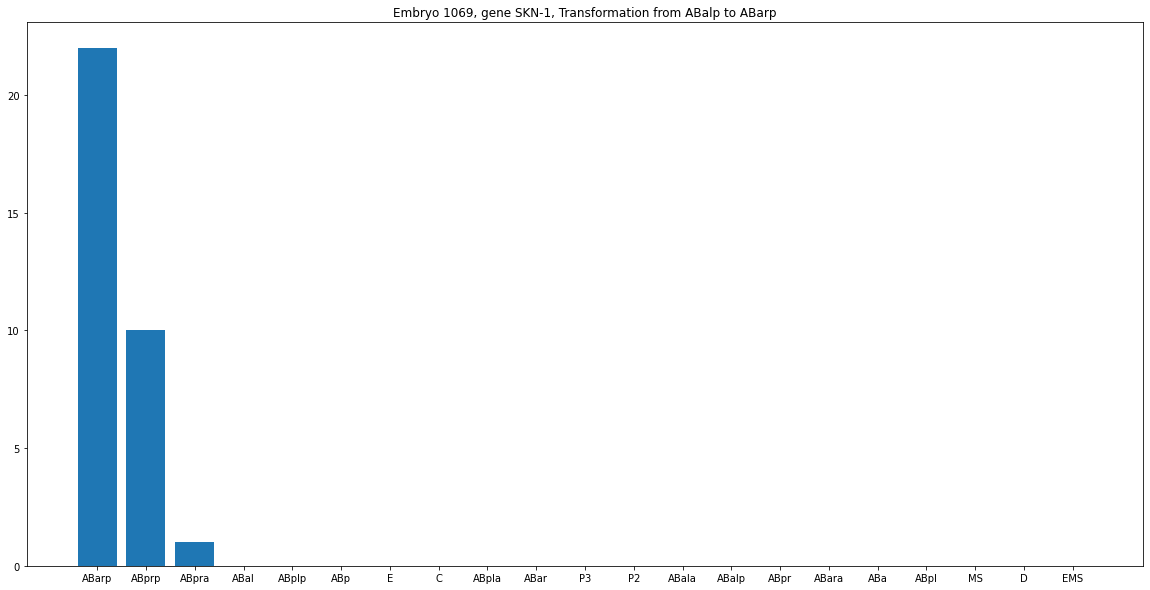

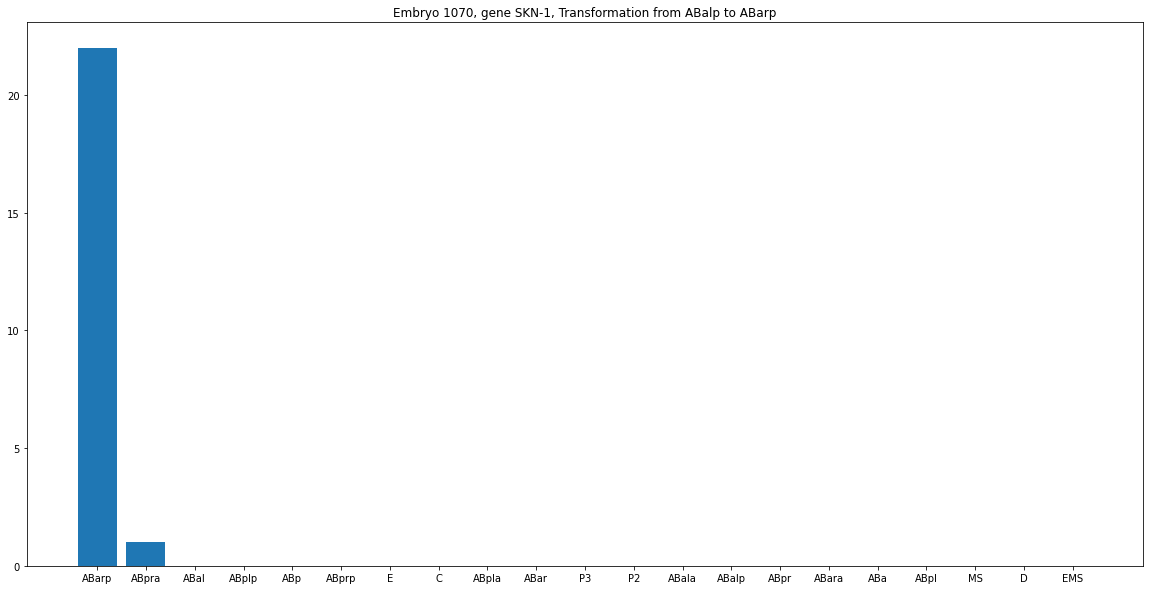

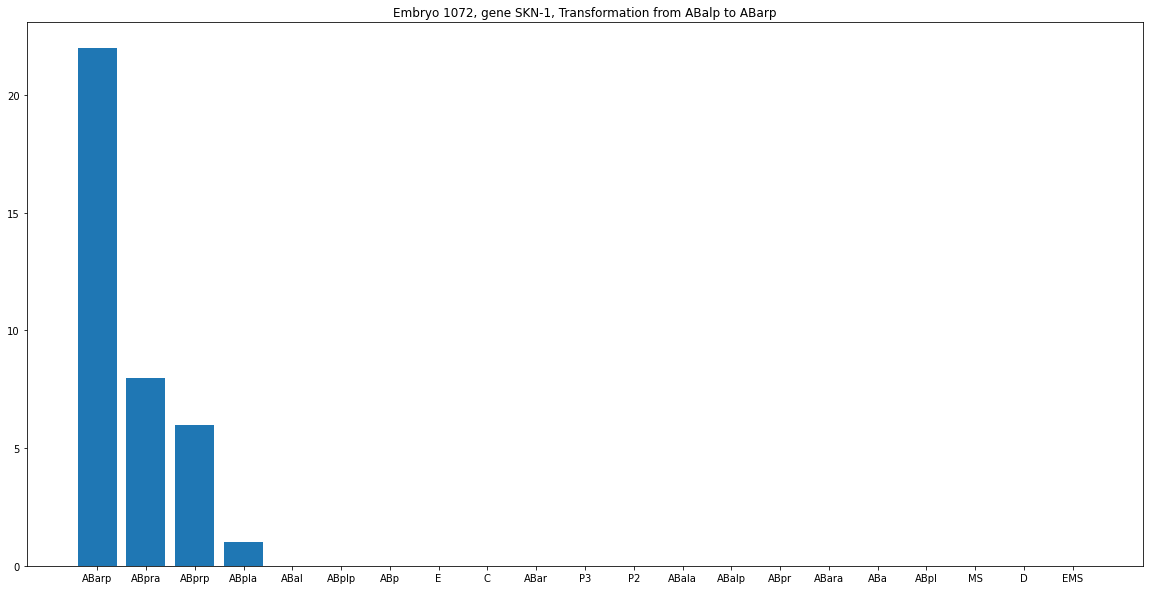

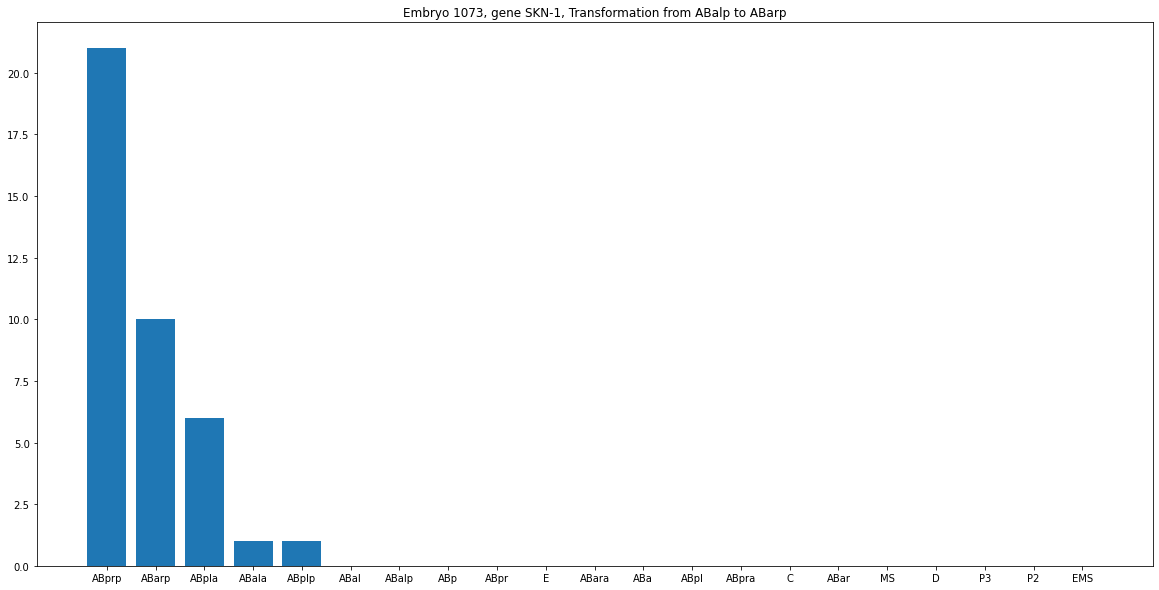

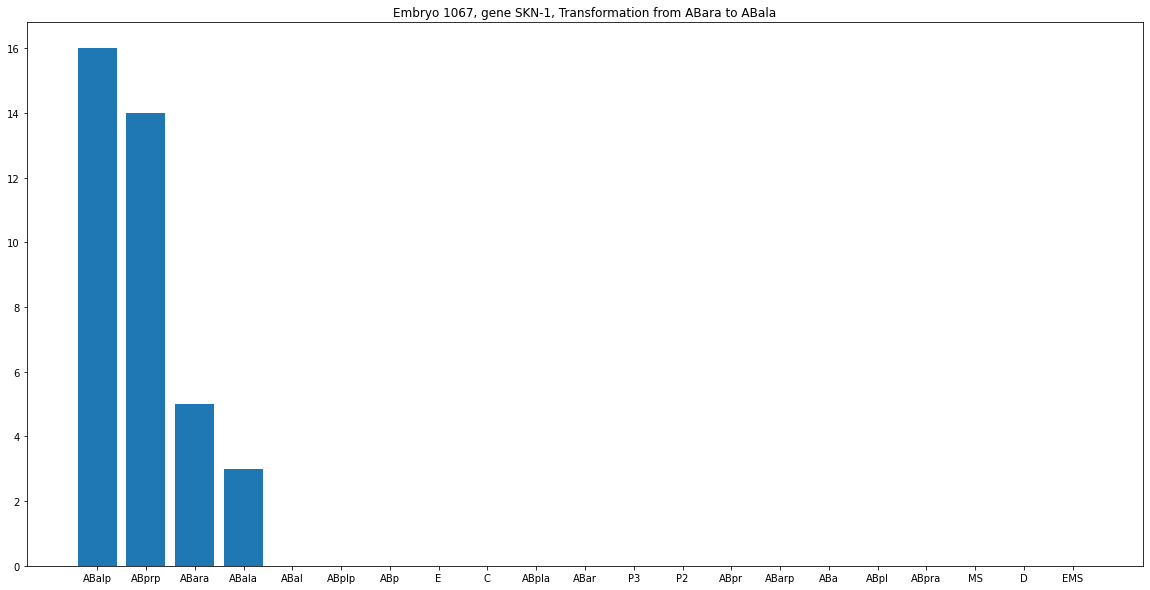

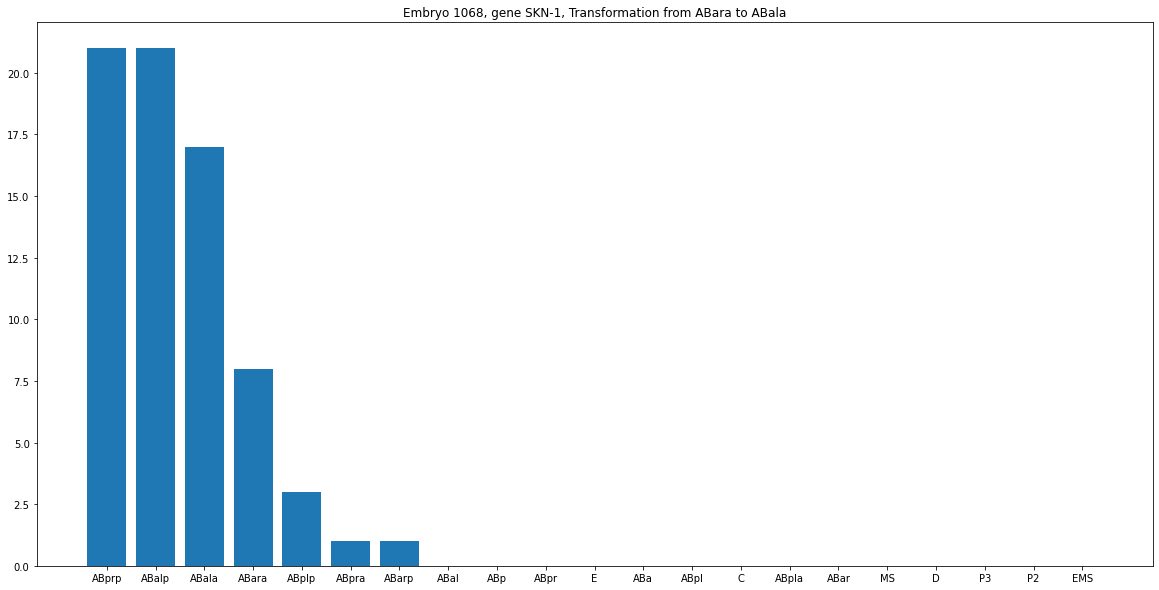

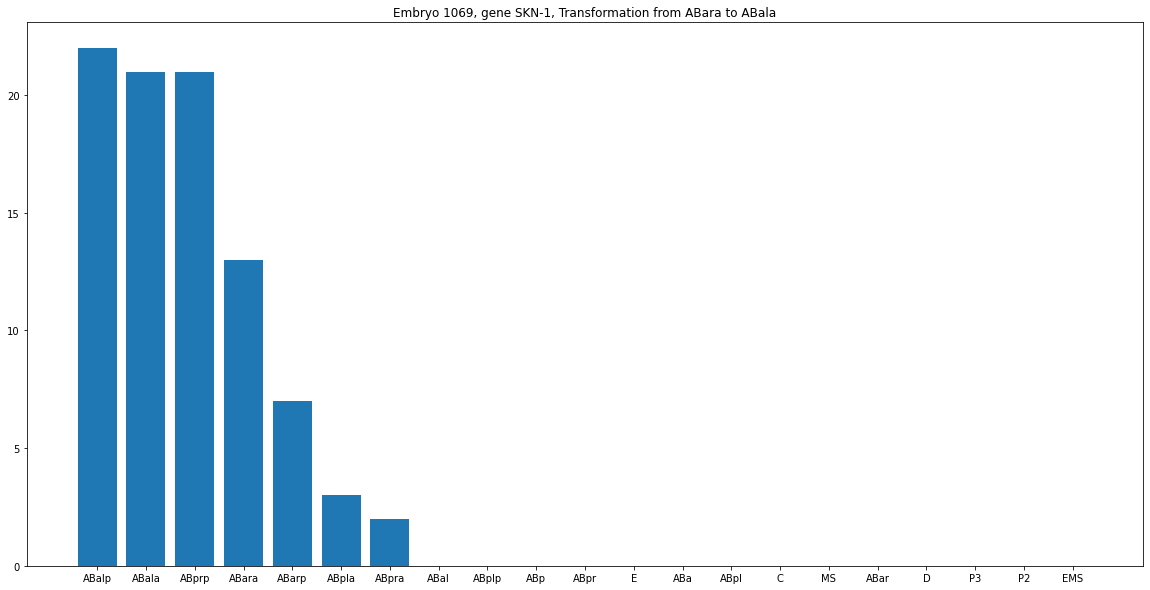

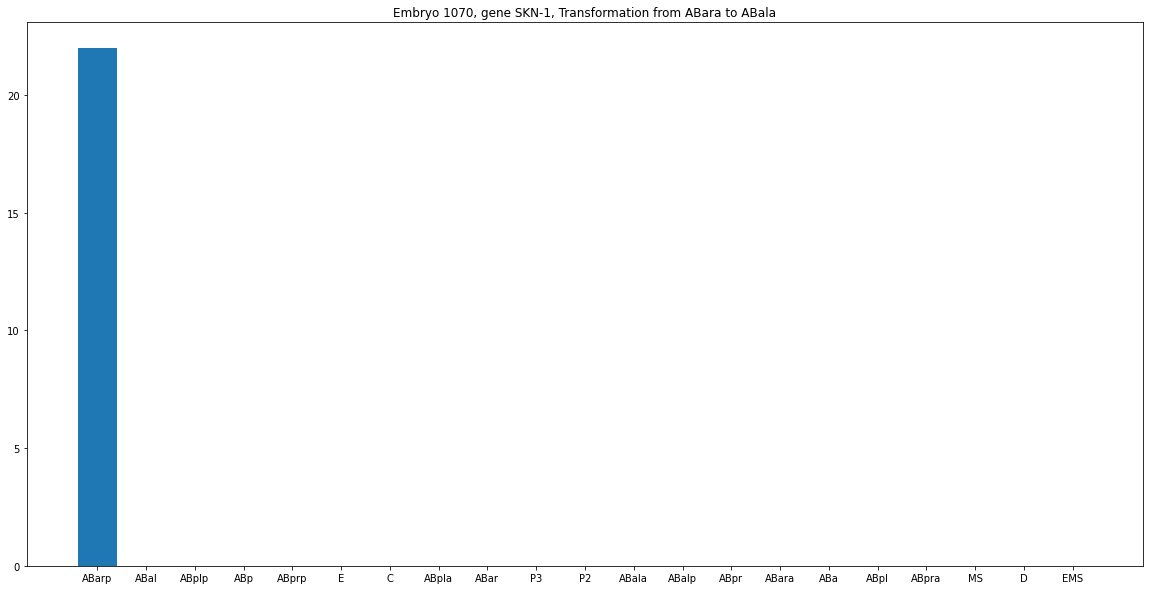

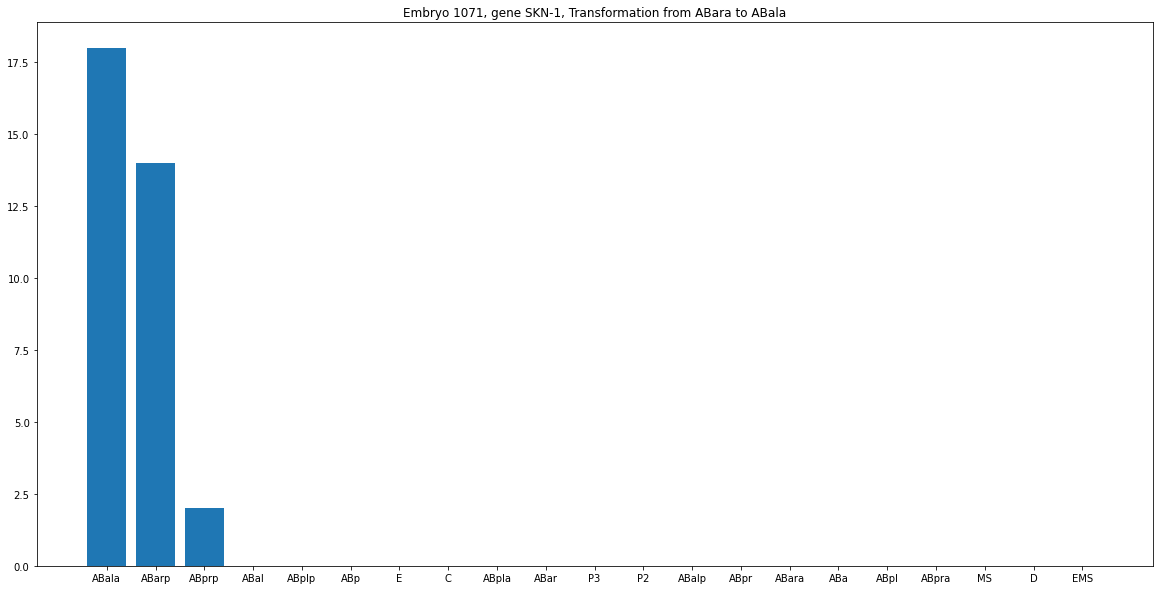

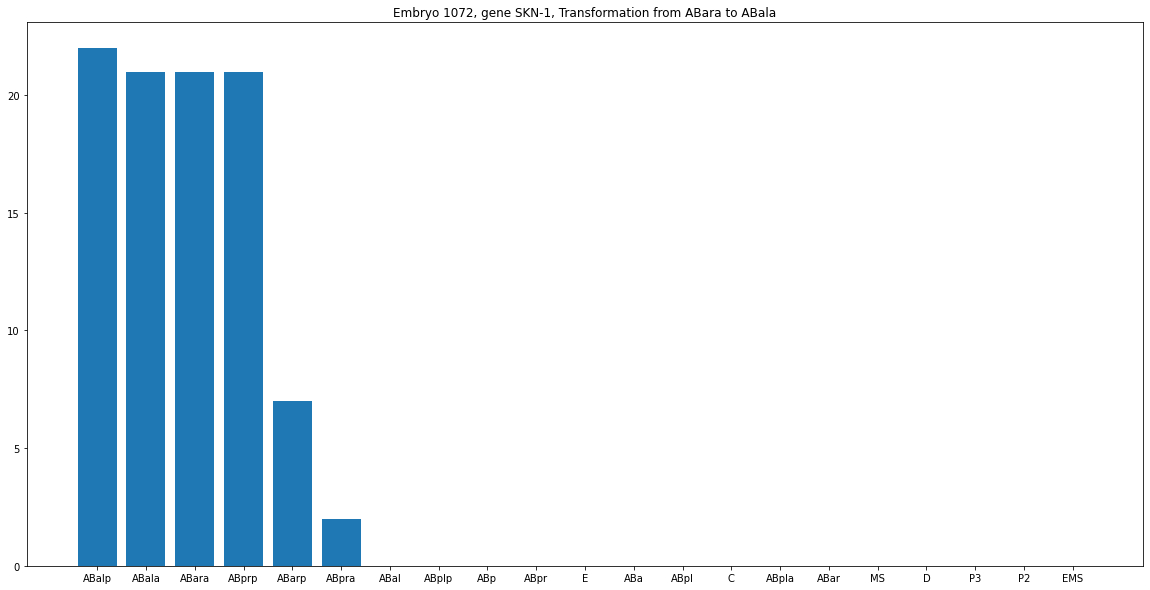

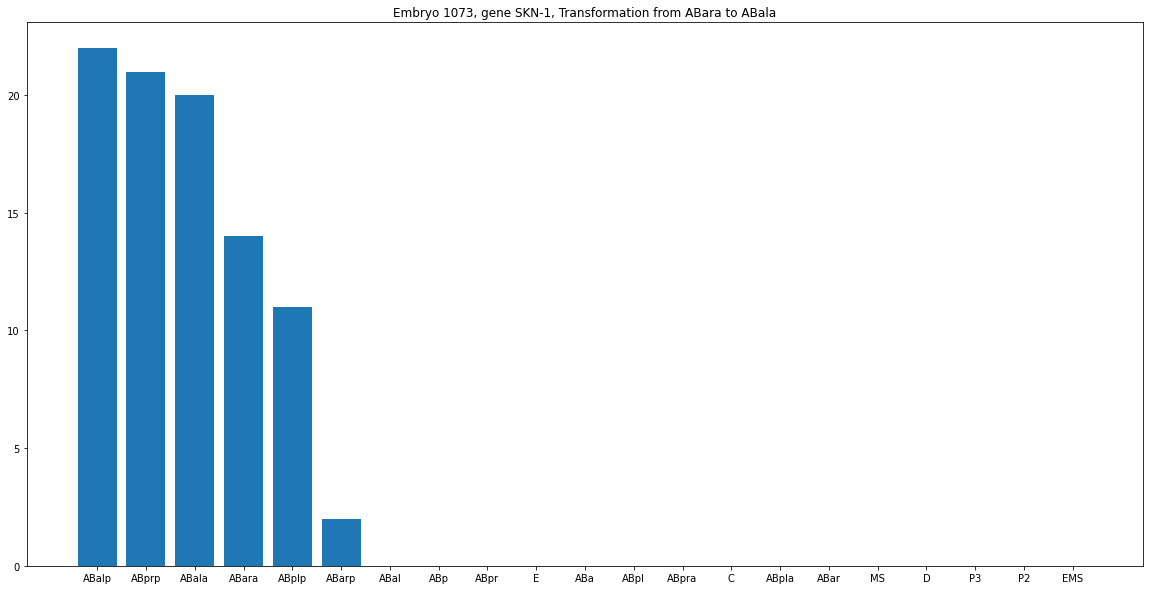

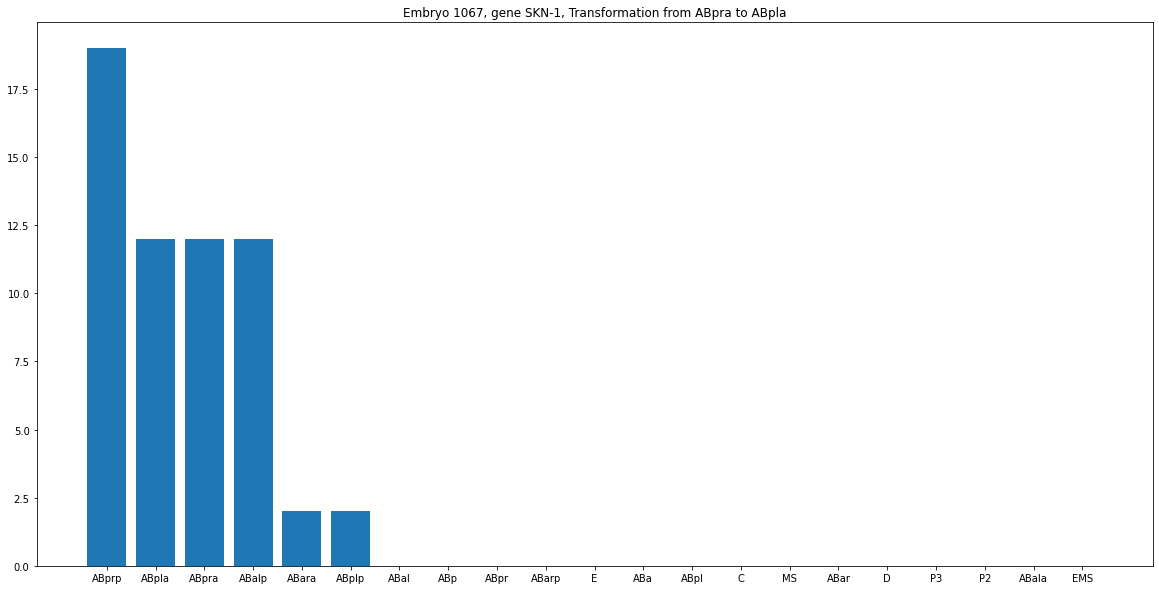

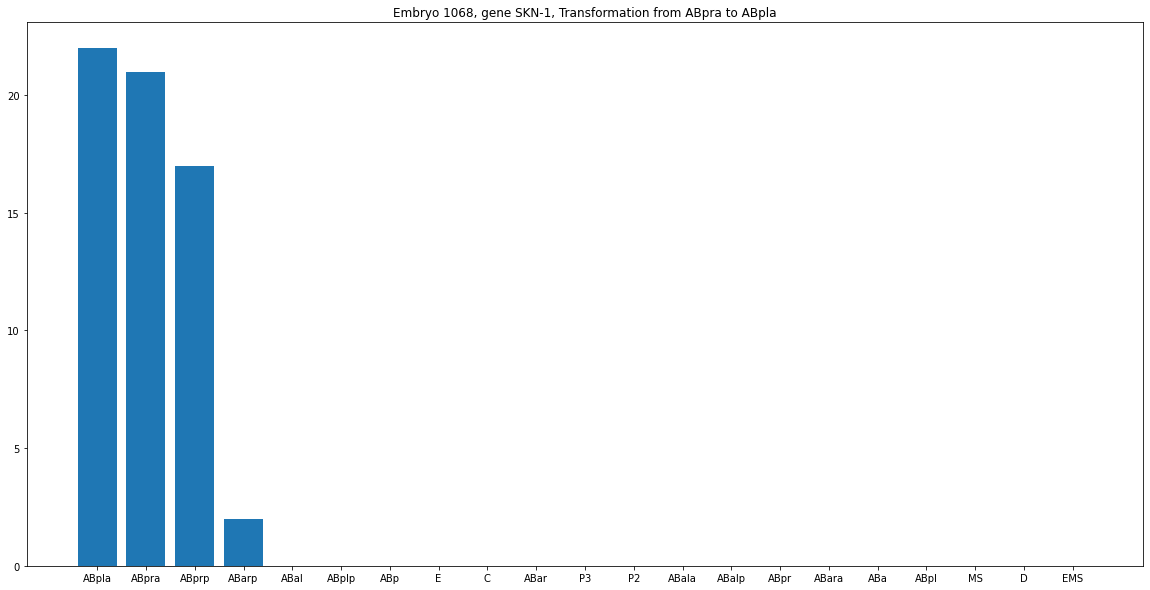

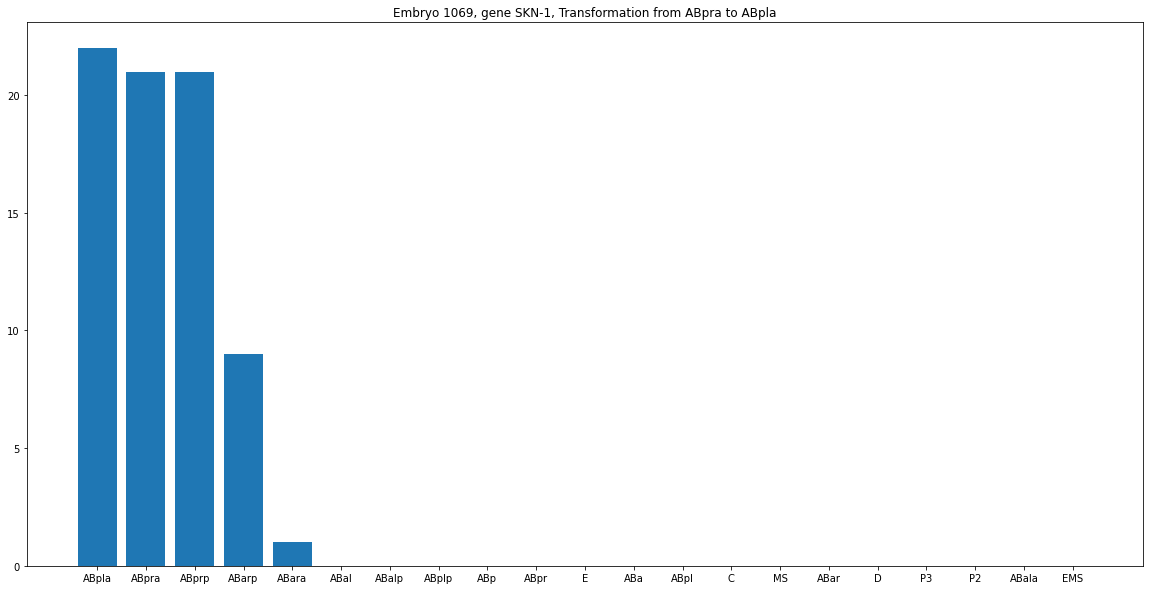

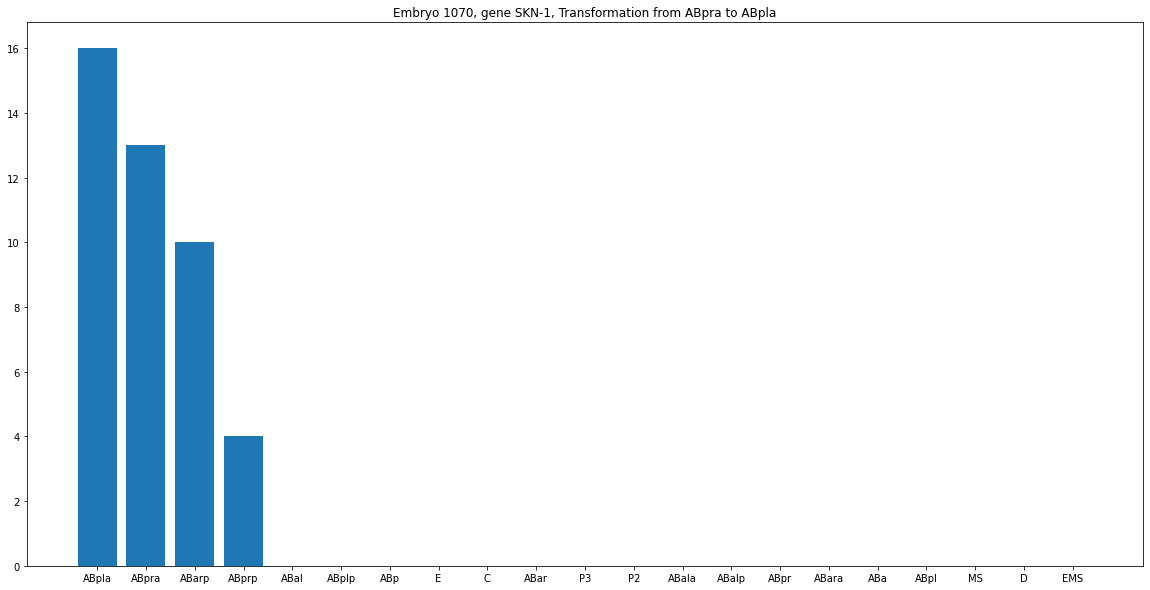

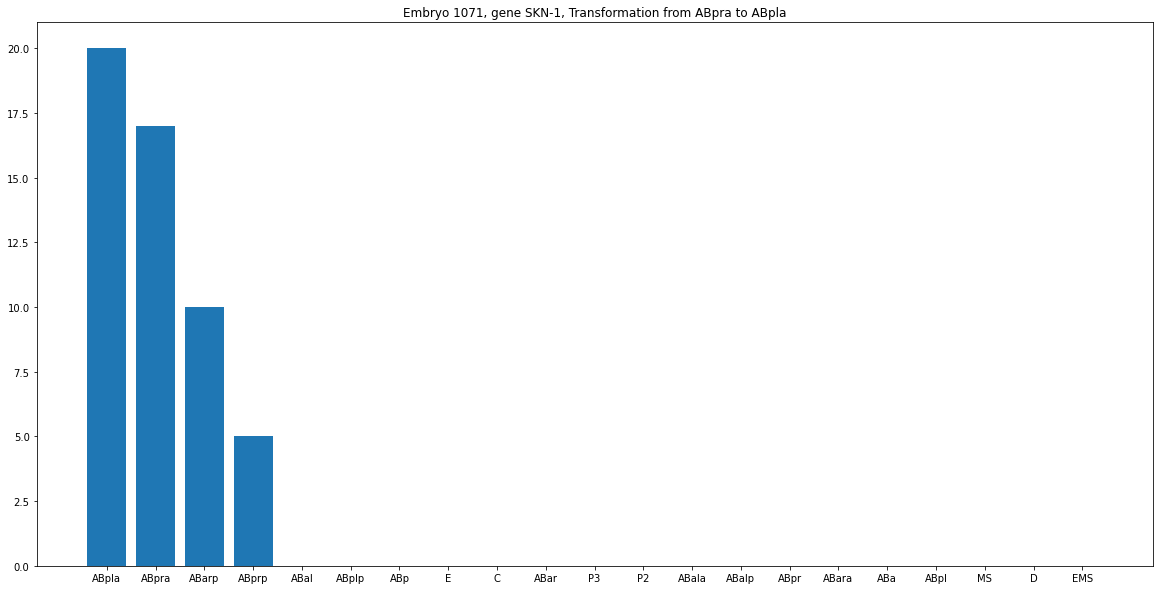

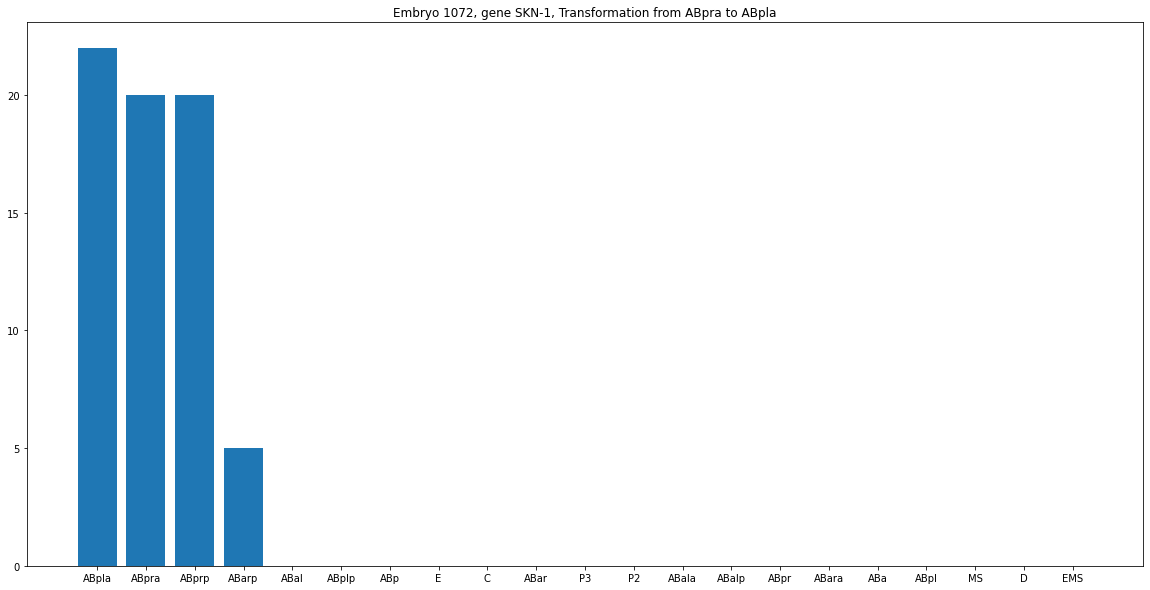

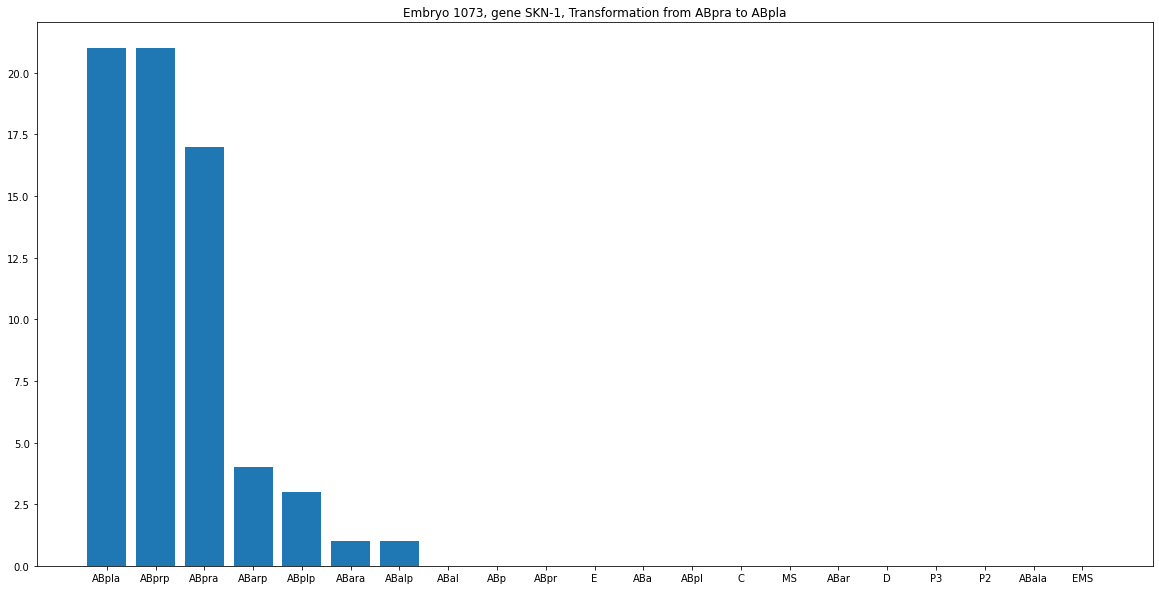

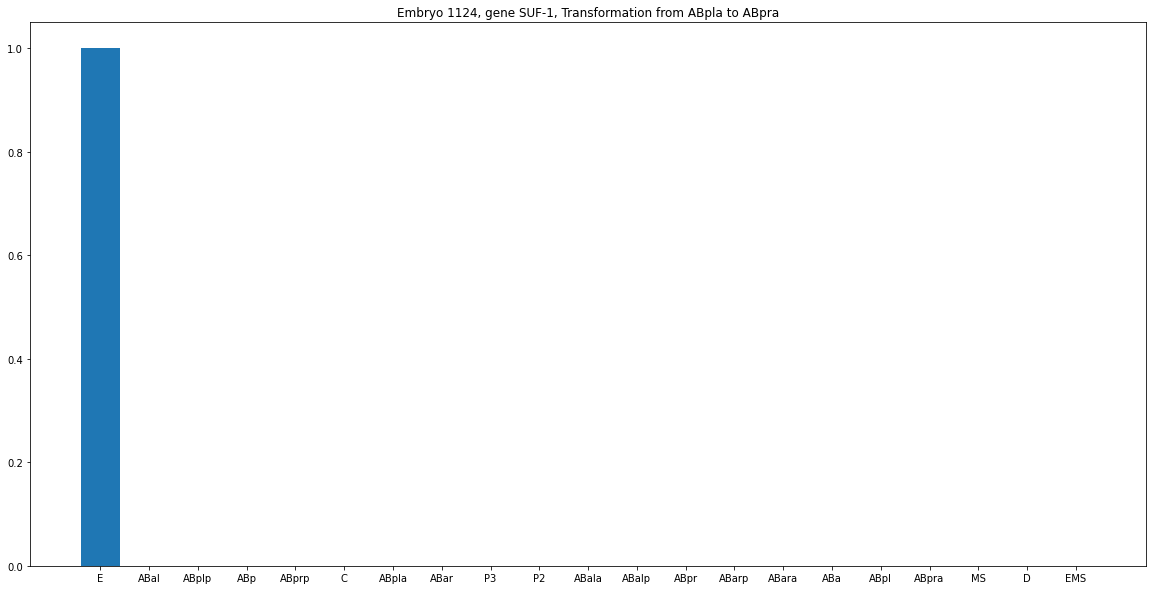

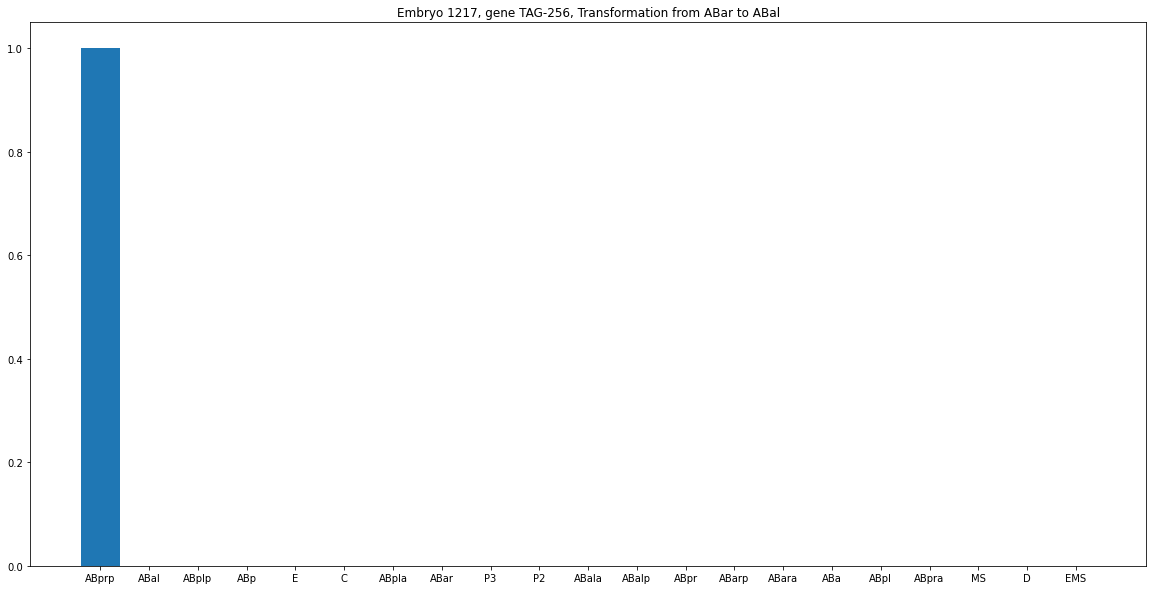

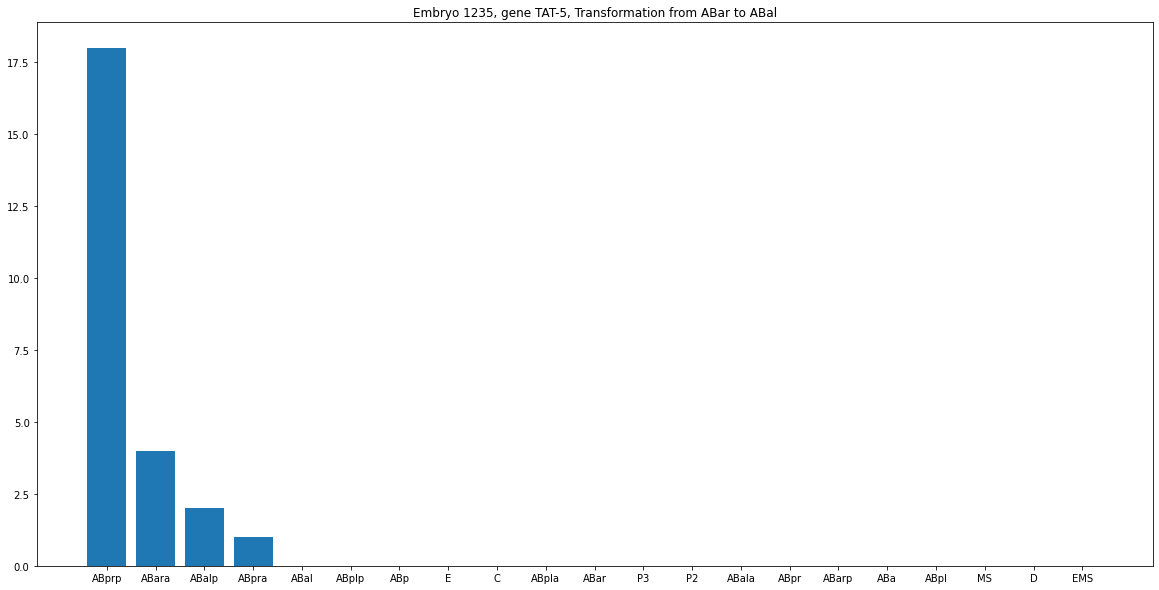

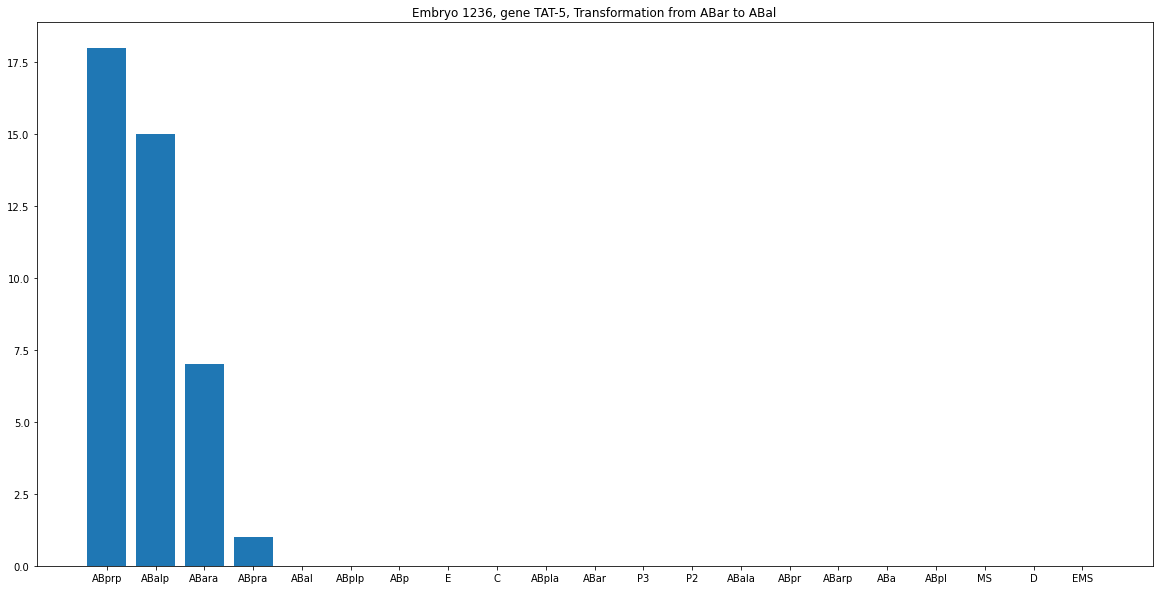

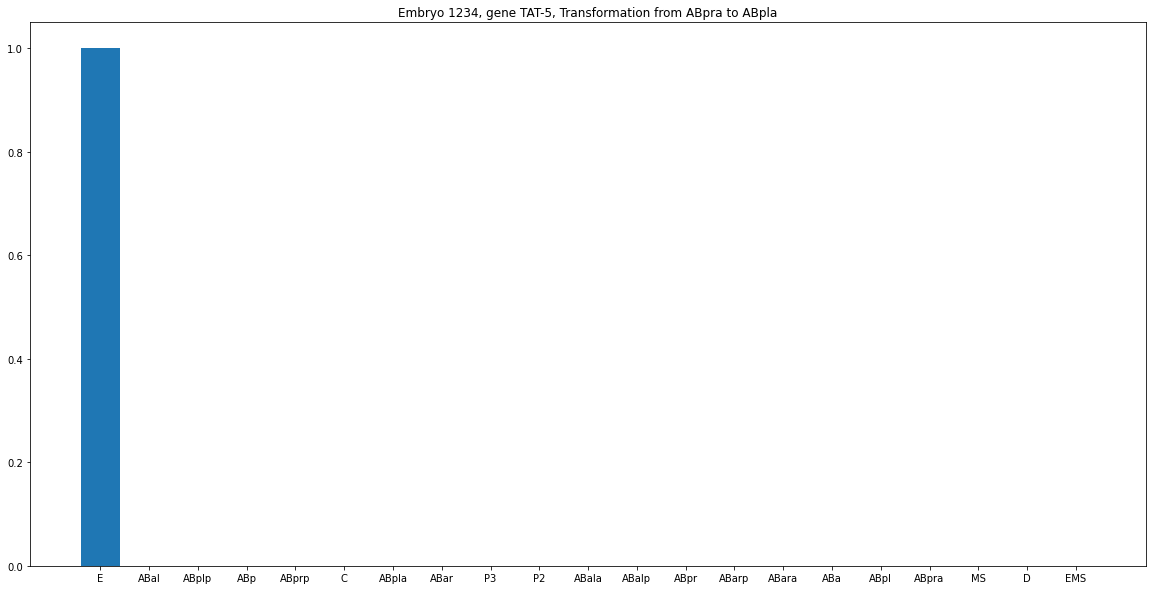

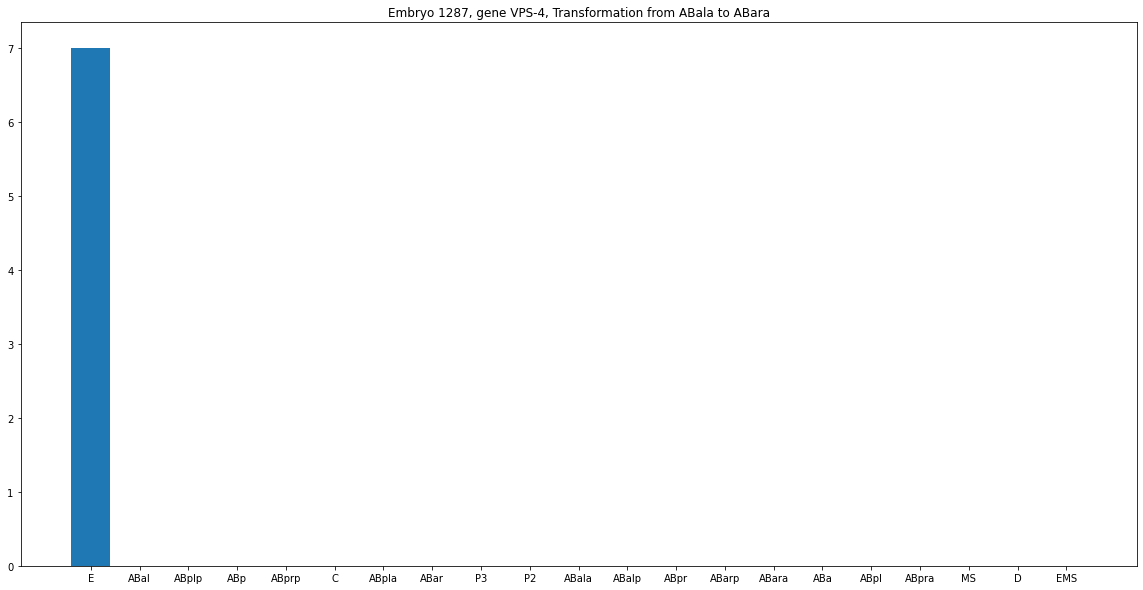

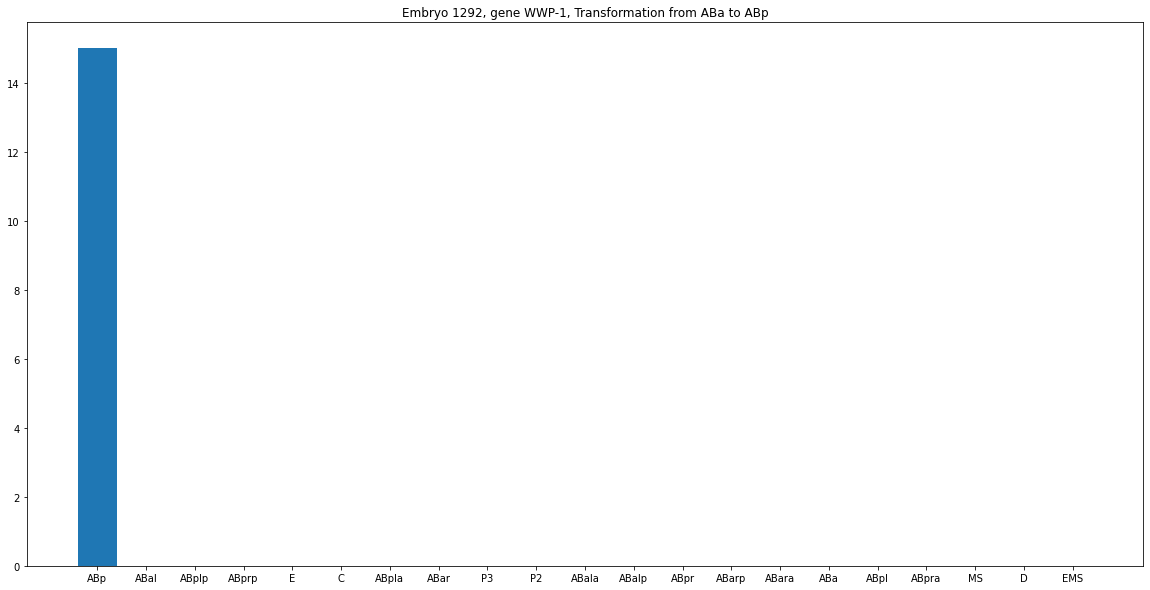

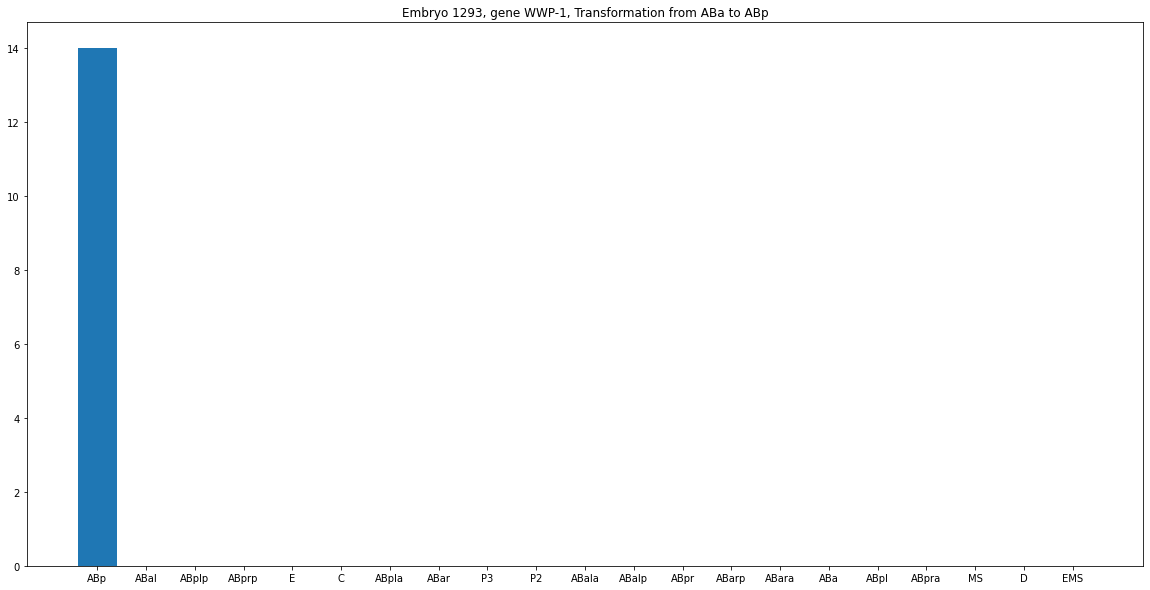

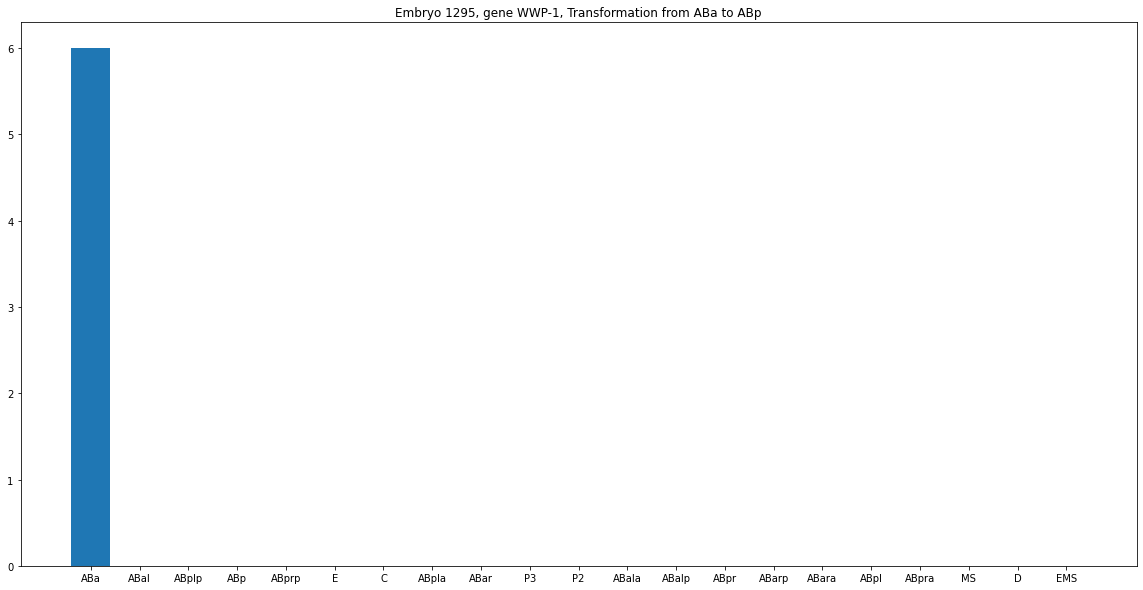

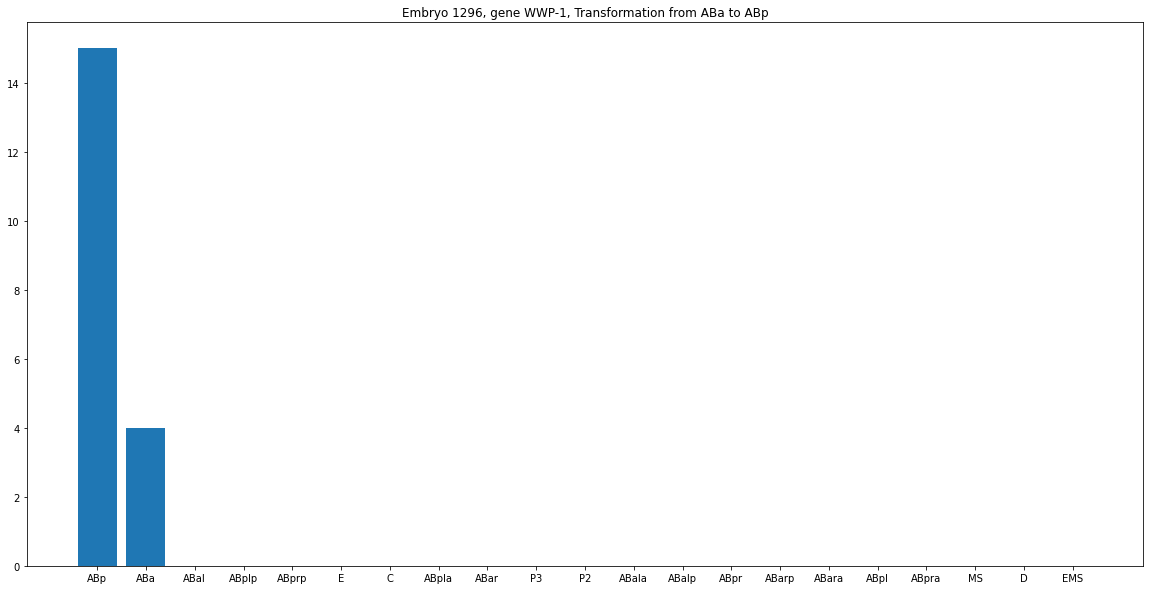

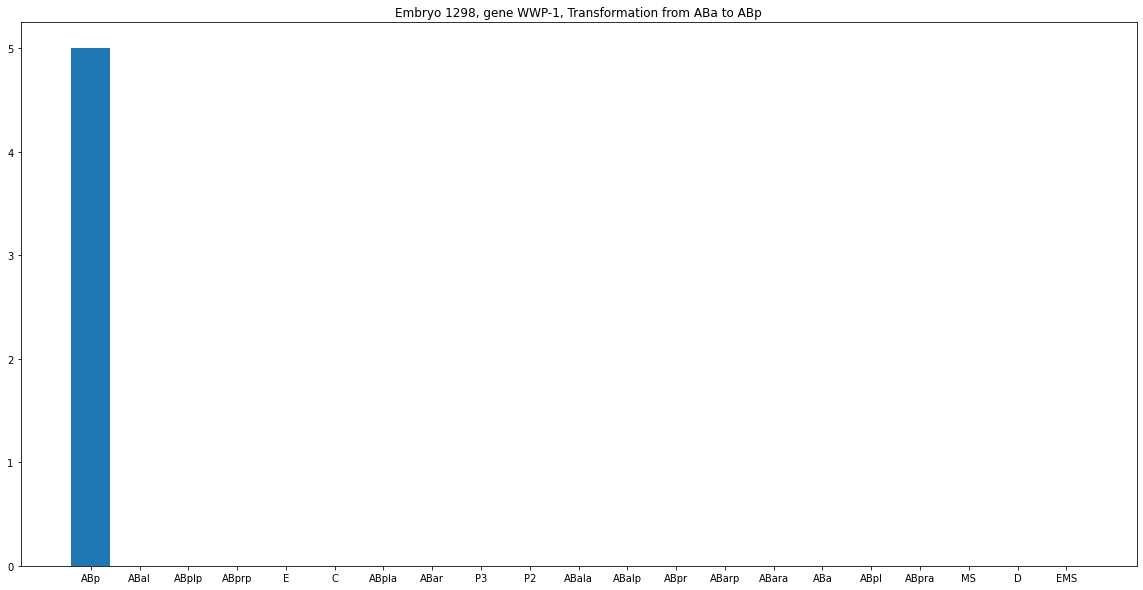

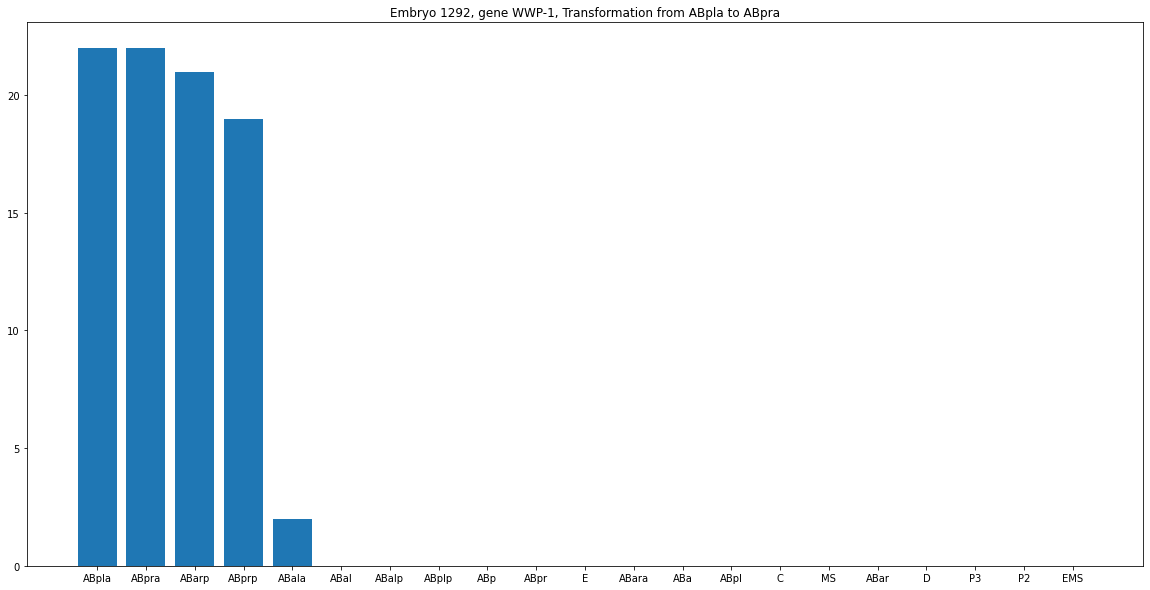

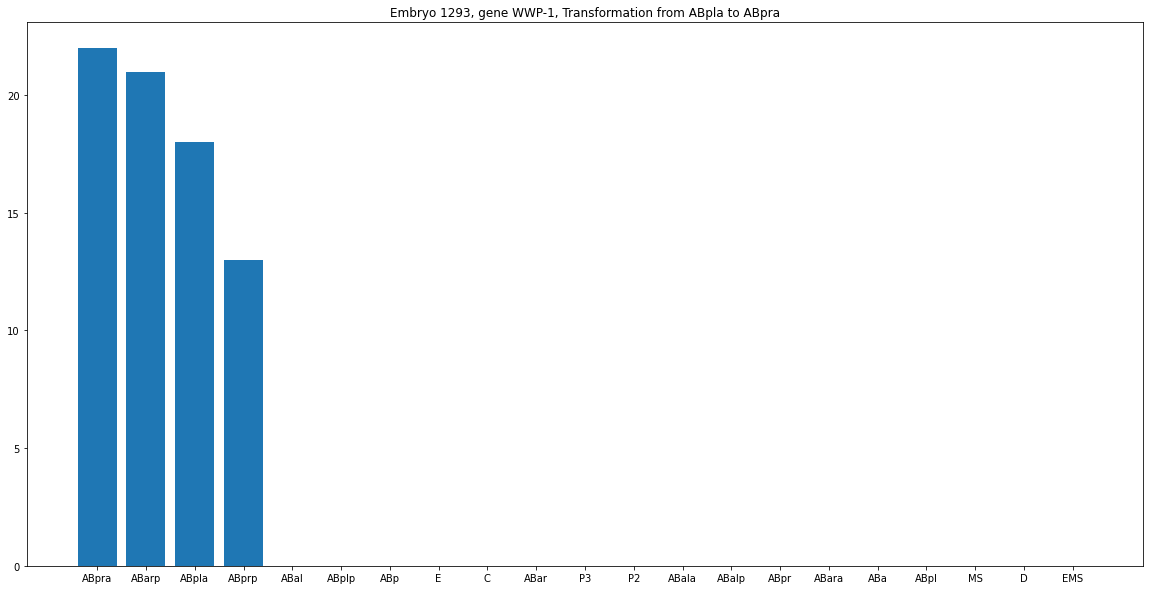

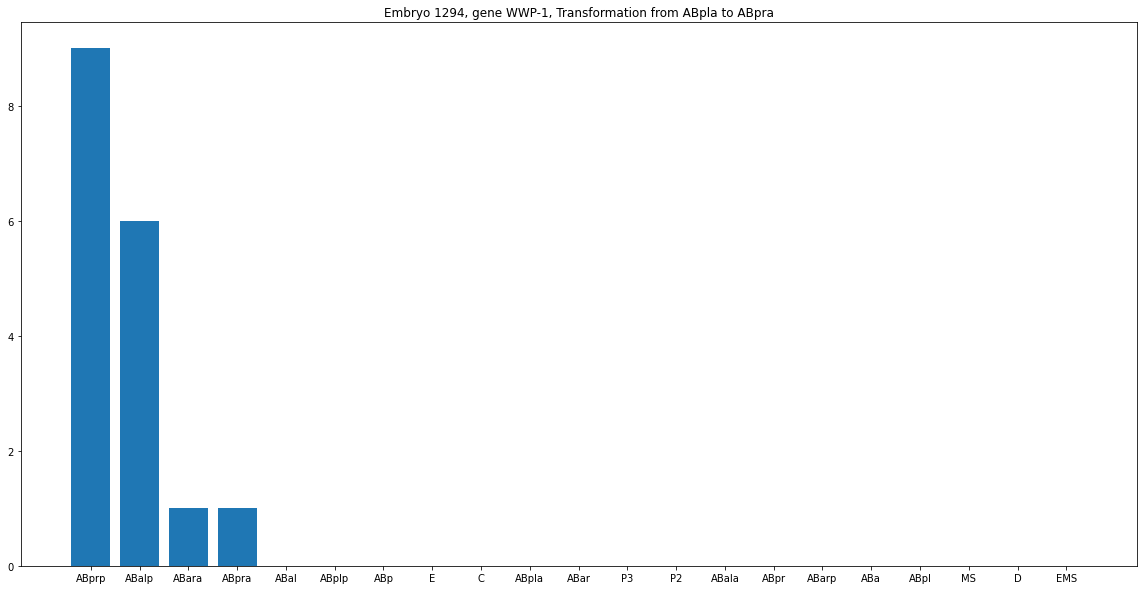

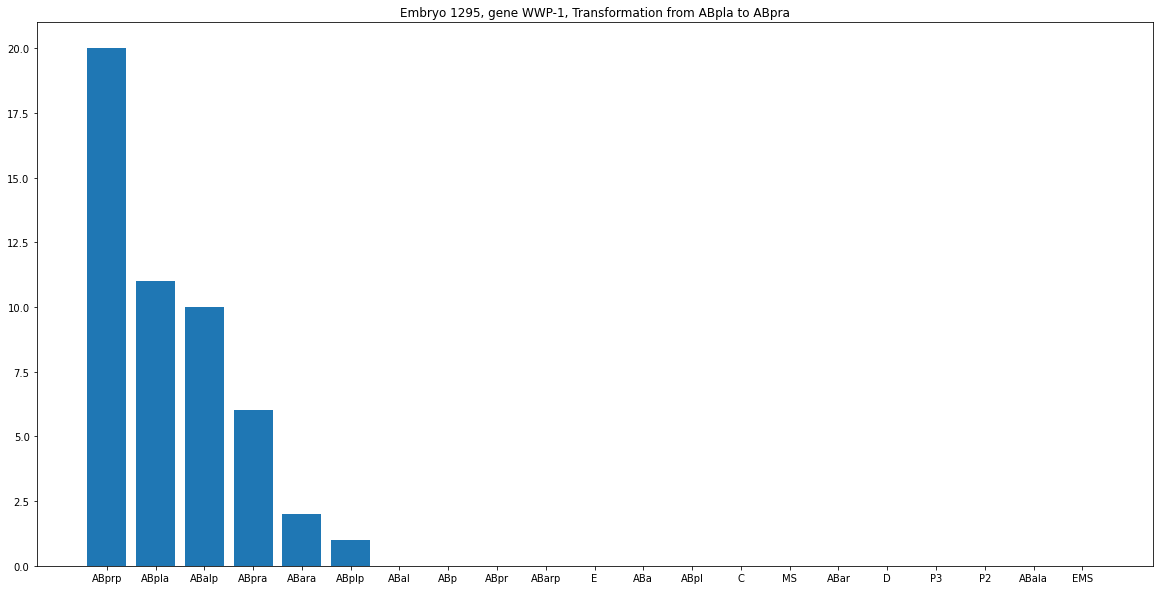

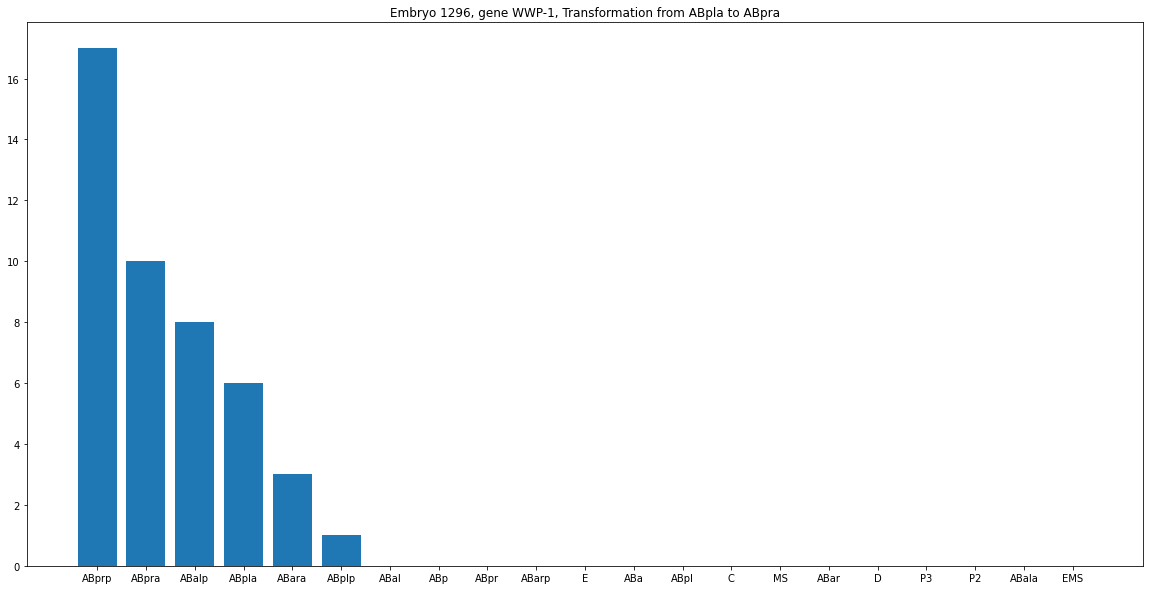

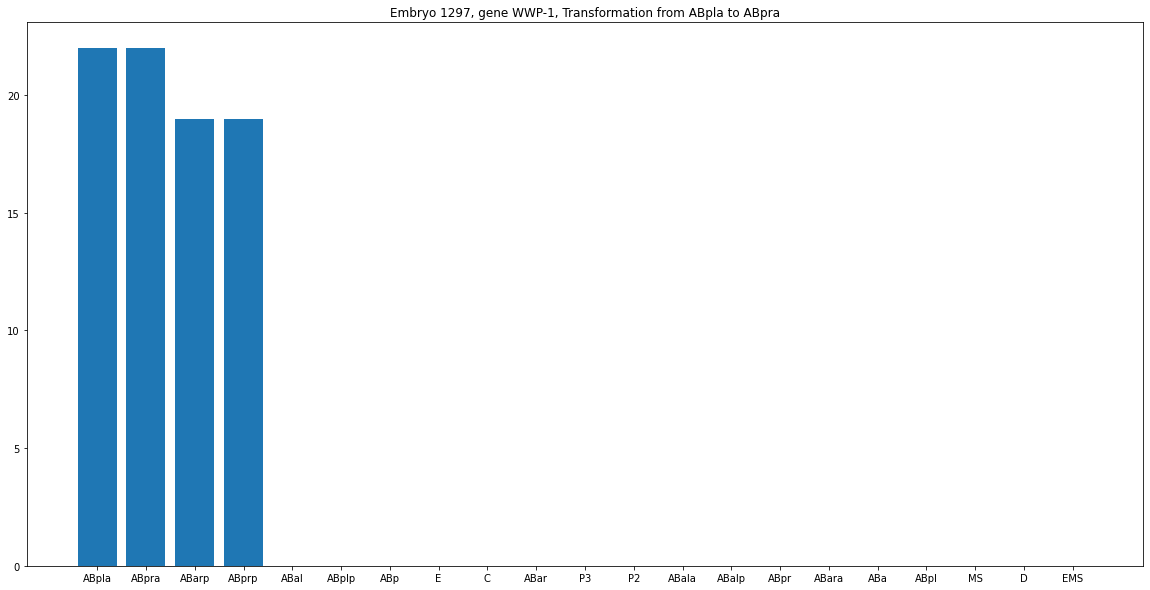

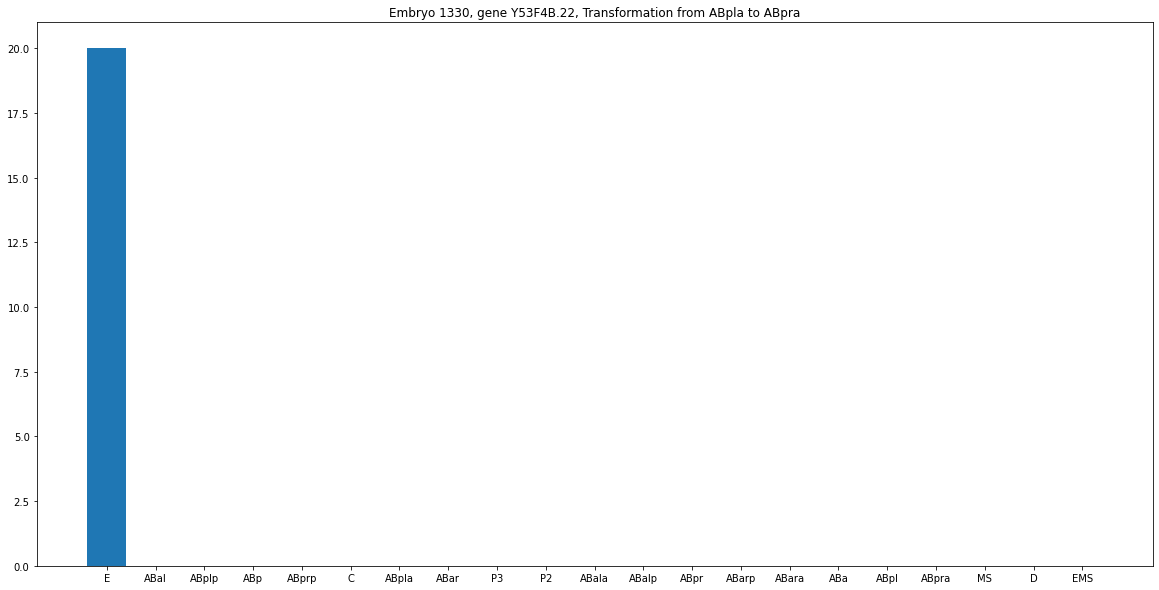

In [274]:
plt.rcParams['figure.figsize'] = [20, 10]
for n in transformation_assignments:
    for m in transformation_assignments[n]:
        for nn in RNAi_size_assignments[n]:
            #print(str(nn),n,m)
            try:
                #print(m[0], RNAi_dict_tally[(str(nn),n,m[0])])
                x = RNAi_dict_tally[(str(nn),n,m[0])]
                x = dict(sorted(x.items(), key=lambda item: item[1])[::-1])
                xval = list(x) + list(set(root_cells_comp) - set(x))
                yval = list(x.values()) + [0] * len(set(root_cells_comp) - set(x))
                #print(m[0], list(x) + list(set(root_cells_comp) - set(x)))
                #print(list(x.values()) + [0] * len(set(root_cells_comp) - set(x)))
                plt.figure()
                plt.bar(xval,yval)
                plt.title('Embryo '+str(nn)+', gene ' + n + ', Transformation from ' + m[0]+ ' to ' + m[1])
                #yval = [], xval = list(x) + list(set(root_cells_comp) - set(x))
                #print(xval)
                #for na in list(x):
                #    yval.append(x[na])
                    #print(na,x[na])
                #yval = yval + [0] * len(set(root_cells_comp) - set(x))
                #print(xval)
            except:
                pass
                #print('pass')

In [231]:
plt.rcParams['figure.figsize'] = [20, 10]
for n in transformation_assignments:
    for m in transformation_assignments[n]:
        for nn in RNAi_size_assignments[n]:
            print(str(nn),n,m)
            try:
                #print(m[0], RNAi_dict_tally[(str(nn),n,m[0])])
                x = RNAi_dict_tally[(str(nn),n,m[0])]
                x = dict(sorted(x.items(), key=lambda item: item[1])[::-1])
                xval = list(x) + list(set(root_cells_comp) - set(x))
                yval = list(x.values()) + [0] * len(set(root_cells_comp) - set(x))
                #print(m[0], list(x) + list(set(root_cells_comp) - set(x)))
                #print(list(x.values()) + [0] * len(set(root_cells_comp) - set(x)))
                plt.figure()
                plt.bar(xval,yval)
                plt.title('Embryo '+str(nn)+', gene ' + n + ', Transformation from ' + m[0]+ ' to ' + m[1])
                #yval = [], xval = list(x) + list(set(root_cells_comp) - set(x))
                #print(xval)
                #for na in list(x):
                #    yval.append(x[na])
                    #print(na,x[na])
                #yval = yval + [0] * len(set(root_cells_comp) - set(x))
                #print(xval)
            except:
                pass
                #print('pass')

21

In [263]:
old_dict_its = dict()
for n in root_cells_comp:
    old_dict_its[n] = 0

In [264]:
shoulder = dict()
shoulder['ABa'] = 1
shoulder['ABp'] = 1
shoulder['ABala'] = 1

In [277]:
#old_dict_its | shoulder

In [275]:
RNAi_size_assignments['APX-2']

KeyError: 'APX-2'

In [278]:
#RNAi_size_assignments